# 데이터 확인해보기

In [1]:
# column이 한국어로 적혀있기 때문에 한국어를 가능하게 만드는 모듈을 전부 불러온다.
 

In [2]:
# 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/airpolution/WholeData.csv', parse_dates = ['측정일자'])

In [3]:
# 데이터 살펴보기
df.head()

,측정일자,동대문구,종로구,중구,성동구,금천구,송파구,관악구,강동구,서대문구,노원구,마포구,동작구,서초구,구로구,영등포구,강남구,강서구,성북구,중랑구,강북구,양천구,도봉구,은평구,용산구,광진구
0,2010-01-01,35.0,36.0,33.0,31.0,33.0,32.0,36.0,29.0,32.0,30.0,34.0,32.0,32.0,33.0,31.0,36.0,34.0,33.0,33.0,33.0,36.0,31.0,29.0,34.0,32.0
1,2010-01-02,50.0,53.0,48.0,51.0,56.0,46.0,59.0,45.0,53.0,47.0,54.0,57.0,55.0,56.0,53.0,56.0,53.0,42.0,49.0,47.0,62.0,44.0,47.0,51.0,45.0
2,2010-01-03,50.0,44.0,48.0,46.0,45.0,46.0,50.0,42.0,45.0,45.0,51.0,44.0,49.0,48.0,48.0,50.0,49.0,46.0,52.0,44.0,50.0,49.0,47.0,49.0,46.0
3,2010-01-04,38.0,43.0,37.0,38.0,38.0,34.0,39.0,32.0,37.0,37.0,42.0,39.0,37.0,38.0,37.0,38.0,37.0,34.0,40.0,37.0,43.0,33.0,35.0,38.0,34.0
4,2010-01-05,49.0,48.0,49.0,50.0,45.0,47.0,52.0,38.0,56.0,41.0,54.0,48.0,51.0,54.0,52.0,50.0,54.0,44.0,50.0,40.0,53.0,46.0,48.0,51.0,48.0


In [4]:
# 데이터의 결측치
df.isnull().sum()

측정일자      0
동대문구    136
종로구     126
중구       91
성동구      81
금천구     102
송파구      85
관악구     124
강동구     121
서대문구    117
노원구     115
마포구     132
동작구     116
서초구      82
구로구      98
영등포구     83
강남구     101
강서구     125
성북구     111
중랑구     114
강북구     100
양천구     127
도봉구      73
은평구     101
용산구      88
광진구      98
dtype: int64

# 미세먼지의 개념

- 미세먼지란
- 미세먼지란 대기 중에 떠다니거나 흩날려 내려오는 입자상물질인 먼지 중 다음의 흡입성먼지를 말합니다(「미세먼지 저감 및 관리에 관한 특별법」 제2조제1호 및 규제「대기환경보전법」 제2조제6호).
 미세먼지 : 입자의 지름이 10마이크로미터(㎛) 이하인 먼지(PM-10)
 초미세먼지 : 입자의 지름이 2.5마이크로미터(㎛) 이하인 먼지(PM-2.5)

# 1. 비정상 과정에서 정상 과정 추출

-  결정론적 추세나 확률적 추세가 있는지 확인

 

 - 결정론적 추세는 회귀분석, 다항식 등으로 모형화 후 이를 분리
확률적 추세인 경우, 즉 ARIMA 모형인 경우에는 ADF(Augmented Dickey Fuller) 검정을 사용하여 적분차수(Order of Integration)을 알아내서 차분

# 2. 정규성 확인

- 정규성 검정을 통해 자료의 분포가 정규 분포인지 확인

- 일반 선형 확률 과정인 경우에는 전체 시계열이 가우시안 백색 잡음의 선형 조합으로 이루어지기 때문에 시계열 자체도 가우시안 정규 분포
- ARIMA 모형 등의 일반 선형 확률 과정으로 모형화하려면 우선 정규성 검정(Normality Test)을 사용하여 분포가 정규 분포인지 확인
- 로그, Box-Cox 변환을 사용하여 정규성이 개선된다면 변환 사용 가능

### BOX-COX

- Box-Cox 변환 사용의 제한 사항은 무엇입니까?

- 해석이 목표라면 Box-Cox 변환은 잘못된 선택 일 수 있습니다. 람다가 0이 아닌 숫자이면 단순히 로그 변환을 적용하는 것보다 변환 된 대상 변수를 해석하기가 더 어려울 수 있습니다.

- 두 번째 문제는 Box-Cox 변환이 일반적으로 변환 된 데이터를 원래 척도로 되돌릴 때 예측 분포의 중앙값을 제공한다는 것입니다. 때때로 우리는 평균 (중앙값이 아님)을 원하며이를 수행 할 수있는 방법이 있습니다. 이에 대해서는 이후 기사에서 설명하겠습니다.

# 3. 정상 과정에 대한 ARMA 모형 차수 결정

- : ACF/PACF 분석으로 AR(p) 모형 또는 MA(q) 모형 결정

 

- ACF가 특정 차수 이상에서 없어지는 경우(Cut-off)에는 MA 모형을 사용 가능
- PACF가 특정 차수 이상에서 없어지면 AR 모형을 사용 가능
- ACF와 PACF 모두 특정 차수 이상에서 없어지는 현상이 나타나지 않는다면 ARMA 모형을 사용

# 4. ARMA 모형의 모수 추정

- : MM(Method of Modent)/LS(Least Square)/MLE(Maximum Likelihood Estimation) 등의 방법론

- : ADF(Augmented Dickey Fuller) 검정을 사용하여 해당 수식에 대한 계수 즉 모수 값을 추정

- : 부트스트래핑을 사용하여 모수의 표준 오차 추정

# 5. 잔차 진단(모형 진단)

- : 모형이 추정된 후 잔차 검정을 통해 과정이 올바르게 진행됐는지 검증하는 과정

- : 잔차가 백색 잡음이 될때까지 계속 모형을 수정해가면 이를 반복

- 잔차의 정상성 - > 잔차는 정상성이어야 함
- 잔차의 정규성 - > 잔차는 정규분포를 띄고 있어야 함
- 잔차의 등분산성 -> 잔차는 등분산성이어야 함
- 잔차의 자기상관성 - > 잔차는 자기상관성이 없어야 함

# 미세먼지 각 구별로 확인해보기

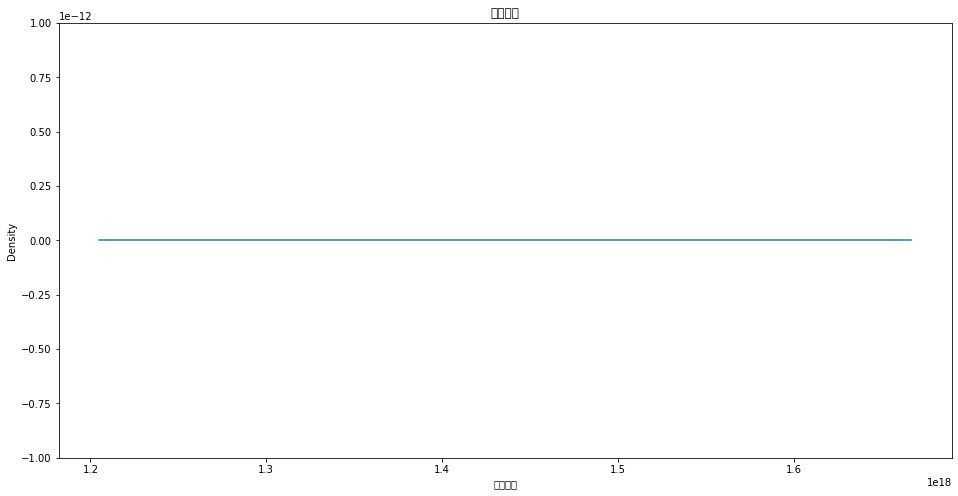

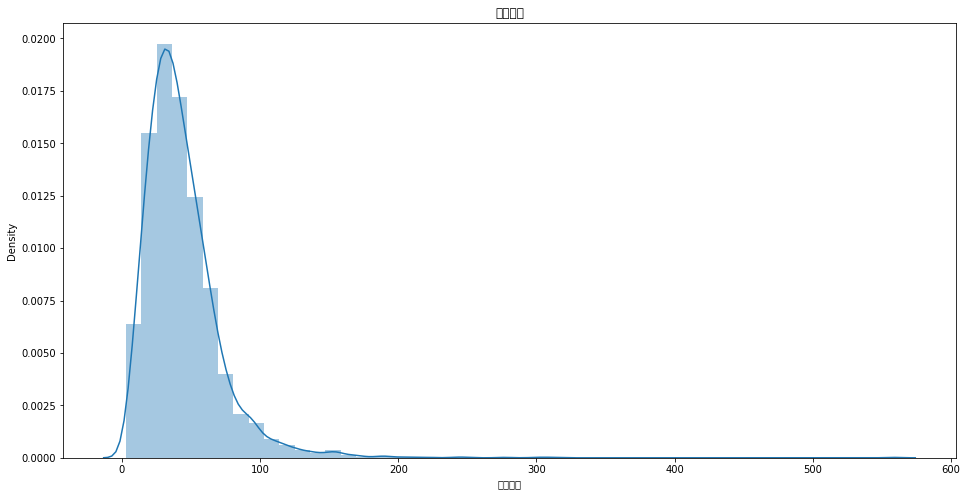

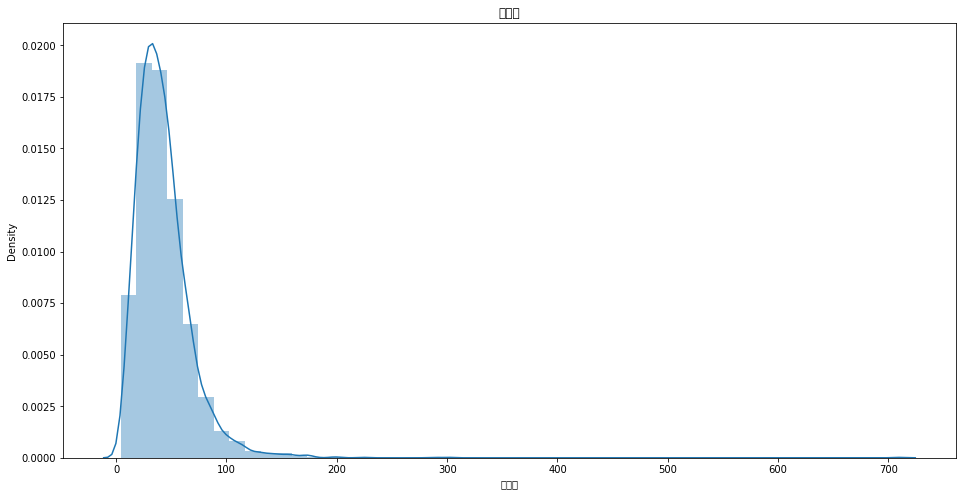

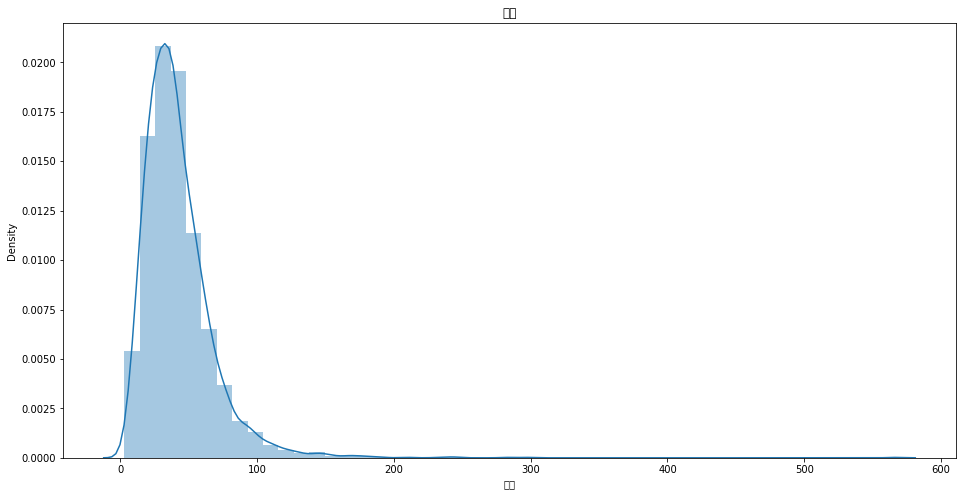

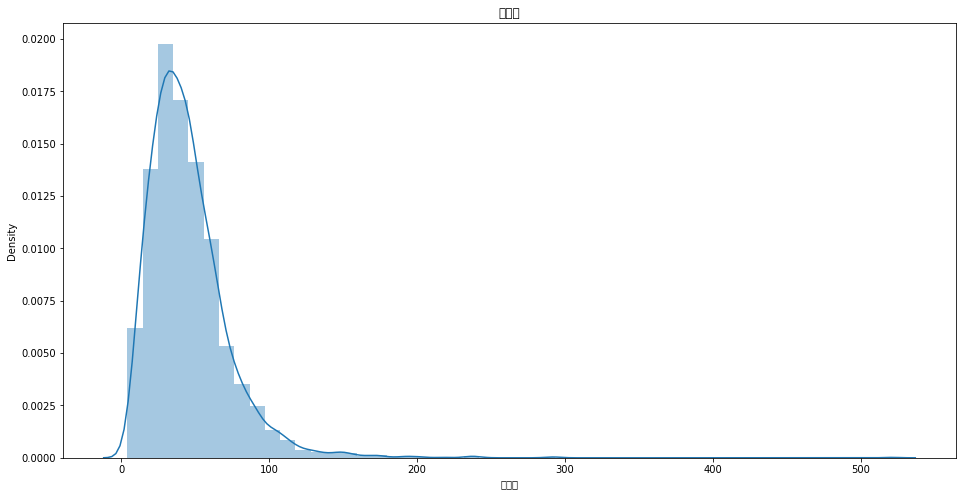

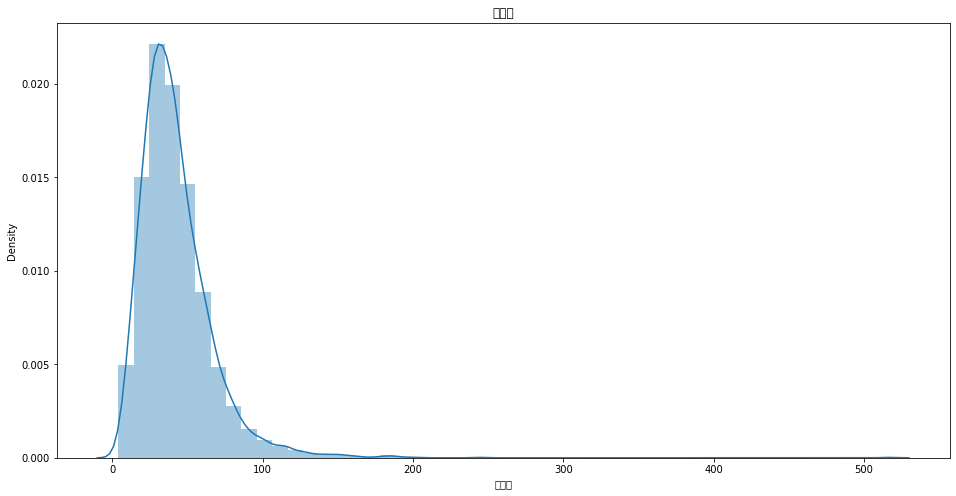

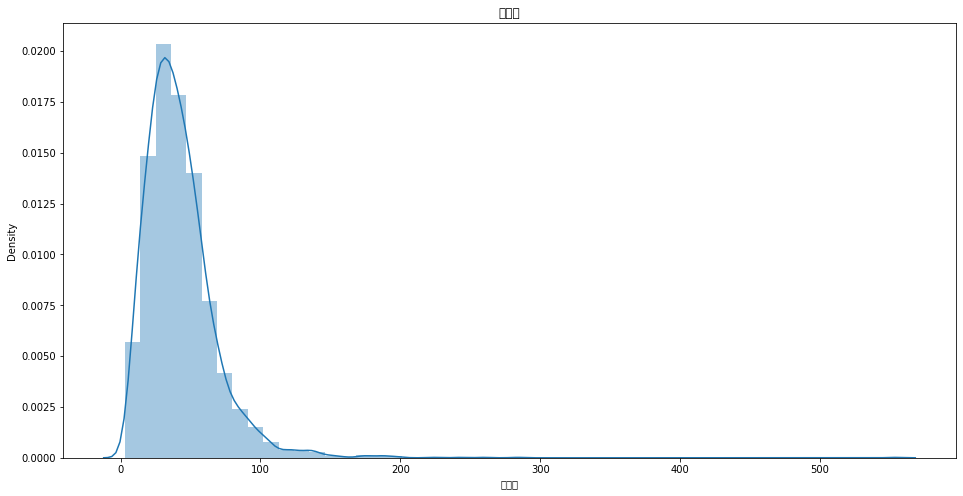

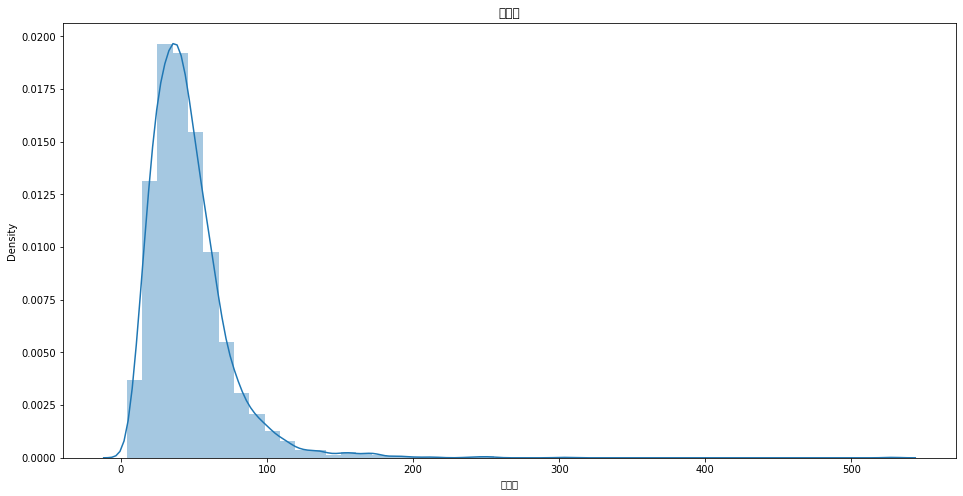

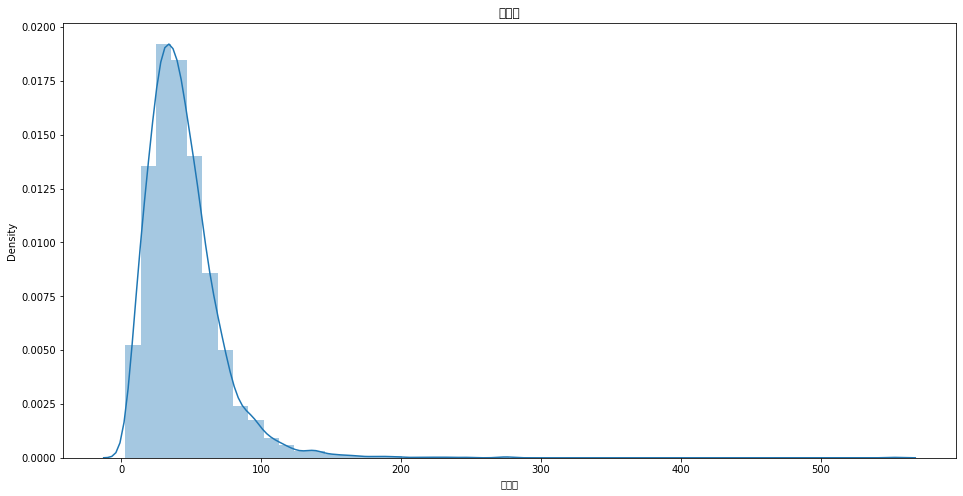

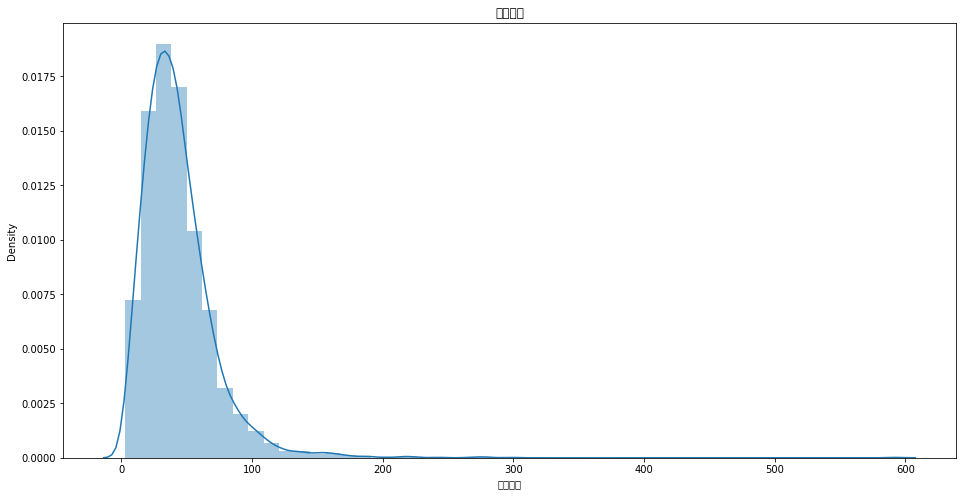

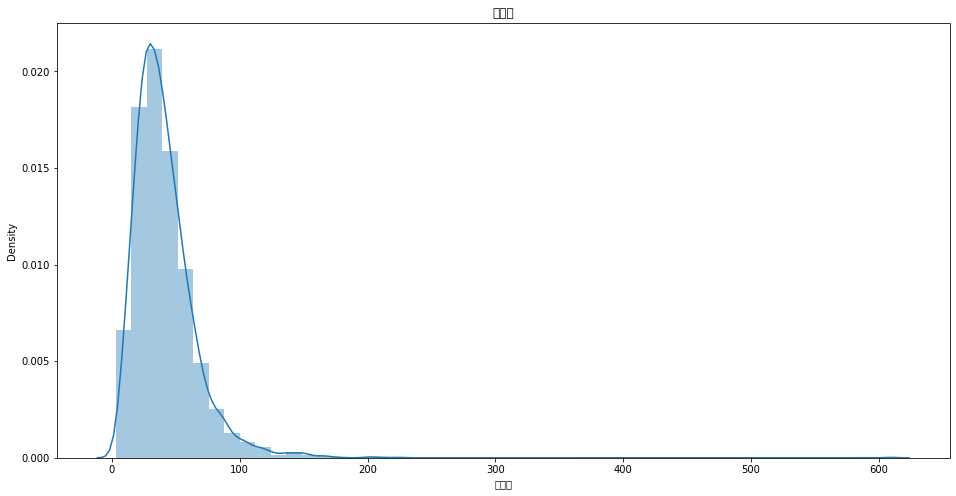

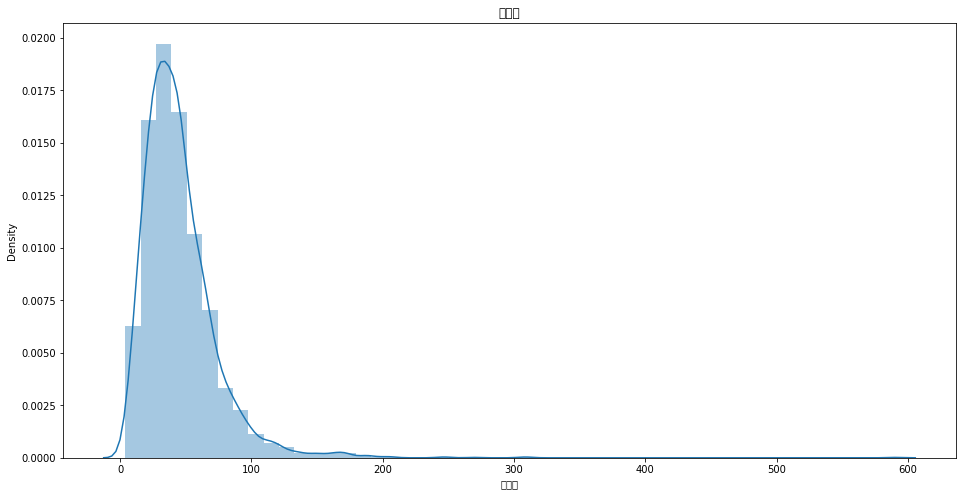

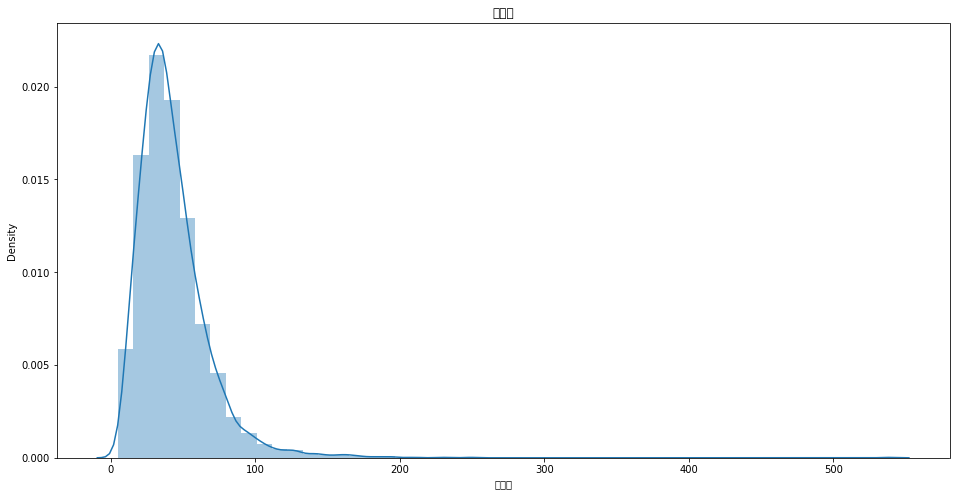

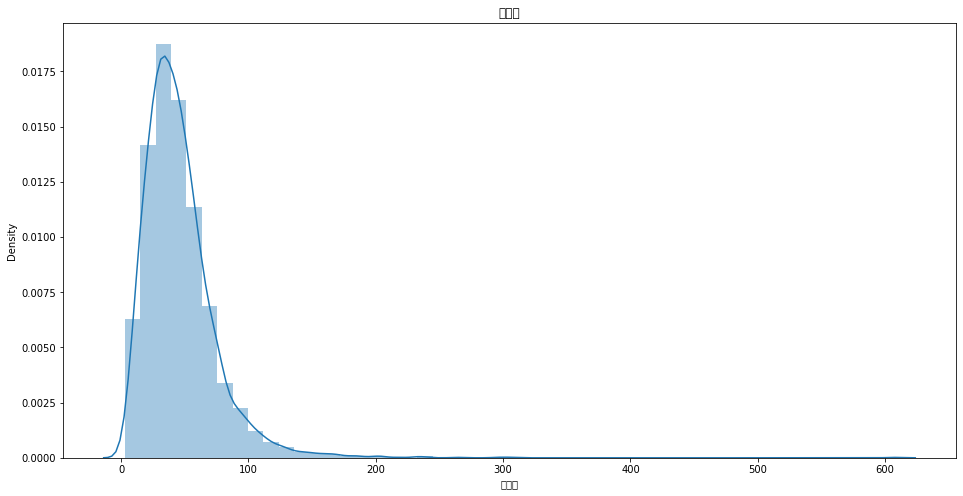

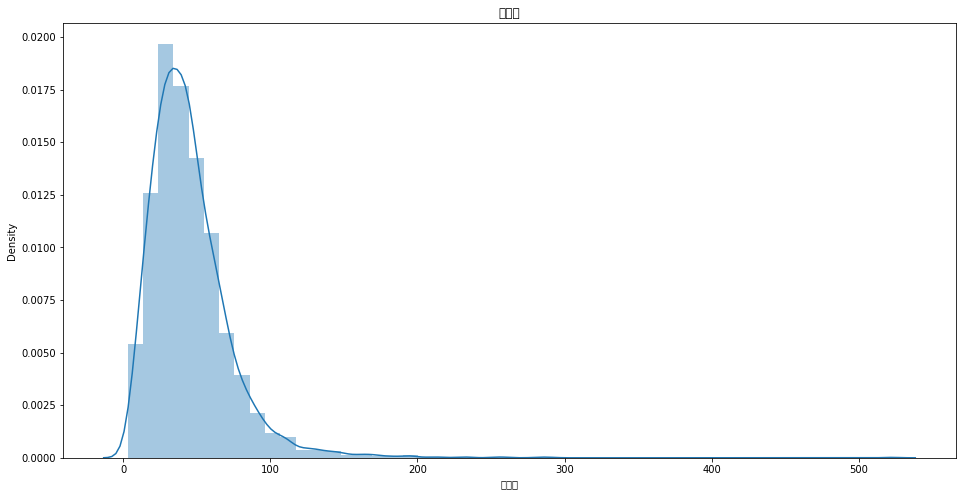

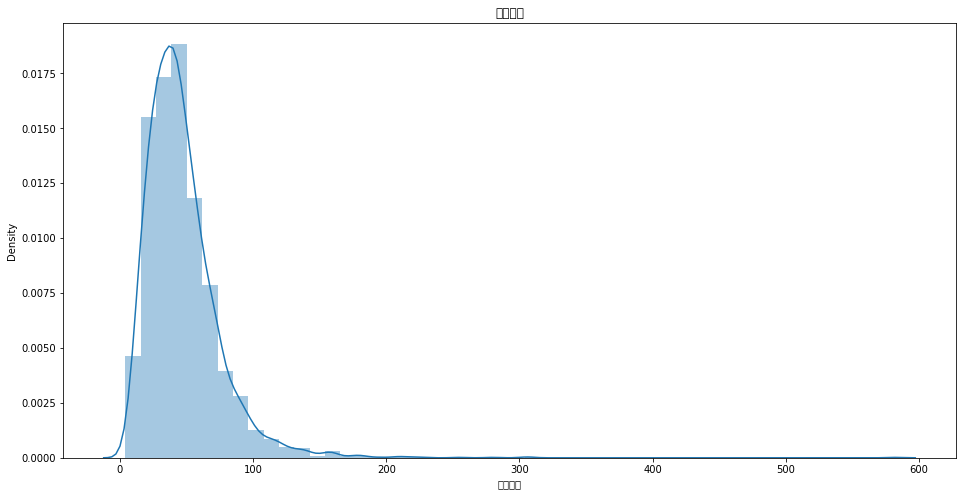

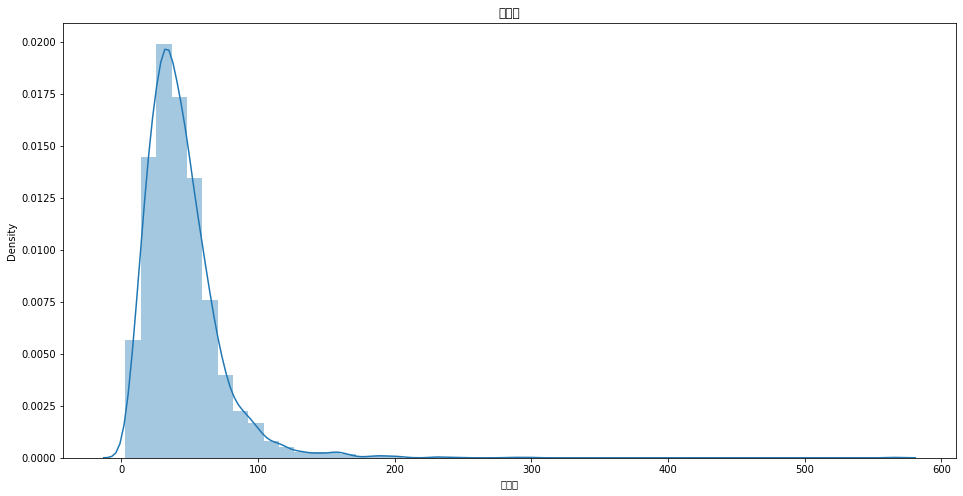

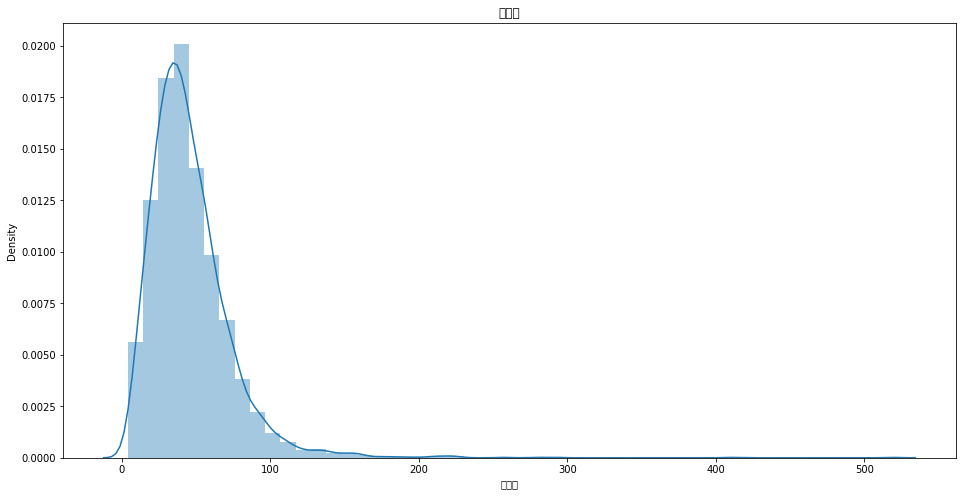

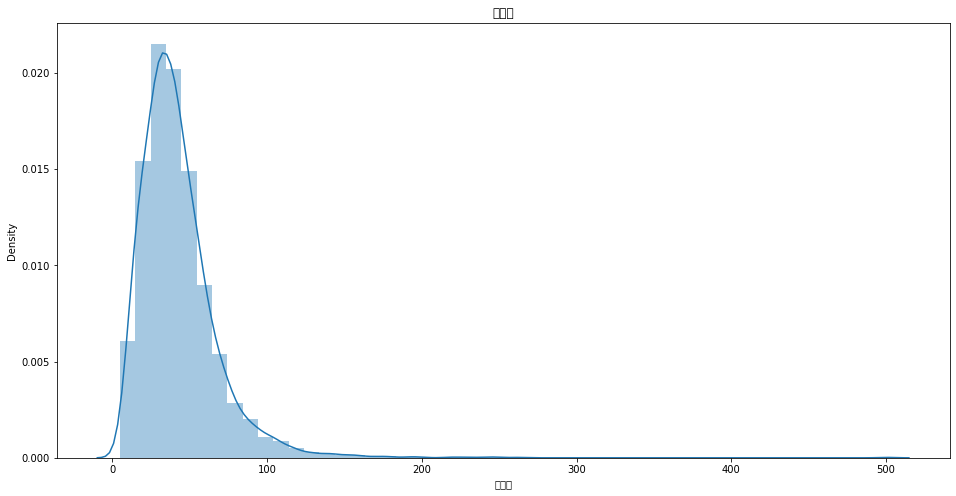

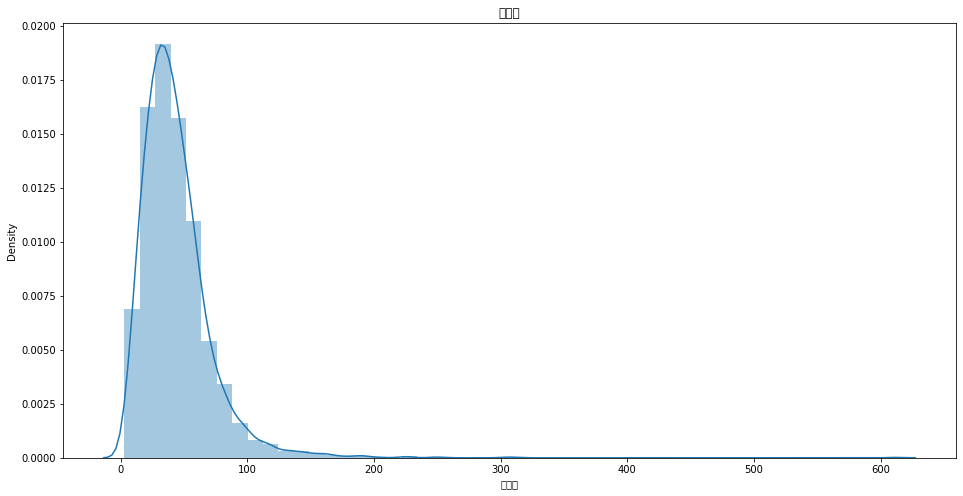

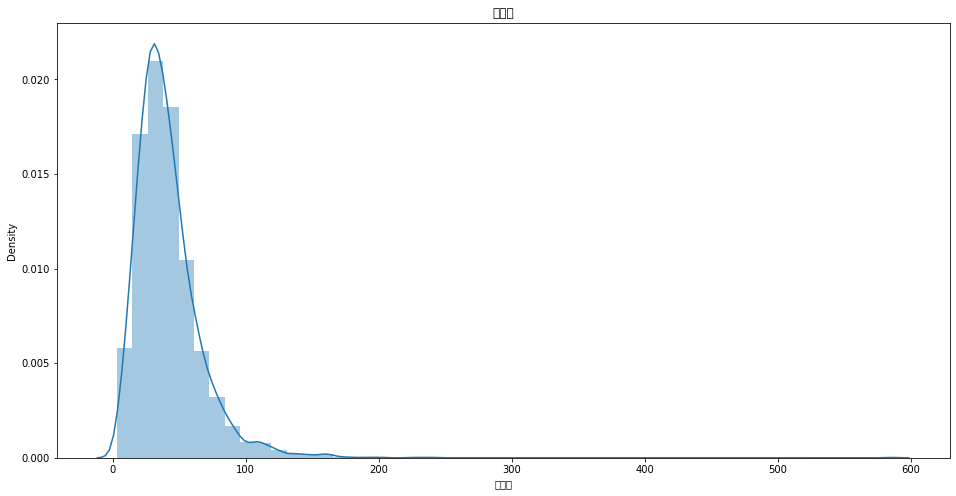

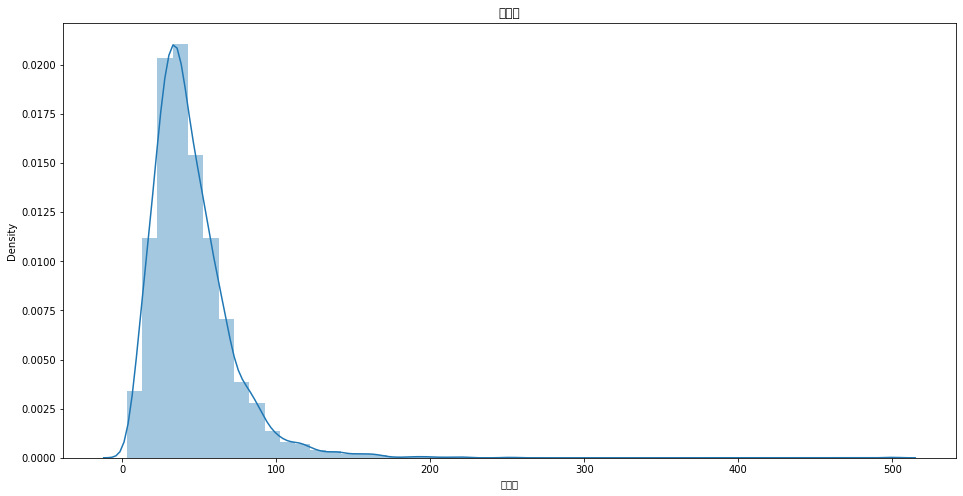

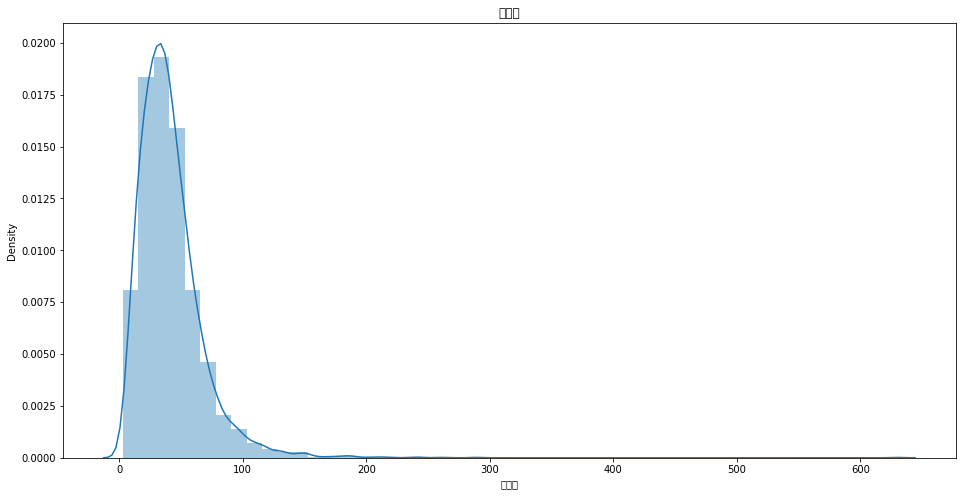

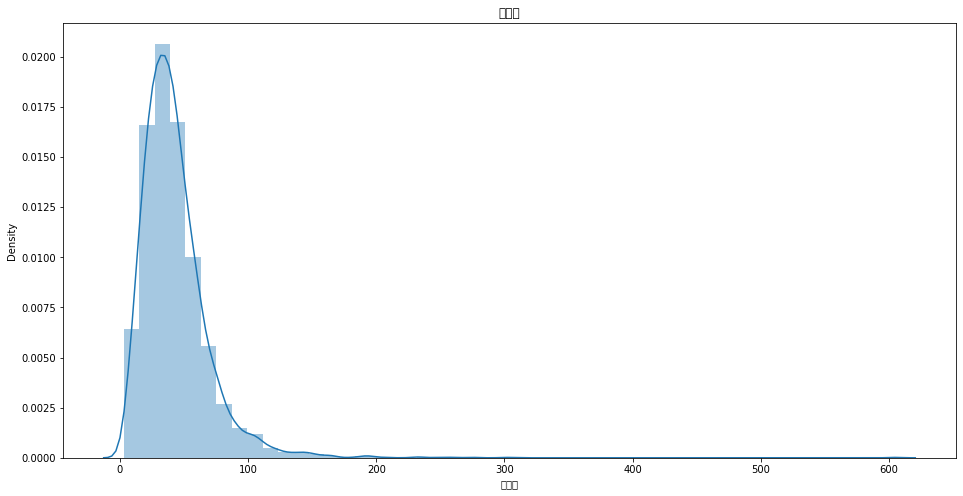

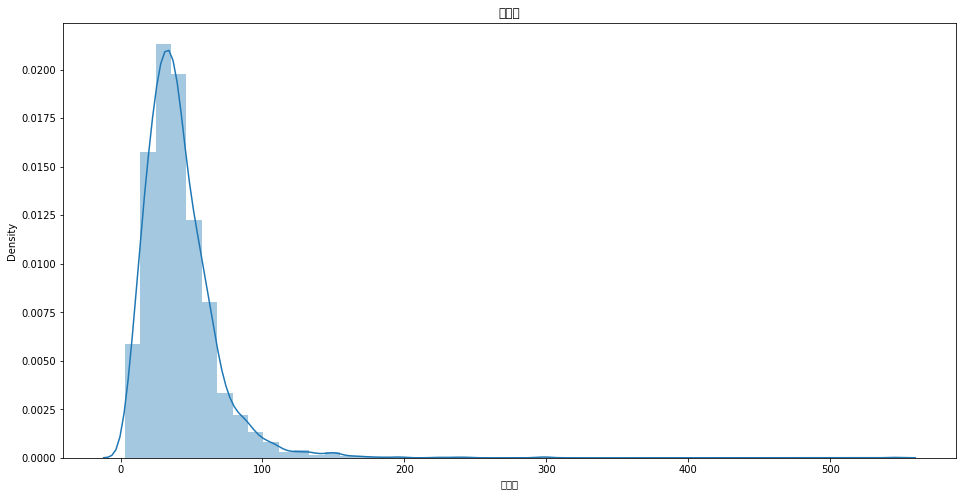

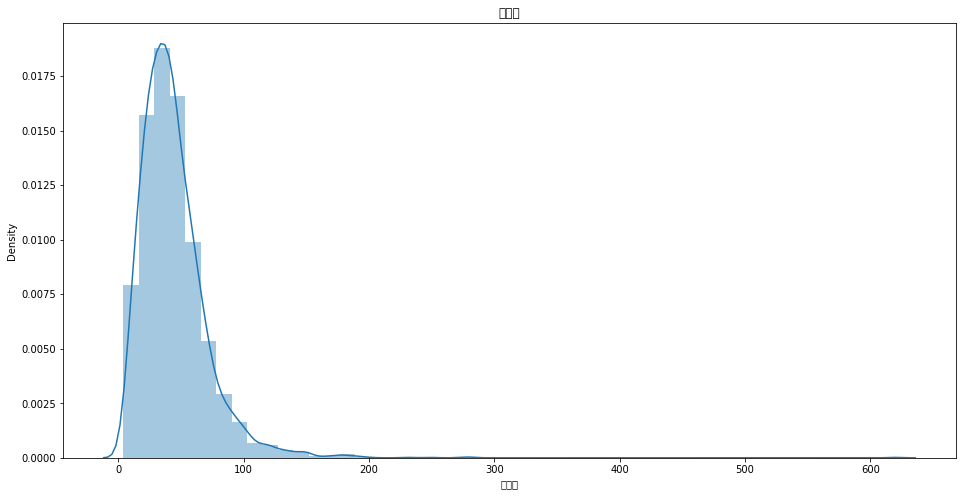

In [5]:
# 구별 target값의 분포를 확인해 보기
for i in df.columns:
  plt.figure(figsize = (16,8))
  sns.distplot(df[i])
  plt.title(f'{i}')
  plt.show()

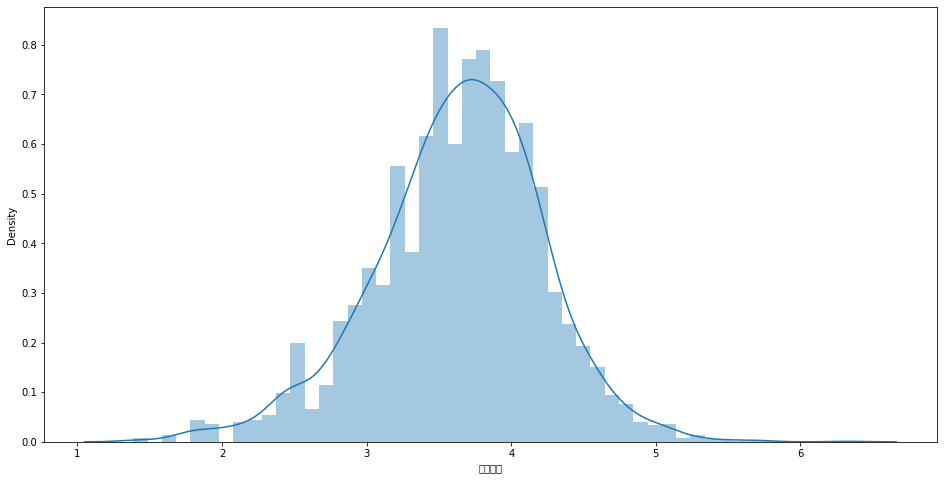

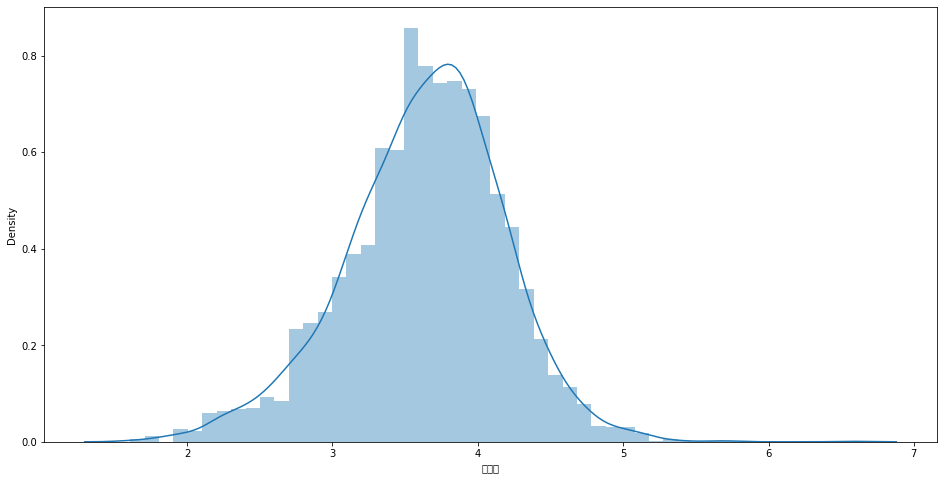

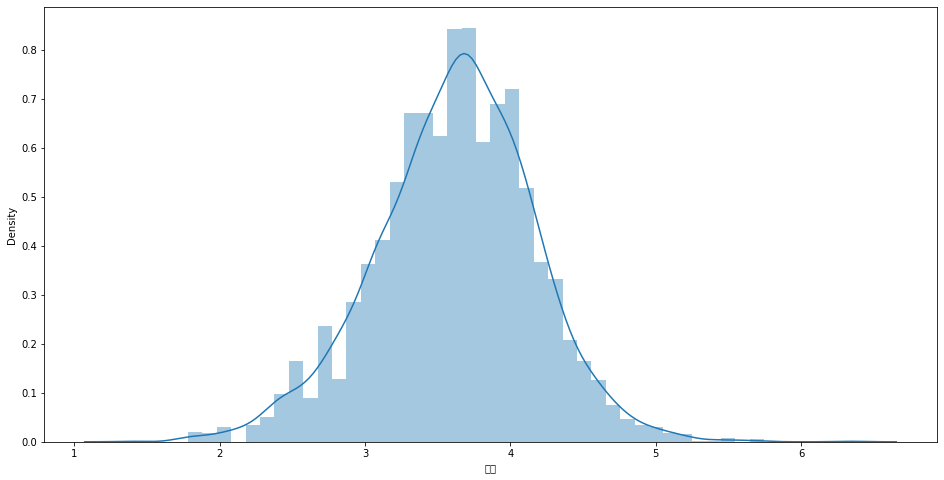

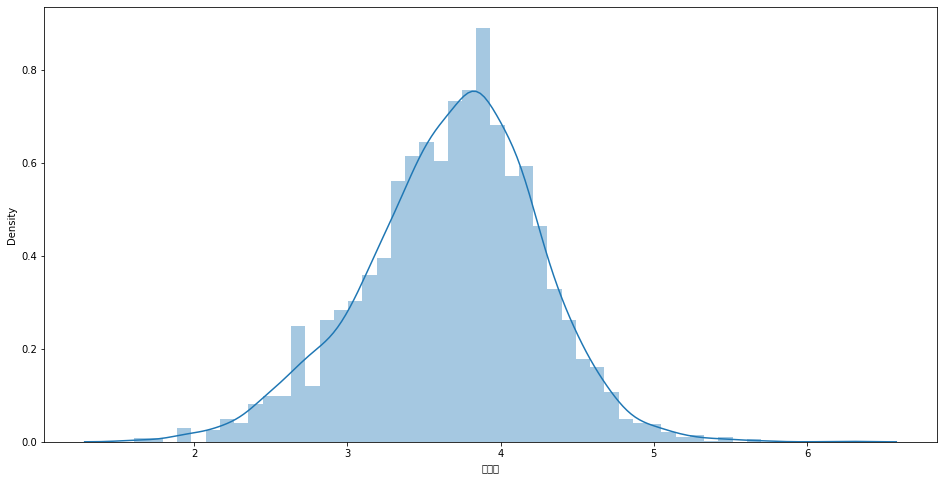

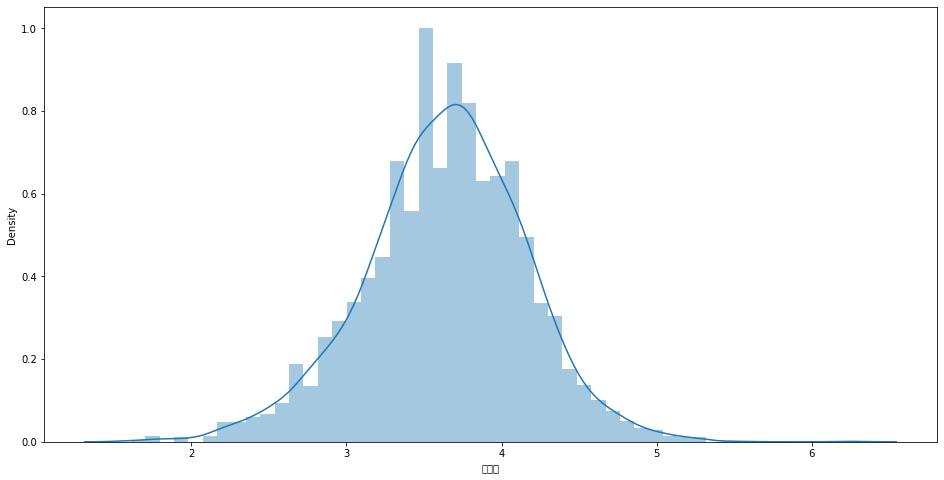

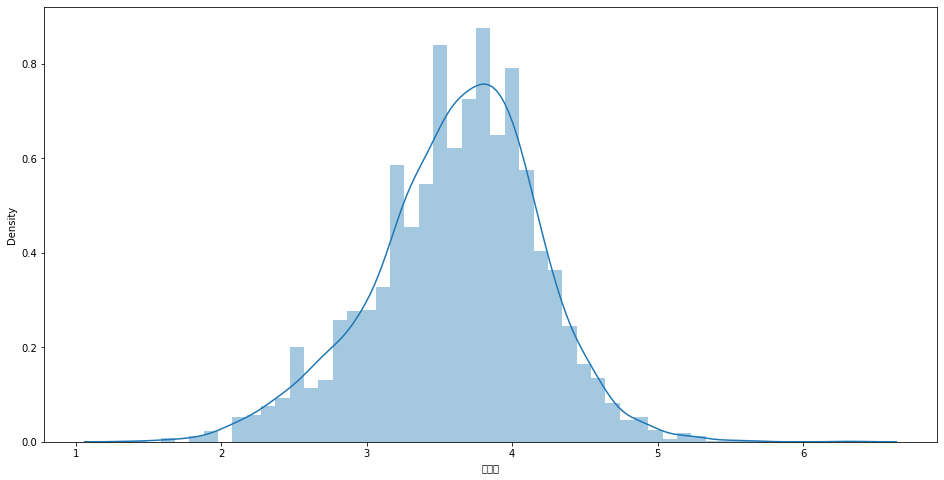

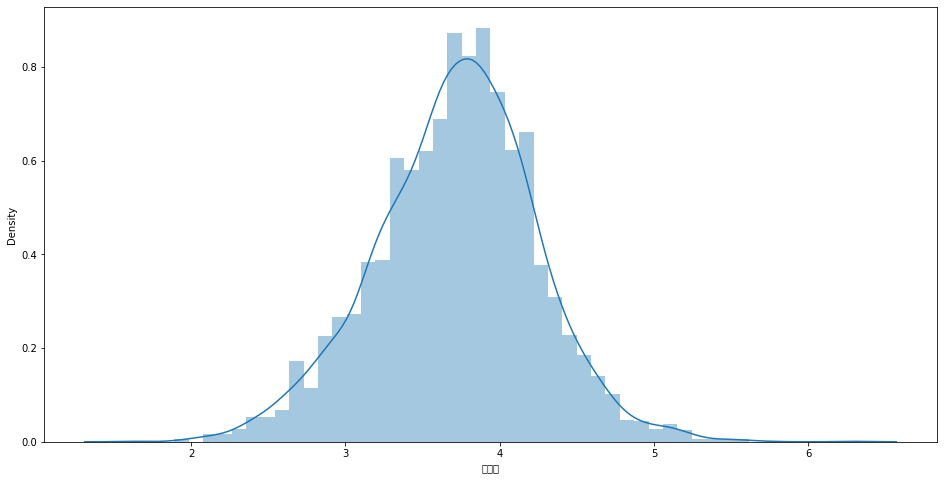

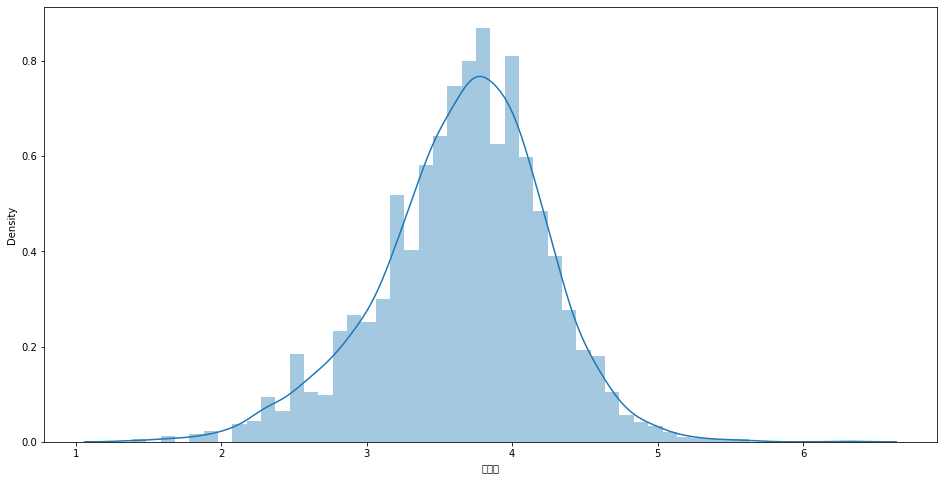

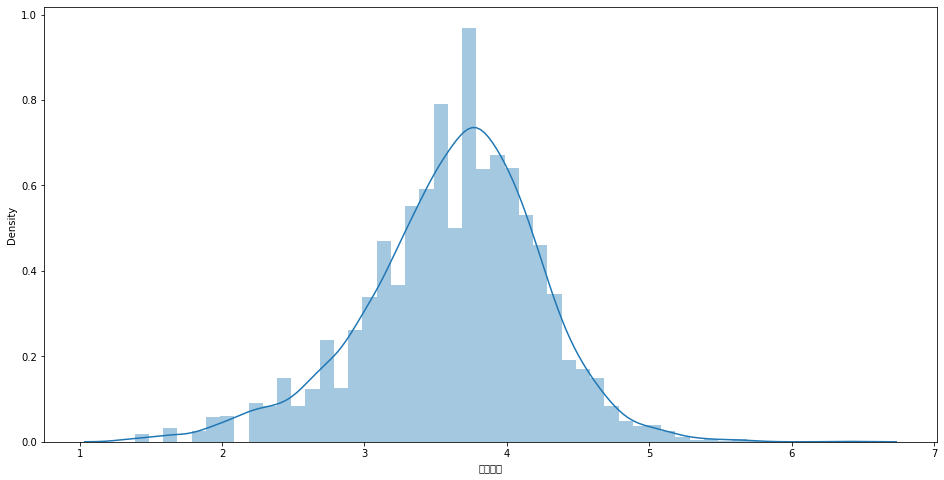

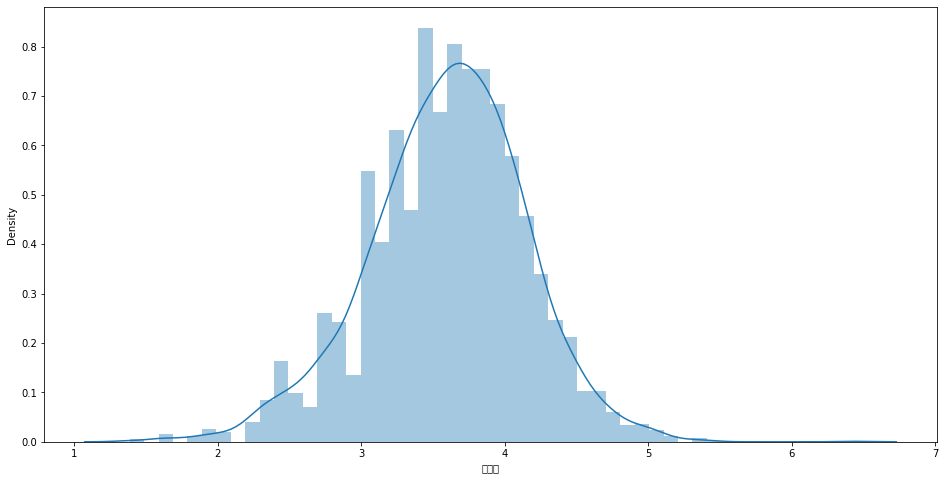

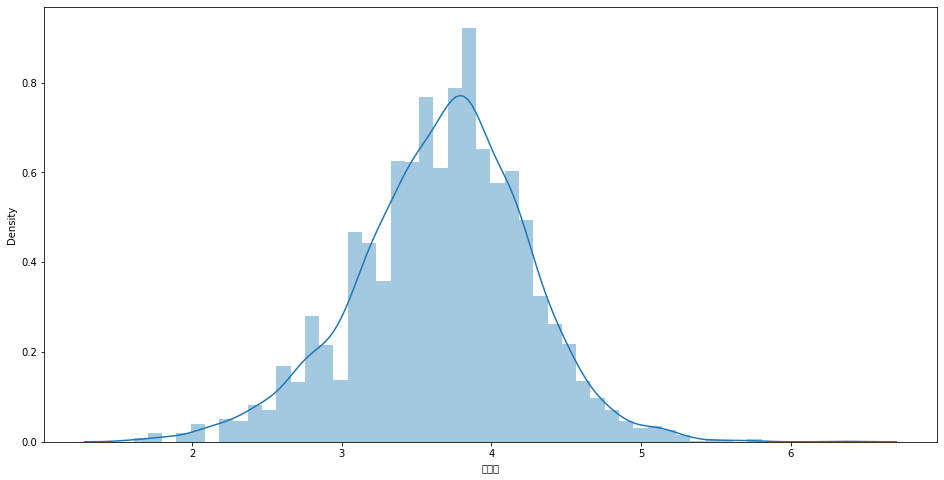

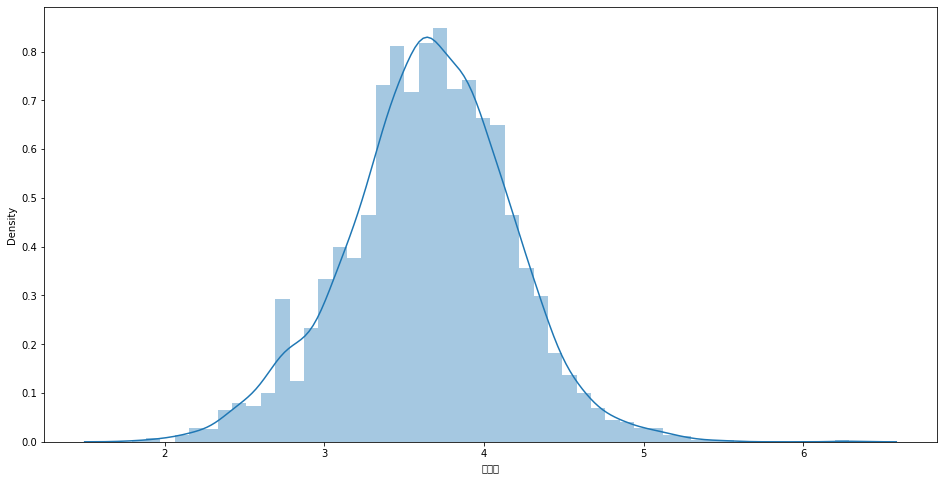

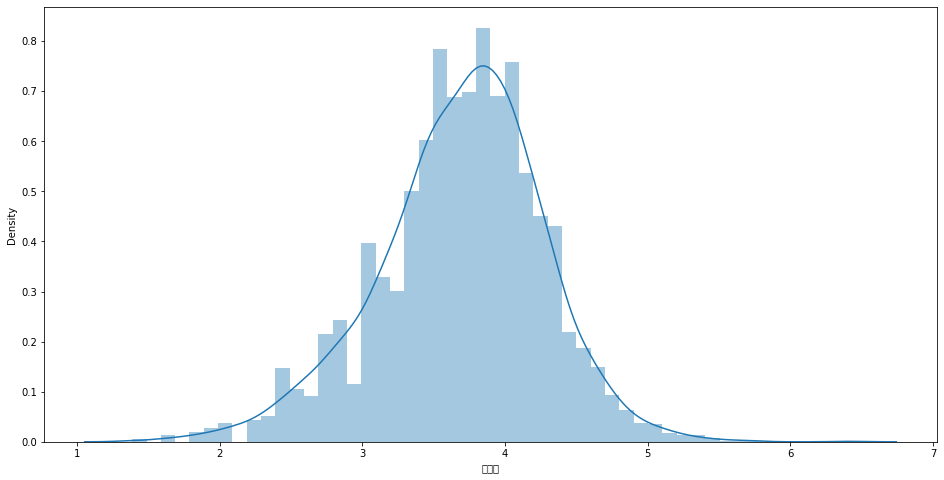

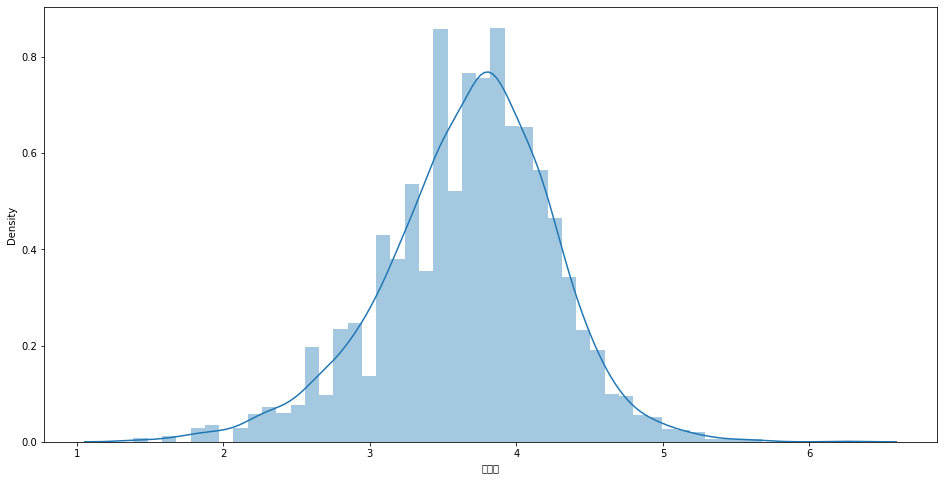

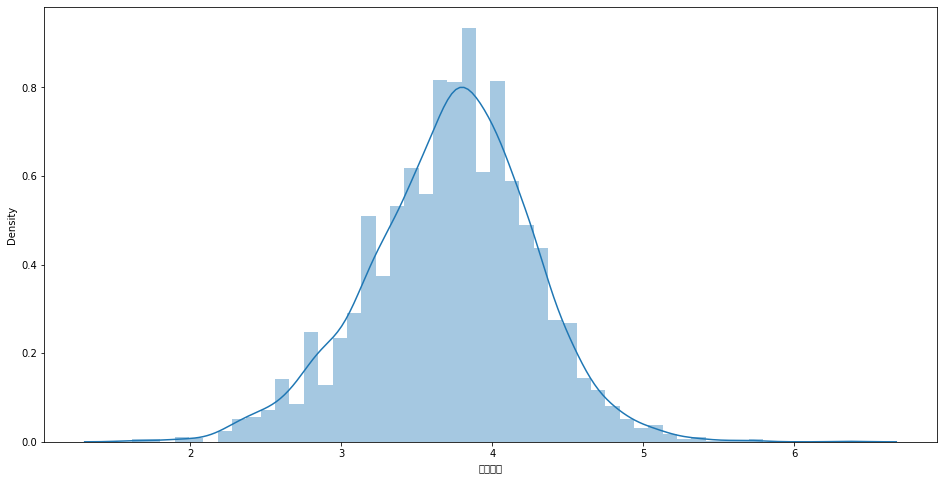

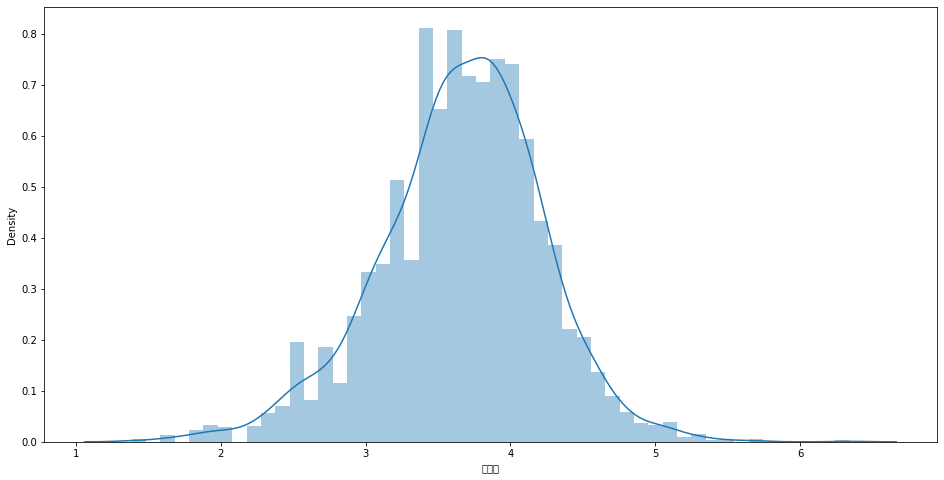

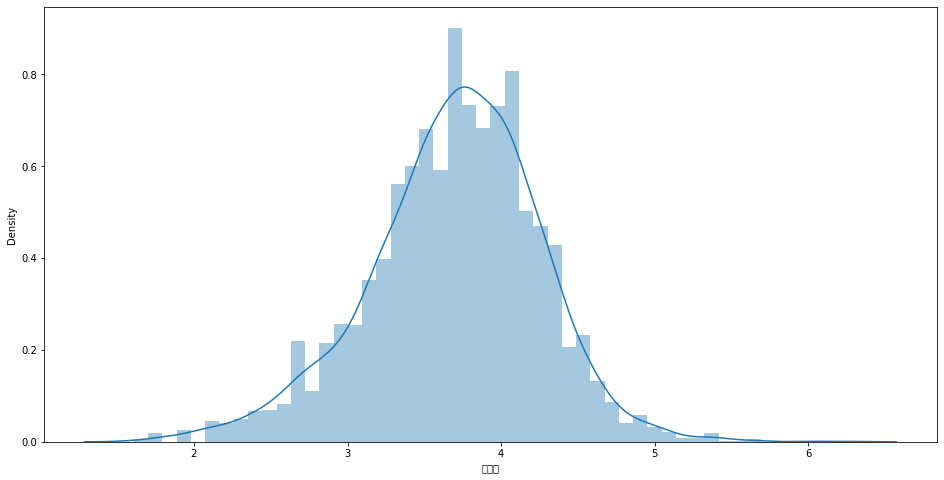

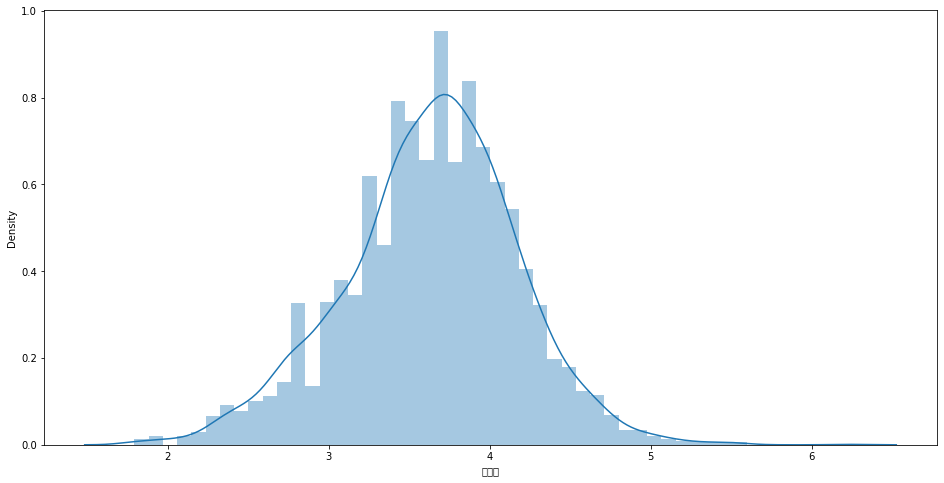

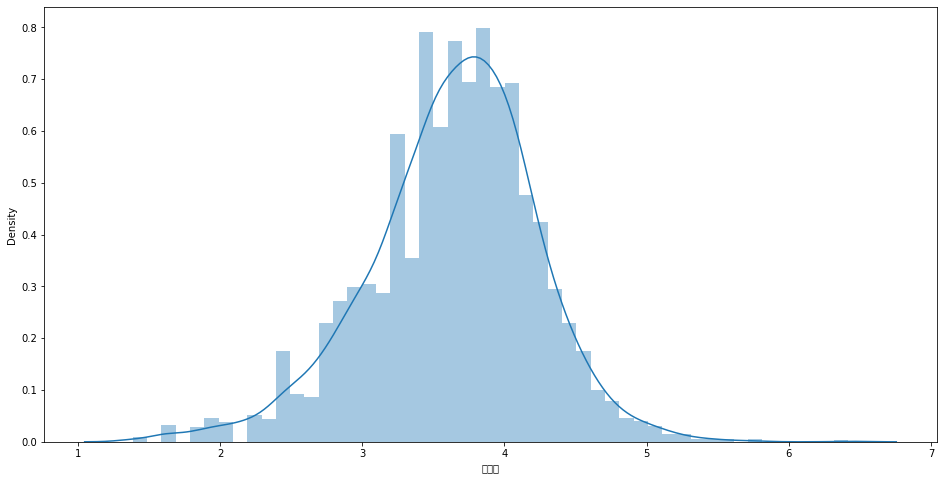

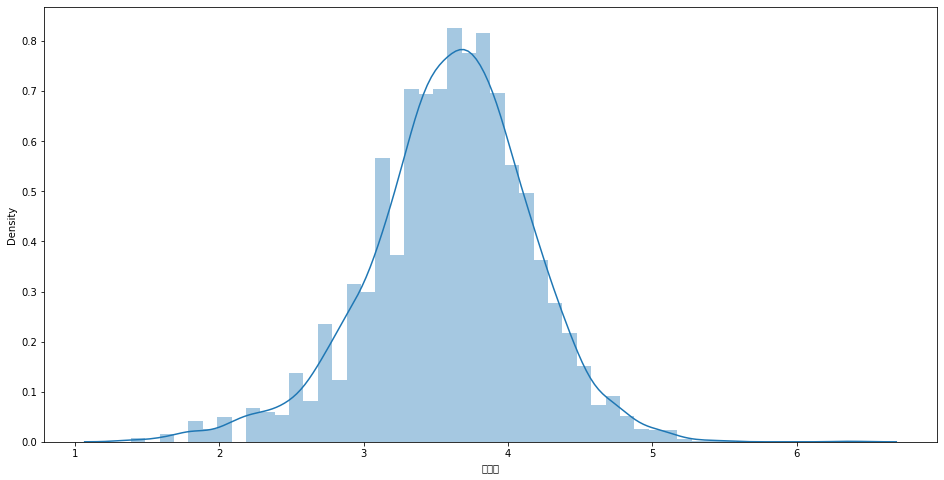

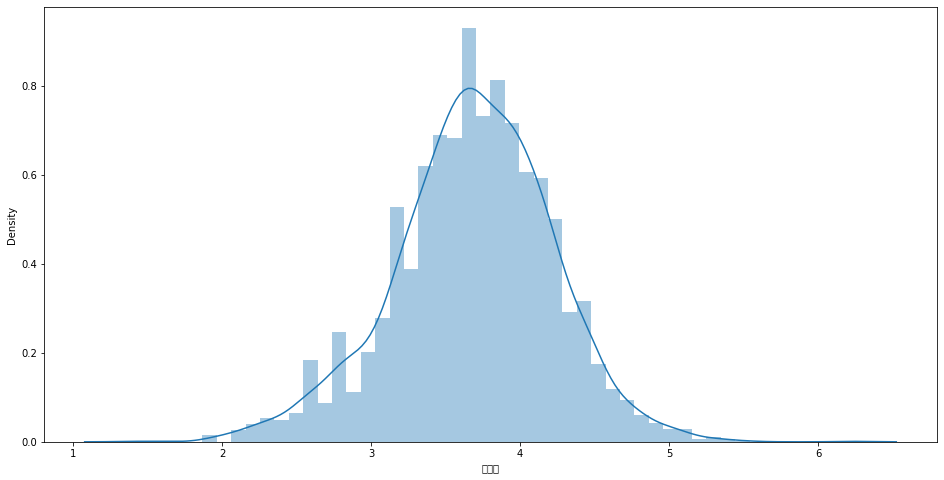

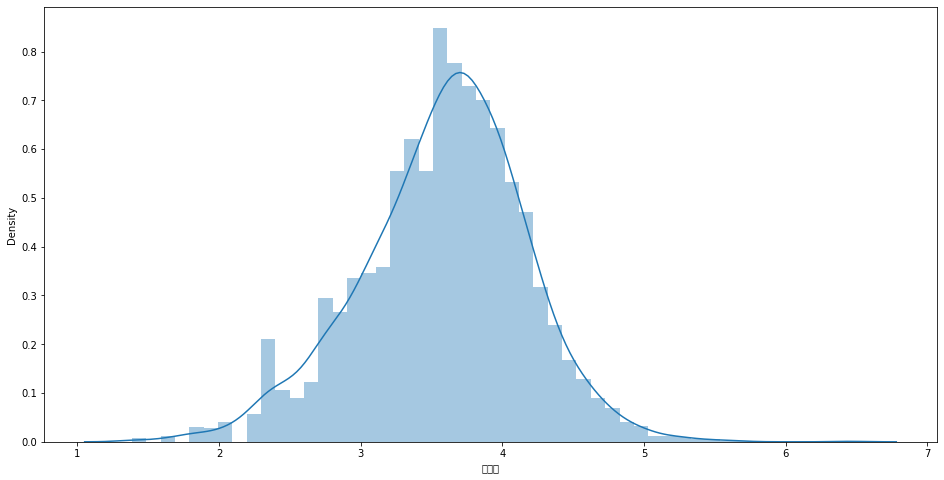

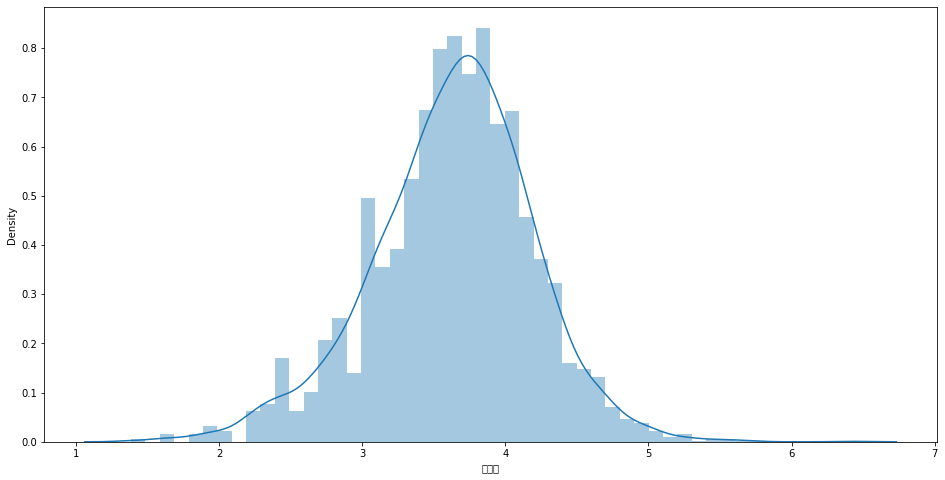

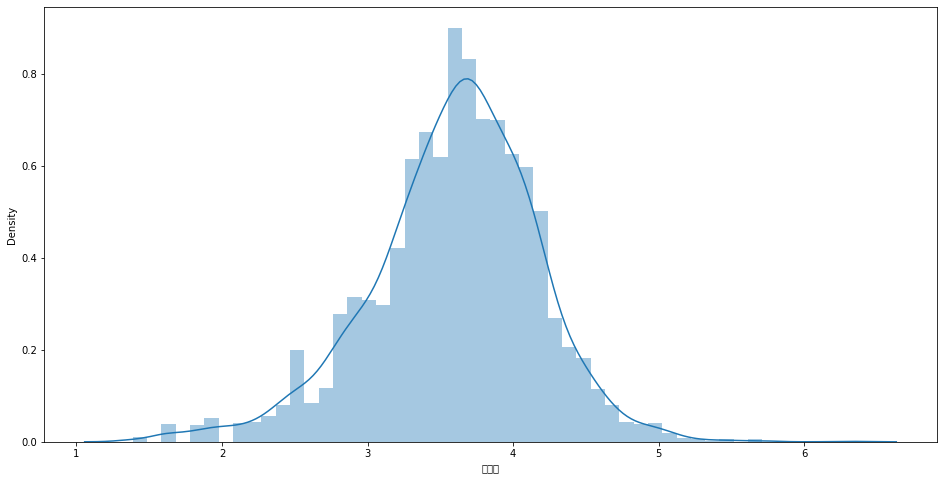

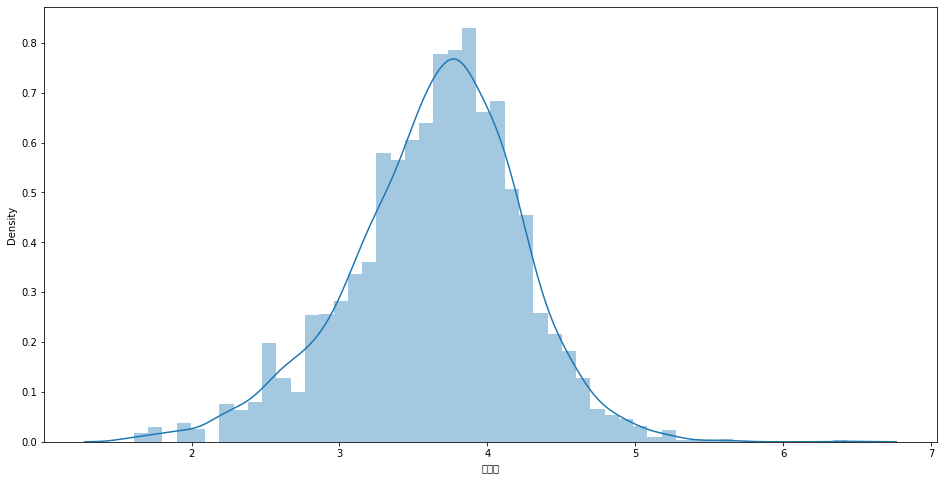

In [6]:
# 평균을 중앙으로 모아보자.
for i in df.columns[1:]:
  plt.figure(figsize = (16,8))
  sns.distplot(df[i].apply(lambda x: np.log1p(x)))
  plt.show()

In [7]:
# robust scaler 사용하기
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
transfomer = RobustScaler().fit(df.iloc[:,1:])
df_scaler = transfomer.transform(df.iloc[:,1:])

In [8]:
# minmax scaler 사용하기
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df.iloc[:,1:])
df_minmax_scaler = scaler.transform(df.iloc[:,1:])
df_minmax_scaler = pd.DataFrame(df_minmax_scaler, columns = df.columns[1:])
df_minmax_scaler.head()

,동대문구,종로구,중구,성동구,금천구,송파구,관악구,강동구,서대문구,노원구,마포구,동작구,서초구,구로구,영등포구,강남구,강서구,성북구,중랑구,강북구,양천구,도봉구,은평구,용산구,광진구
0,0.057658,0.045390,0.053286,0.052224,0.056641,0.052727,0.061069,0.047359,0.049320,0.044554,0.051282,0.050657,0.048013,0.057803,0.046794,0.058719,0.058366,0.056566,0.049342,0.051635,0.066398,0.044728,0.043189,0.057196,0.045455
1,0.084685,0.069504,0.079929,0.090909,0.101562,0.078182,0.104962,0.076503,0.085034,0.072607,0.085470,0.097561,0.086093,0.102119,0.084922,0.094306,0.095331,0.074747,0.075658,0.075731,0.118712,0.065495,0.073090,0.088561,0.066558
2,0.084685,0.056738,0.079929,0.081238,0.080078,0.078182,0.087786,0.071038,0.071429,0.069307,0.080342,0.073171,0.076159,0.086705,0.076256,0.083630,0.087549,0.082828,0.080592,0.070568,0.094567,0.073482,0.073090,0.084871,0.068182
3,0.063063,0.055319,0.060391,0.065764,0.066406,0.056364,0.066794,0.052823,0.057823,0.056106,0.064957,0.063790,0.056291,0.067437,0.057192,0.062278,0.064202,0.058586,0.060855,0.058520,0.080483,0.047923,0.053156,0.064576,0.048701
4,0.082883,0.062411,0.081705,0.088975,0.080078,0.080000,0.091603,0.063752,0.090136,0.062706,0.085470,0.080675,0.079470,0.098266,0.083189,0.083630,0.097276,0.078788,0.077303,0.063683,0.100604,0.068690,0.074751,0.088561,0.071429


In [9]:
df_scaler = pd.DataFrame(df_scaler, columns = df.columns[1:])

In [10]:
df_scaler

,동대문구,종로구,중구,성동구,금천구,송파구,관악구,강동구,서대문구,노원구,마포구,동작구,서초구,구로구,영등포구,강남구,강서구,성북구,중랑구,강북구,양천구,도봉구,은평구,용산구,광진구
0,-0.103448,-0.074074,-0.148148,-0.300000,-0.192308,-0.214286,-0.178571,-0.392857,-0.233333,-0.259259,-0.206897,-0.230769,-0.310345,-0.233333,-0.379310,-0.107143,-0.241379,-0.192308,-0.206897,-0.16,-0.107143,-0.214286,-0.333333,-0.111111,-0.241379
1,0.413793,0.555556,0.407407,0.366667,0.692308,0.285714,0.642857,0.178571,0.466667,0.370370,0.482759,0.730769,0.482759,0.533333,0.379310,0.607143,0.413793,0.153846,0.344828,0.40,0.821429,0.250000,0.333333,0.518519,0.206897
2,0.413793,0.222222,0.407407,0.200000,0.269231,0.285714,0.321429,0.071429,0.200000,0.296296,0.379310,0.230769,0.275862,0.266667,0.206897,0.392857,0.275862,0.307692,0.448276,0.28,0.392857,0.428571,0.333333,0.444444,0.241379
3,0.000000,0.185185,0.000000,-0.066667,0.000000,-0.142857,-0.071429,-0.285714,-0.066667,0.000000,0.068966,0.038462,-0.137931,-0.066667,-0.172414,-0.035714,-0.137931,-0.153846,0.034483,0.00,0.142857,-0.142857,-0.111111,0.037037,-0.172414
4,0.379310,0.370370,0.444444,0.333333,0.269231,0.321429,0.392857,-0.071429,0.566667,0.148148,0.482759,0.384615,0.344828,0.466667,0.344828,0.392857,0.448276,0.230769,0.379310,0.12,0.500000,0.321429,0.370370,0.518519,0.310345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,0.724138,1.185185,1.407407,0.633333,0.961538,0.857143,0.464286,1.178571,0.566667,1.037037,0.517241,1.000000,0.965517,0.833333,0.620690,0.642857,0.793103,0.961538,0.827586,1.40,1.000000,0.857143,0.888889,1.074074,0.758621
4014,0.724138,1.037037,1.333333,0.566667,0.807692,0.607143,0.321429,1.178571,0.533333,0.962963,0.241379,0.961538,0.931034,0.700000,0.413793,0.571429,0.758621,1.115385,0.931034,1.04,0.928571,0.785714,0.703704,0.555556,0.689655
4015,0.758621,1.148148,1.518519,0.666667,1.230769,0.821429,0.678571,1.000000,0.600000,1.222222,0.724138,1.153846,1.206897,1.100000,0.896552,0.750000,1.344828,1.038462,0.862069,1.24,1.357143,0.892857,1.000000,1.370370,0.724138
4016,-0.275862,0.037037,0.037037,-0.333333,-0.153846,-0.250000,-0.535714,-0.071429,-0.333333,0.037037,-0.413793,-0.076923,-0.103448,-0.233333,-0.517241,-0.357143,-0.344828,-0.153846,-0.241379,0.24,-0.214286,-0.250000,-0.037037,0.259259,-0.241379


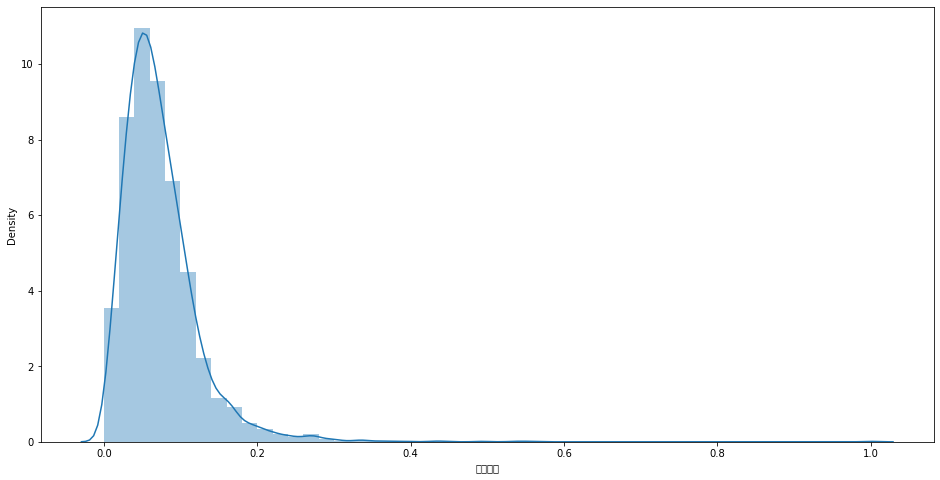

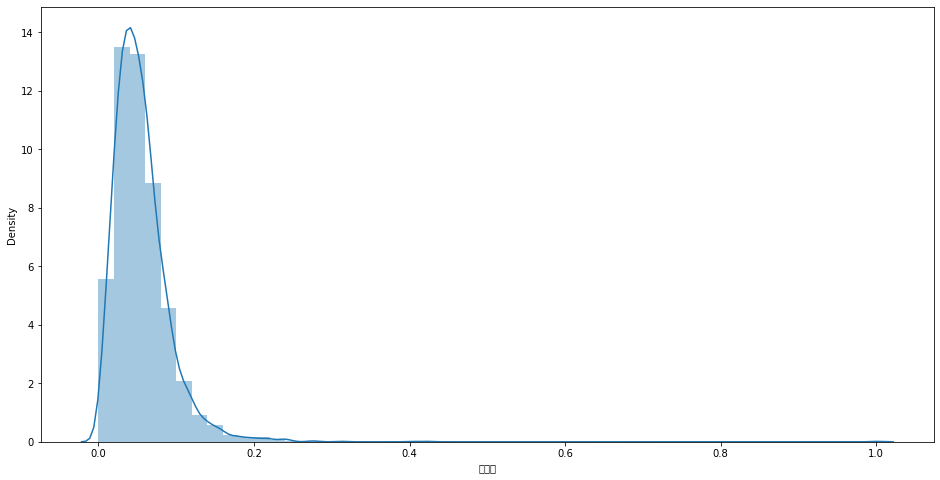

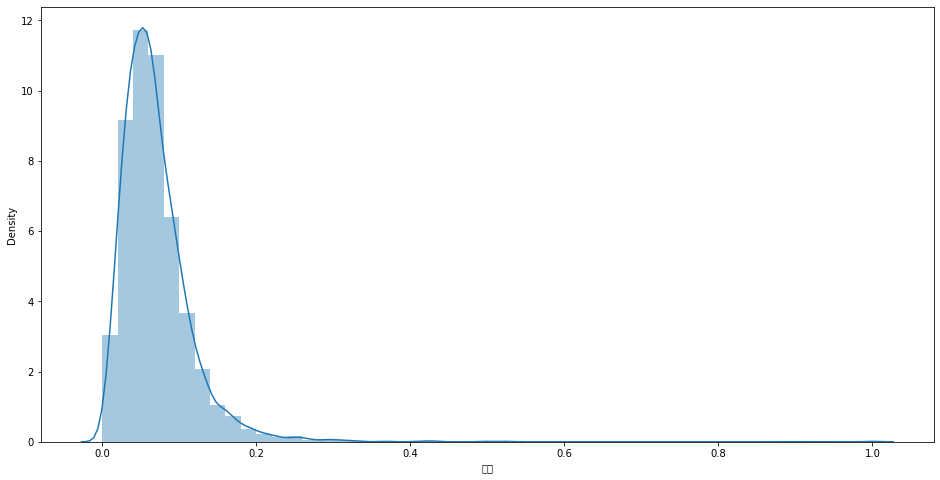

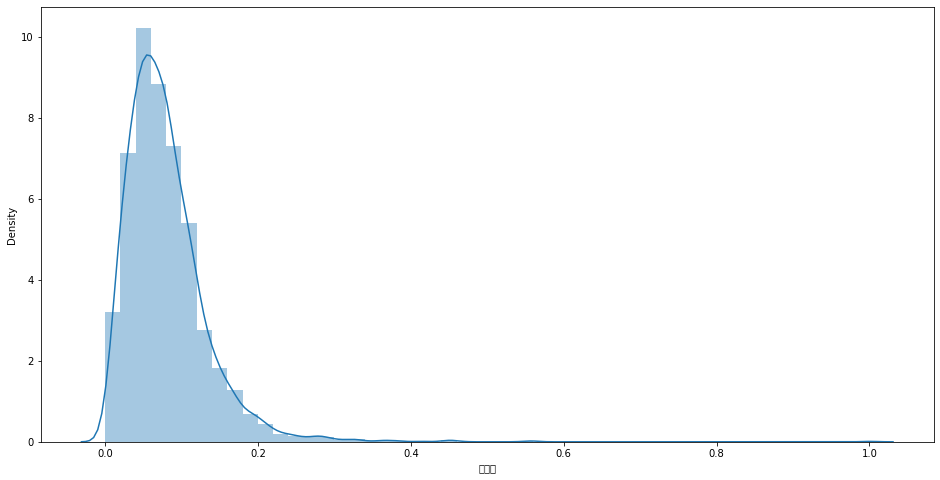

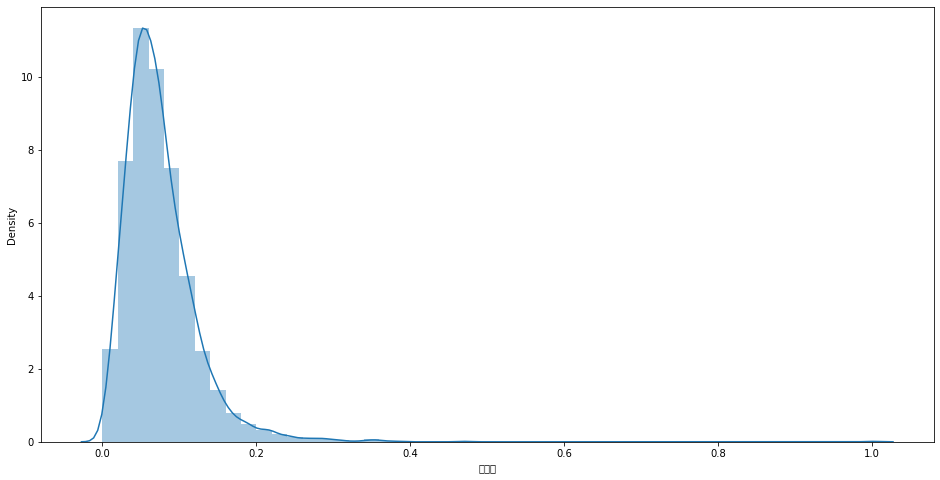

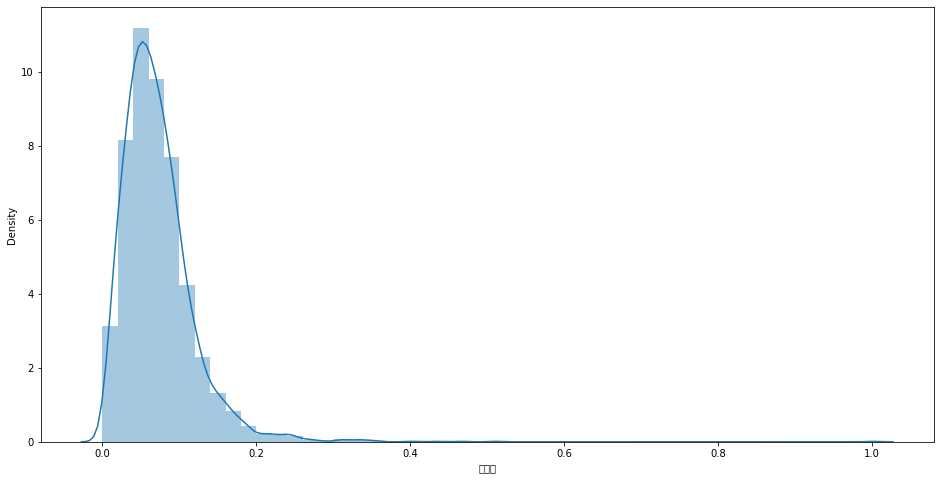

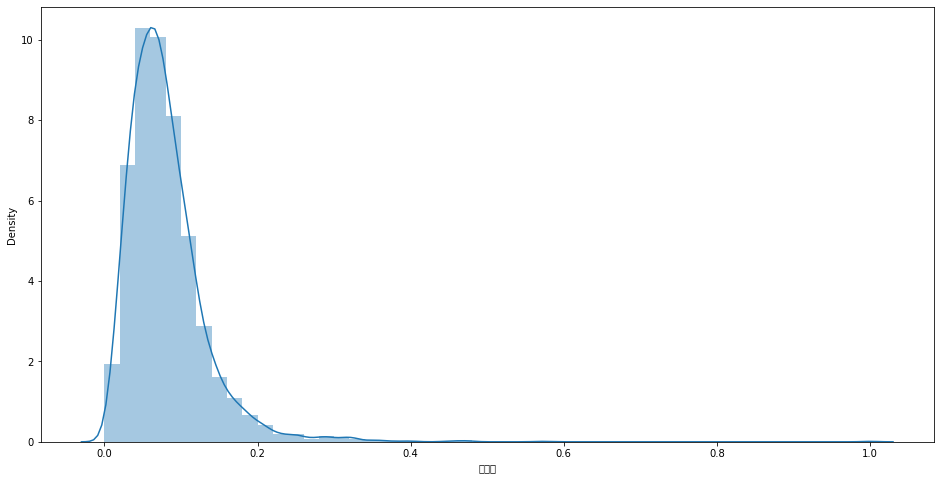

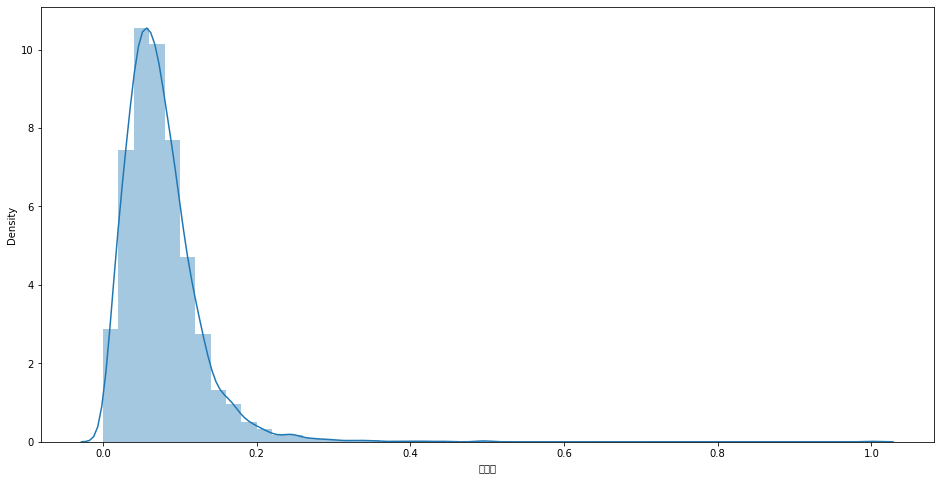

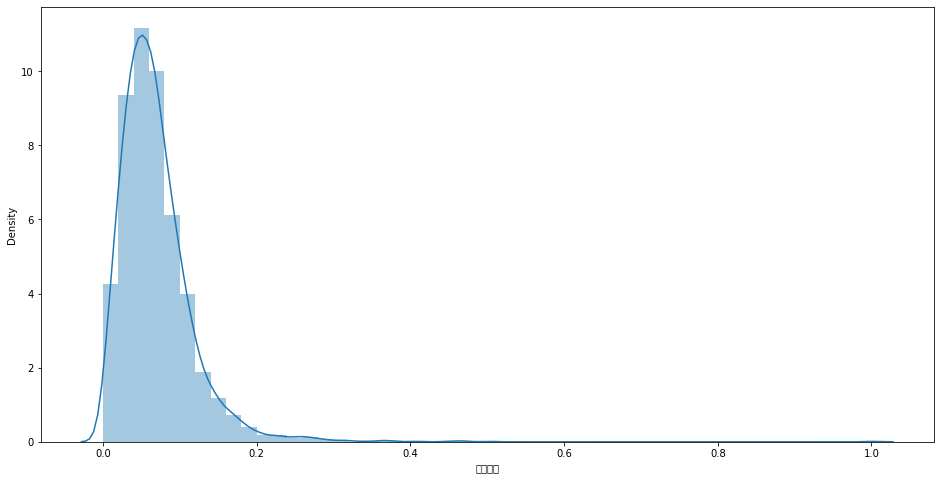

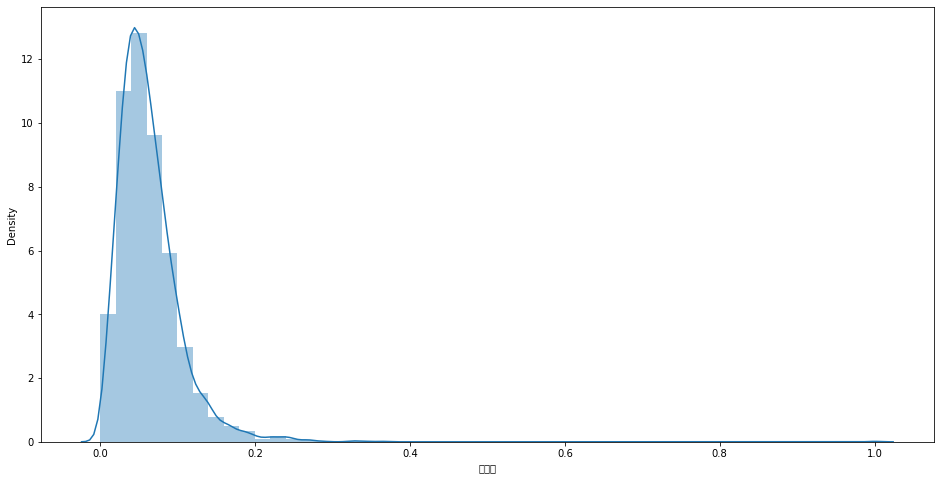

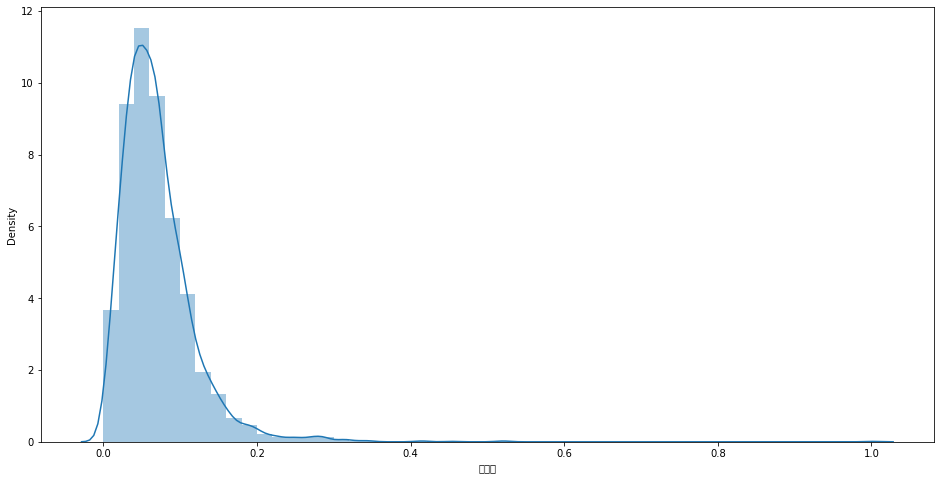

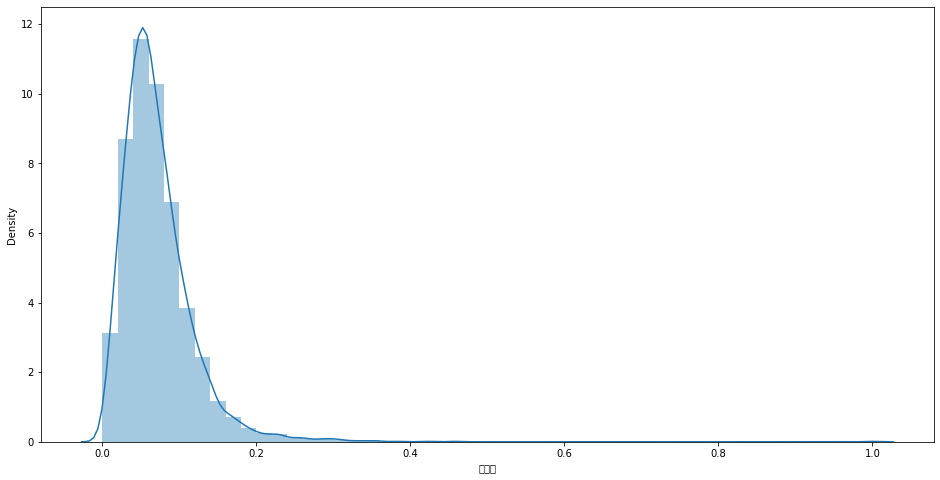

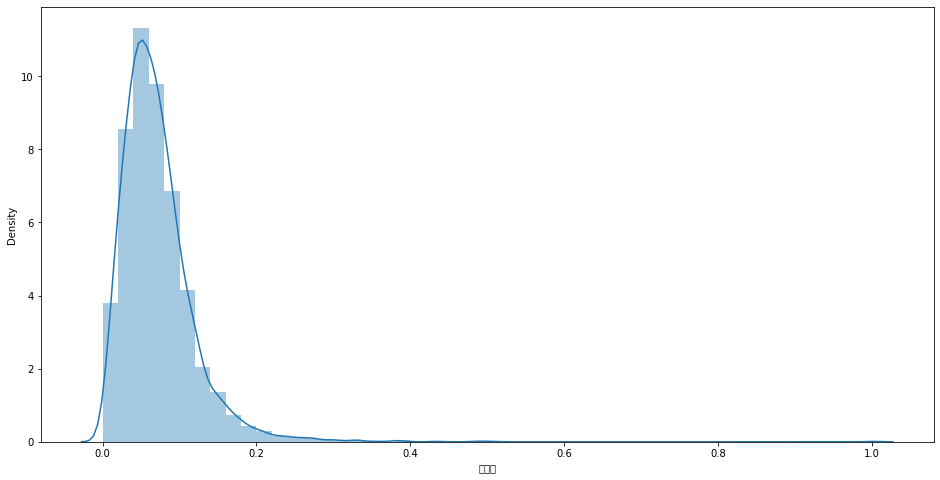

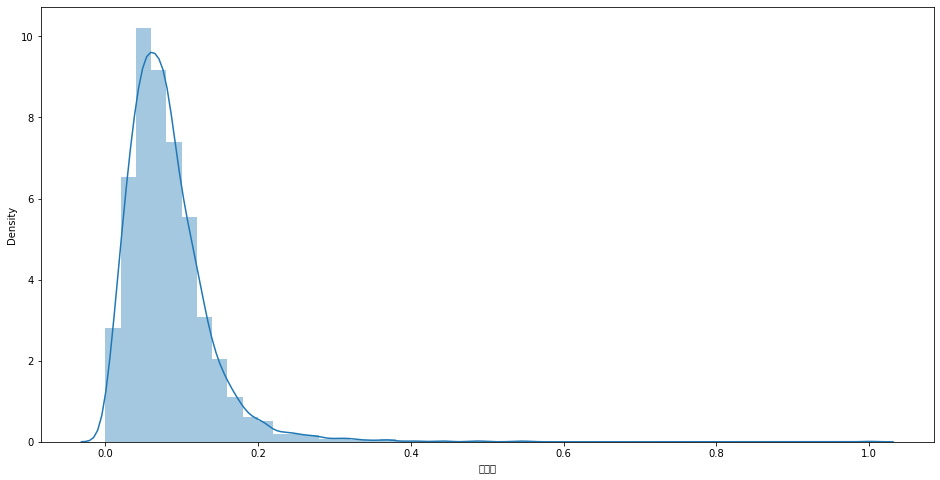

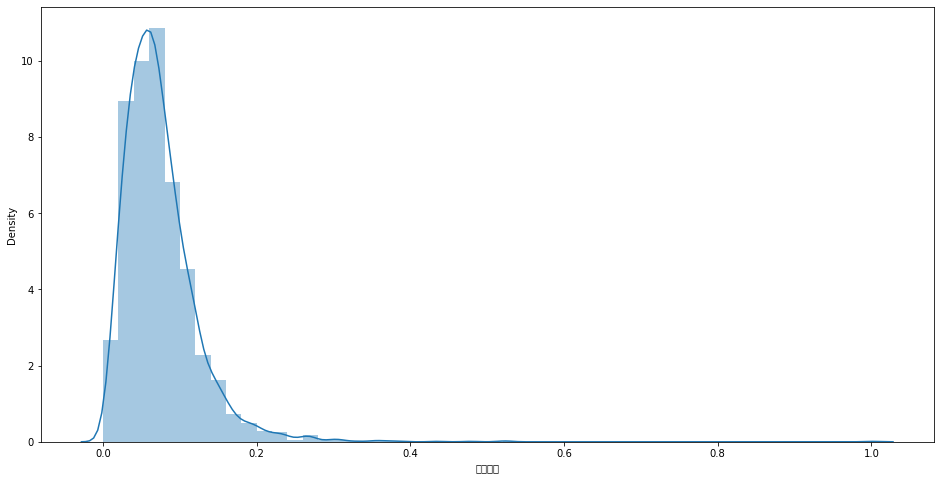

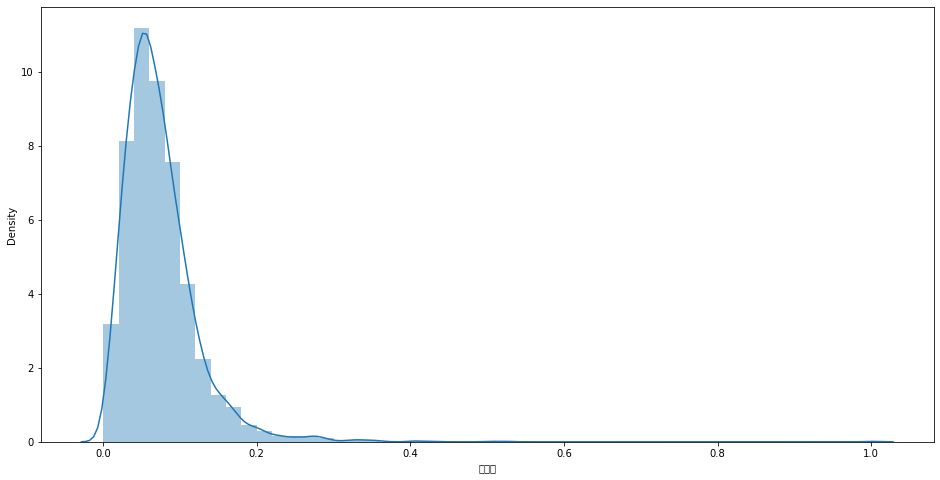

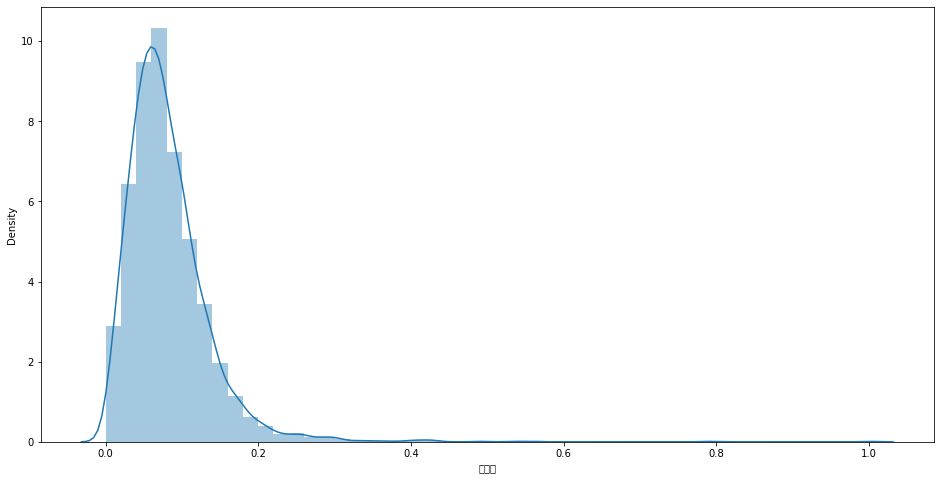

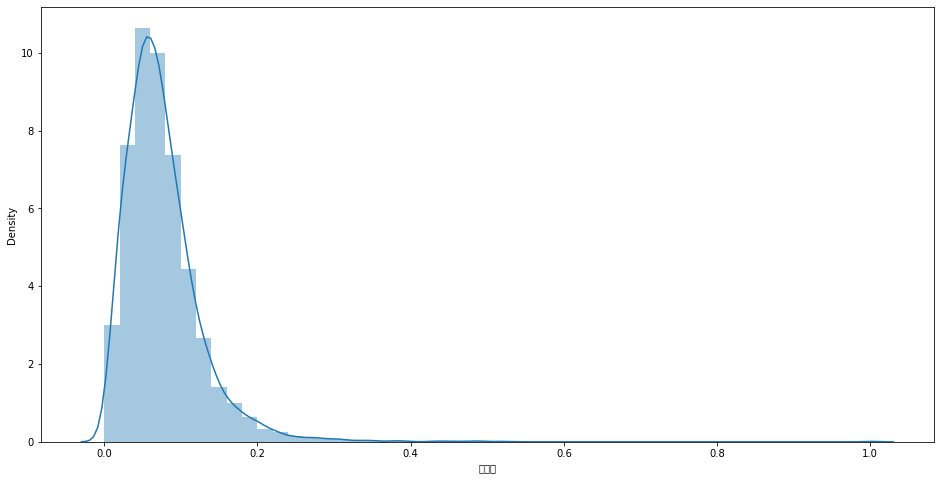

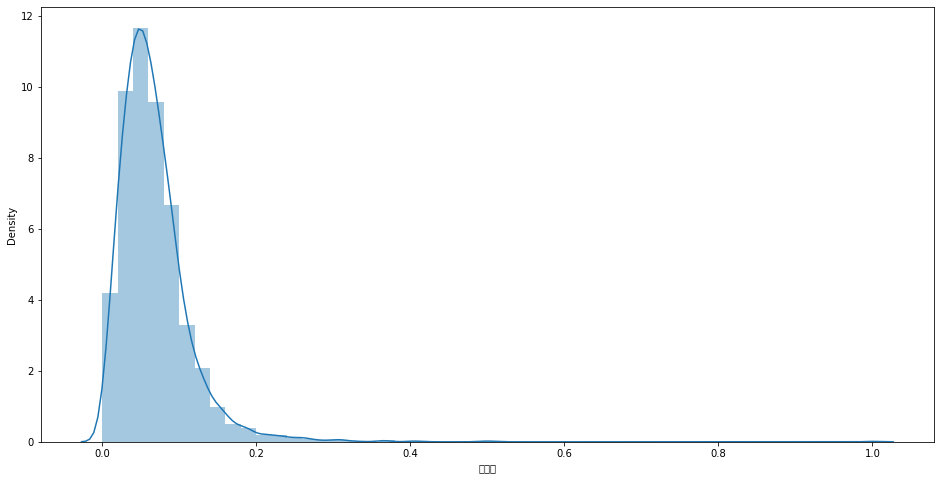

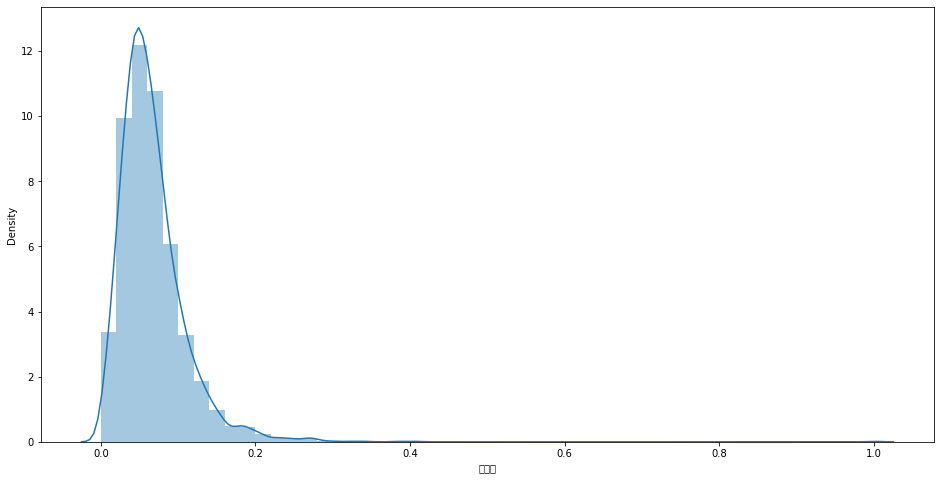

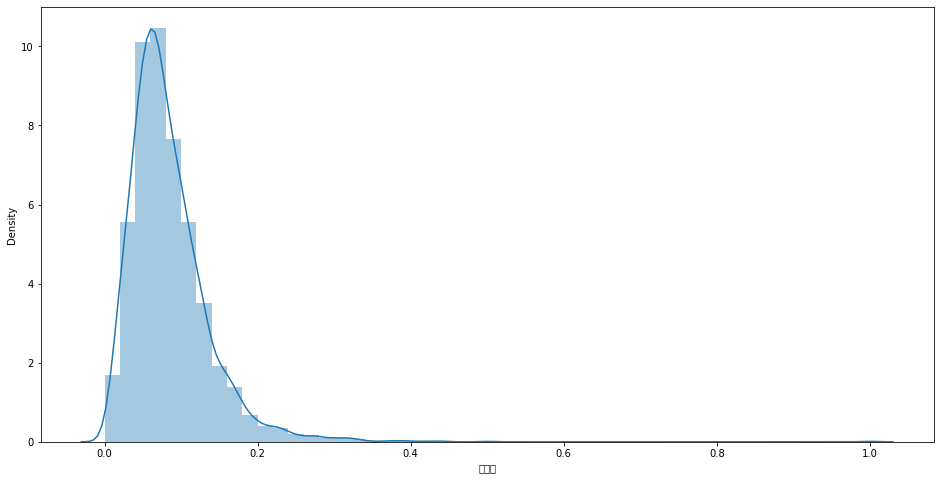

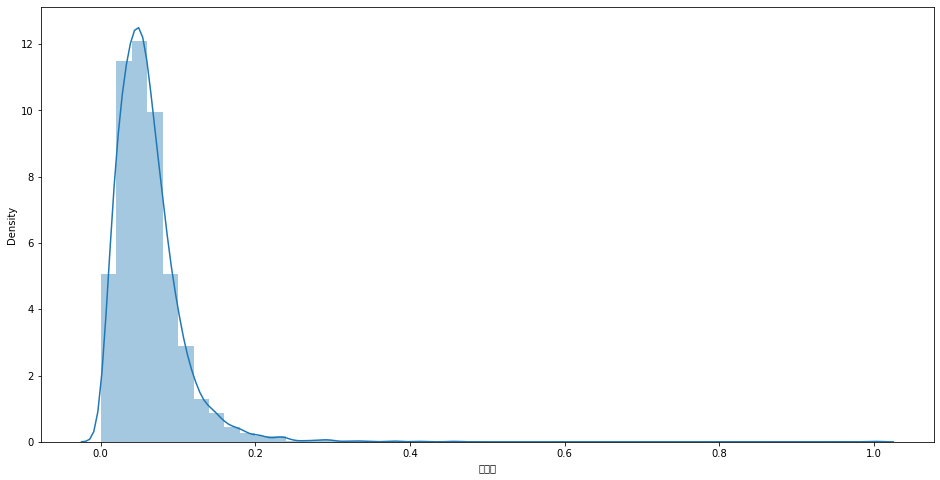

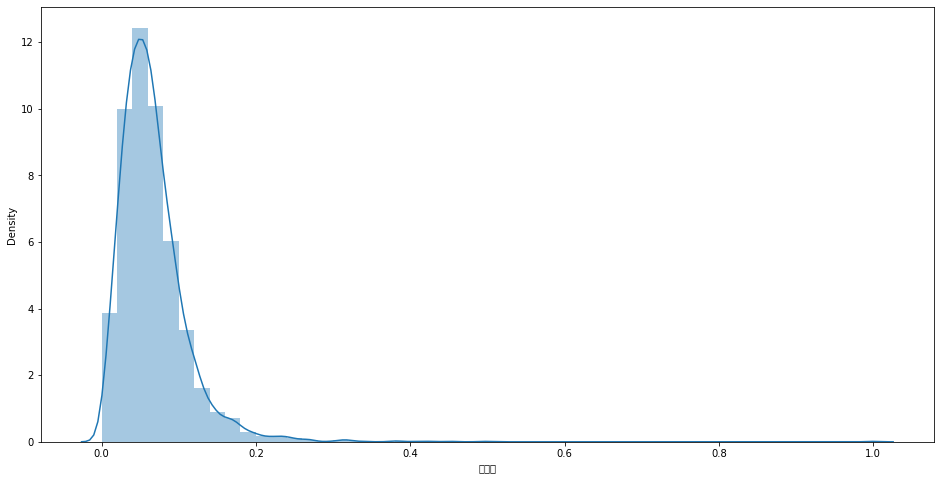

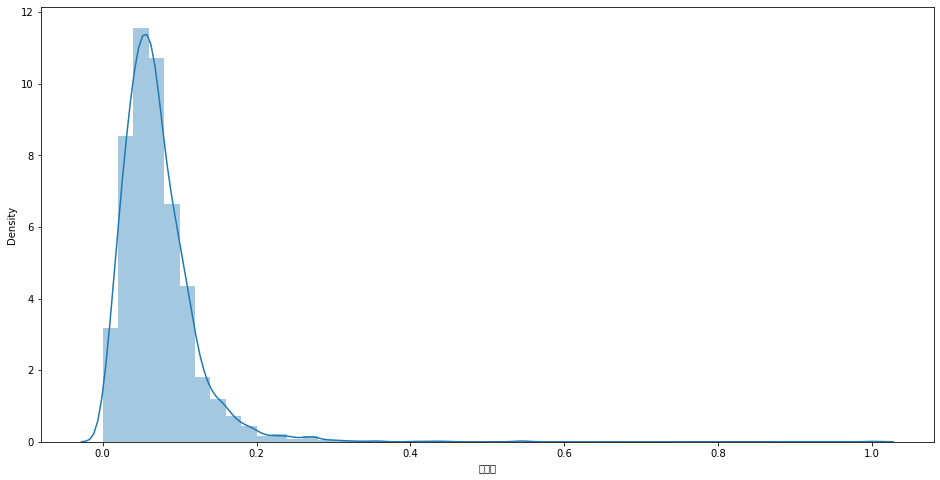

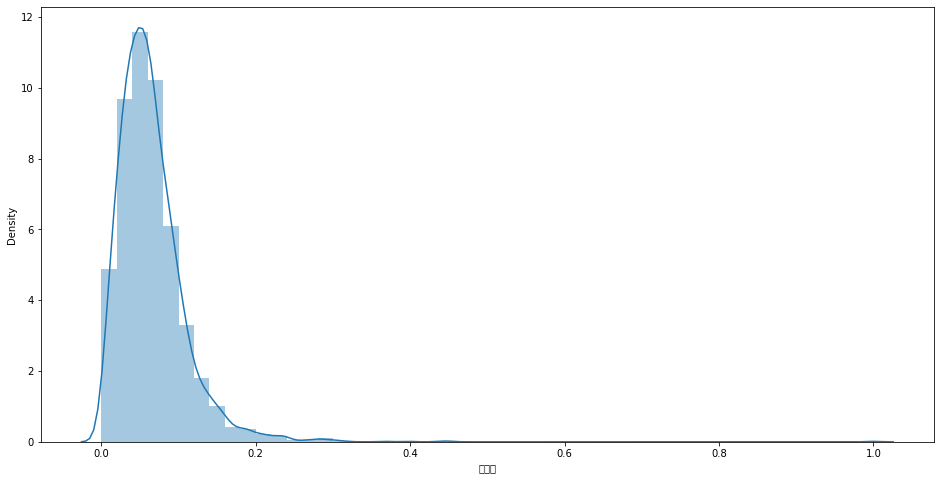

In [11]:
# minmaxscaler를 쓴 이후 데이터 분포
for i in df_minmax_scaler:
  plt.figure(figsize = (16,8))
  sns.distplot(df_minmax_scaler[i])
  plt.show()

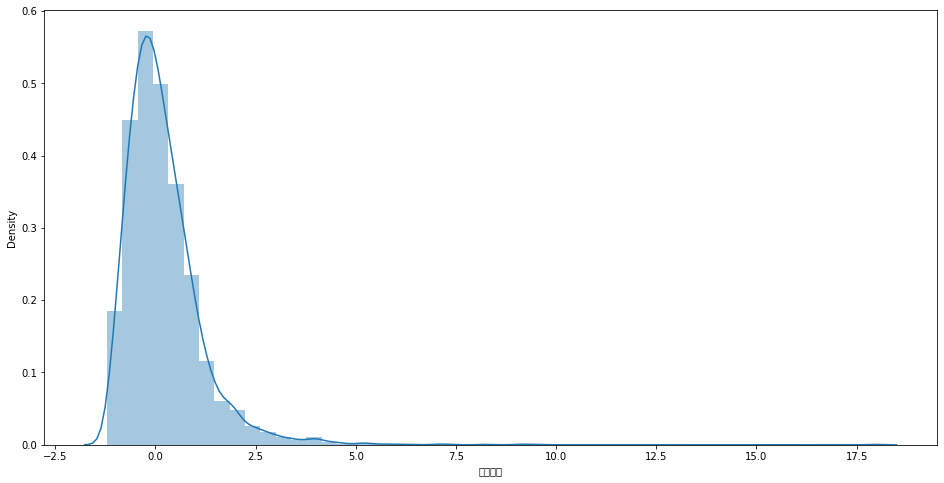

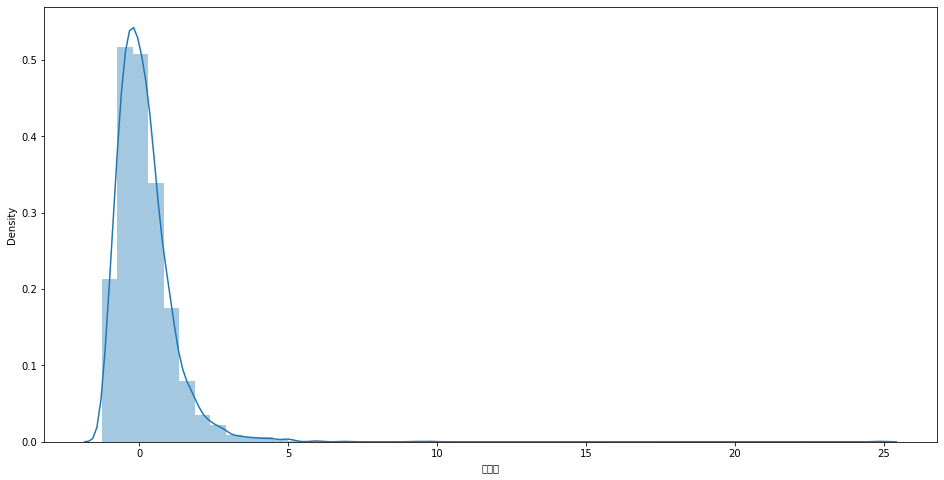

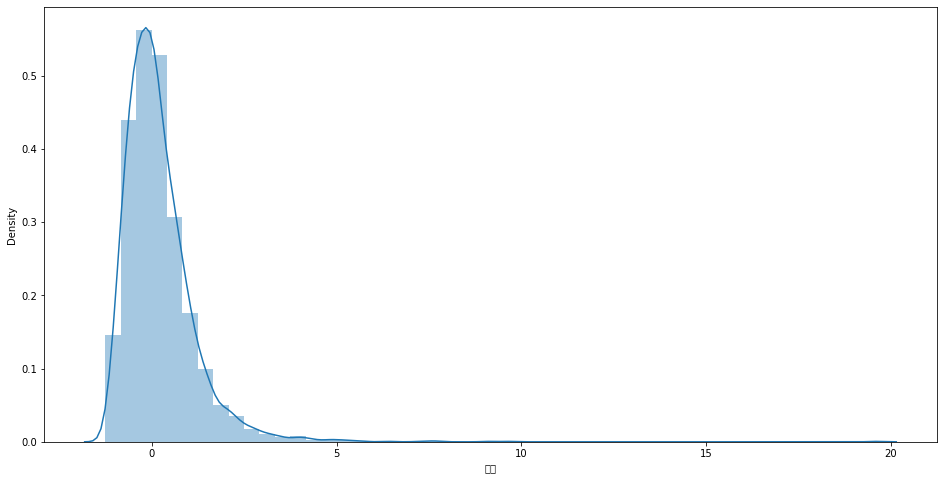

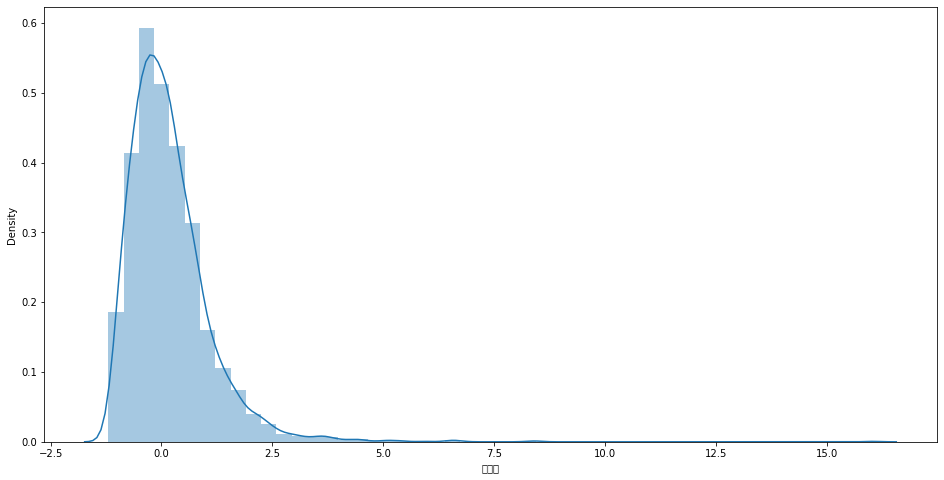

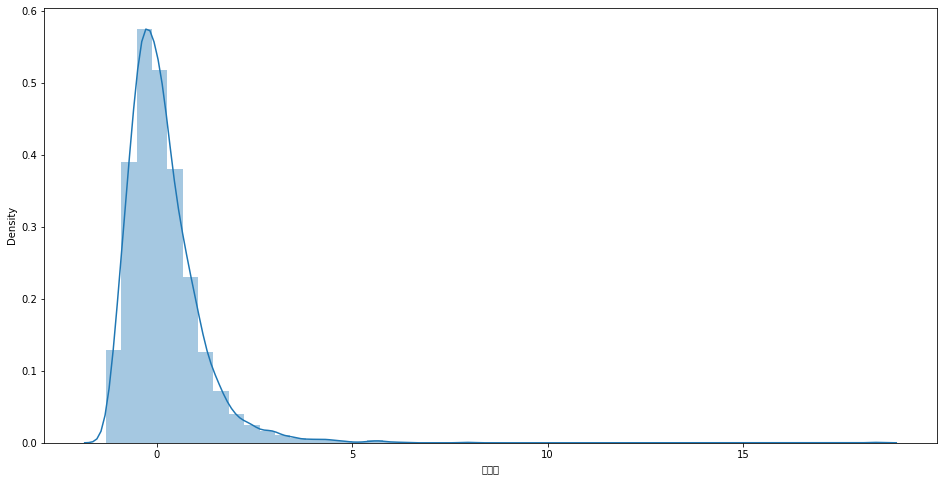

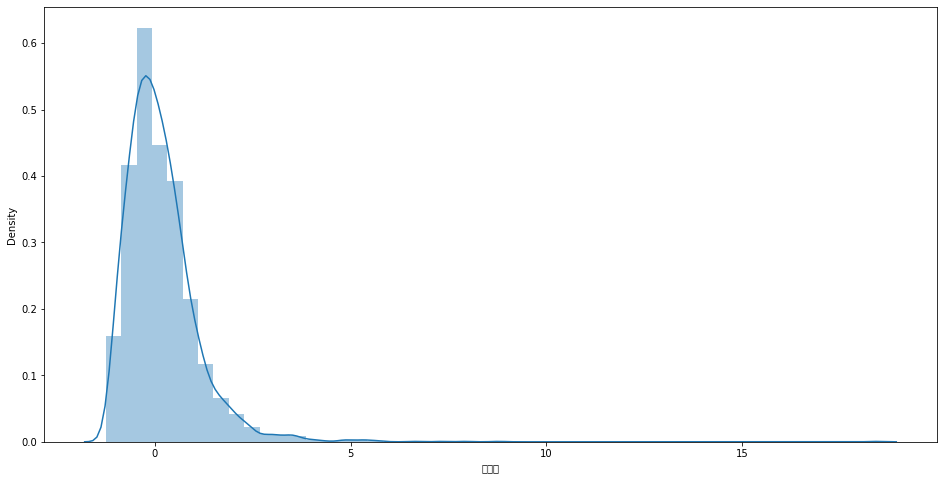

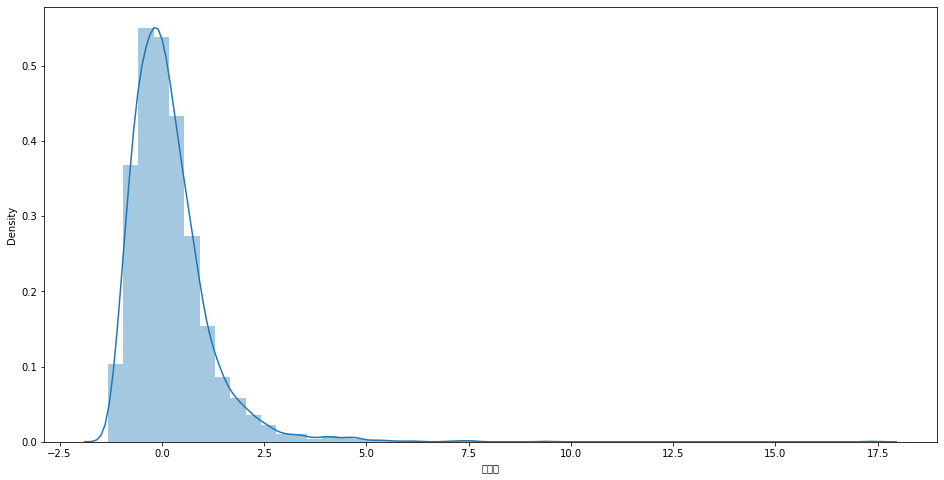

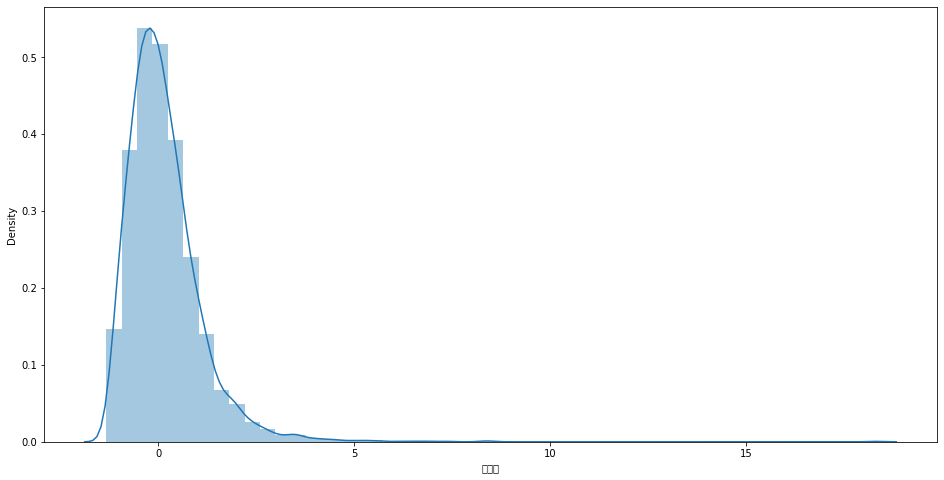

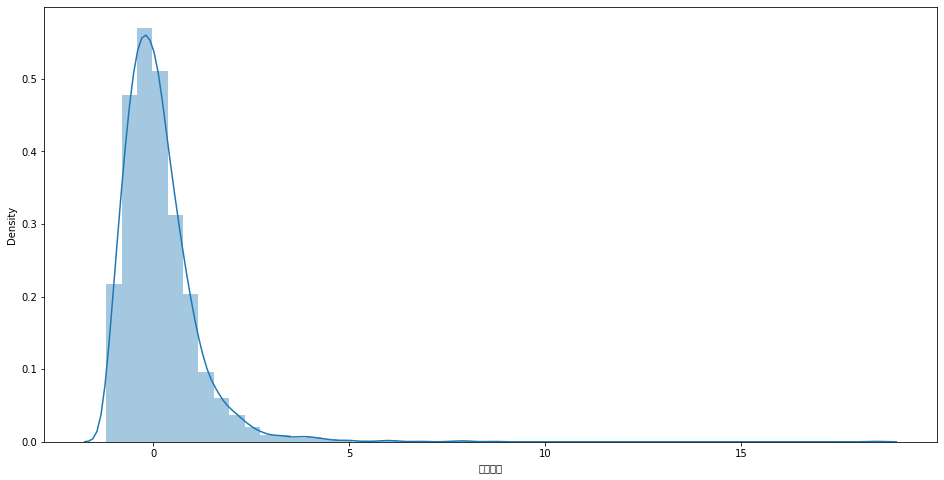

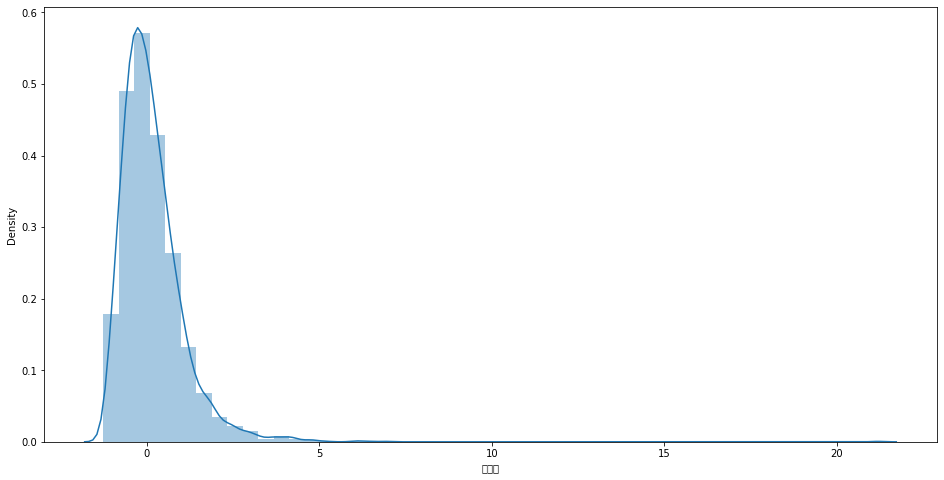

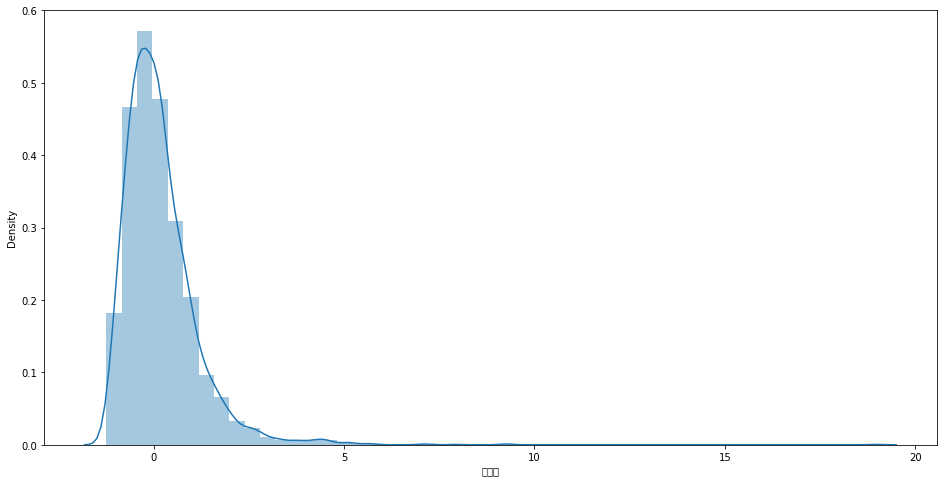

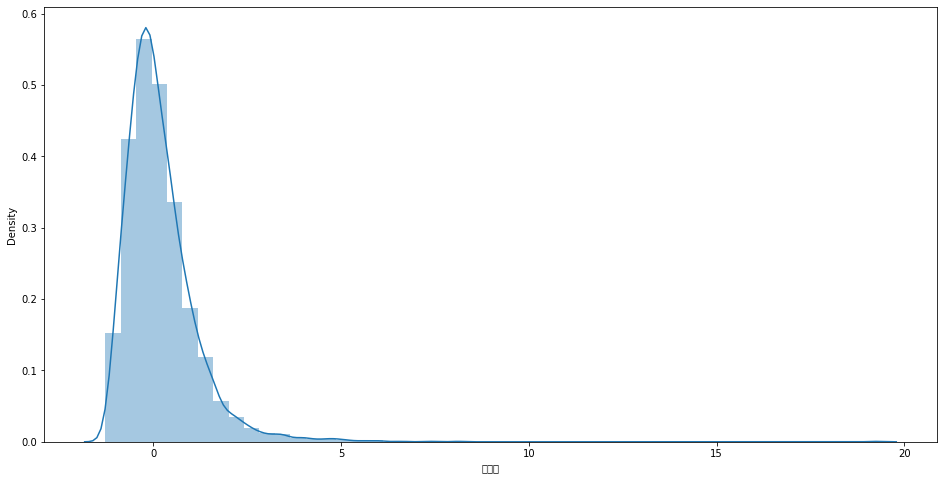

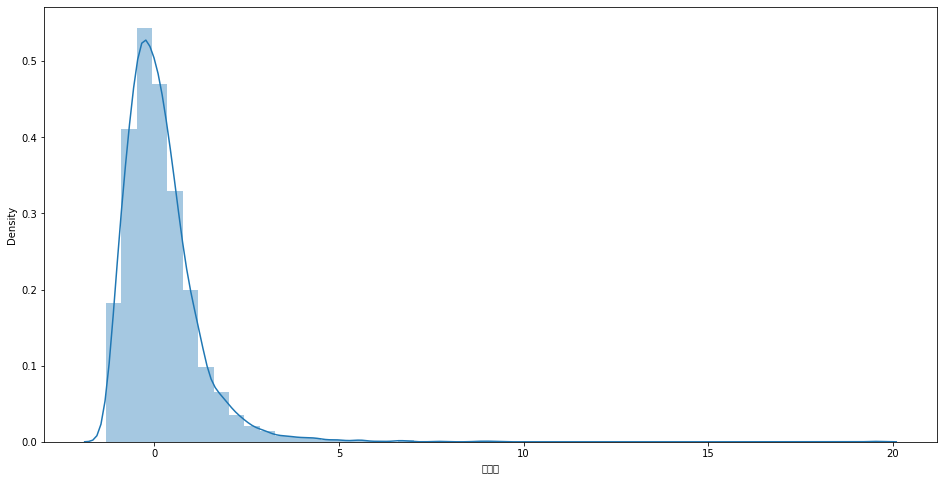

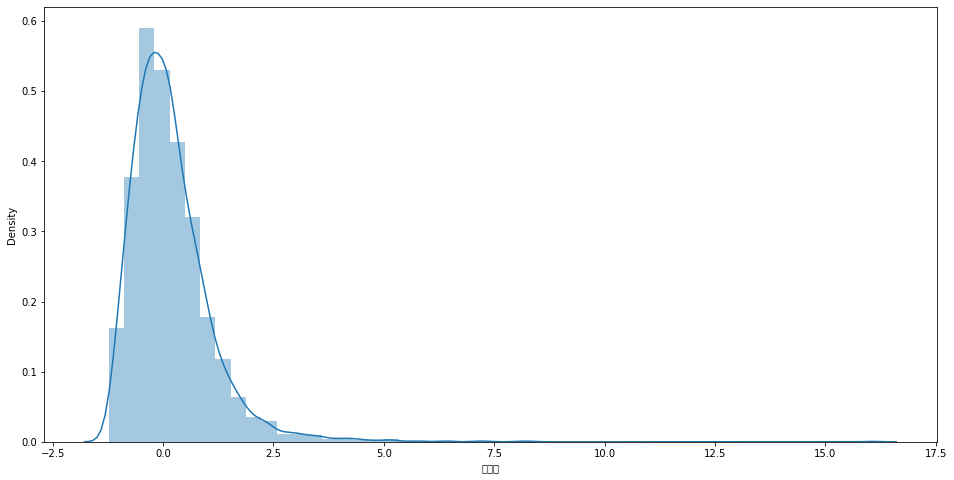

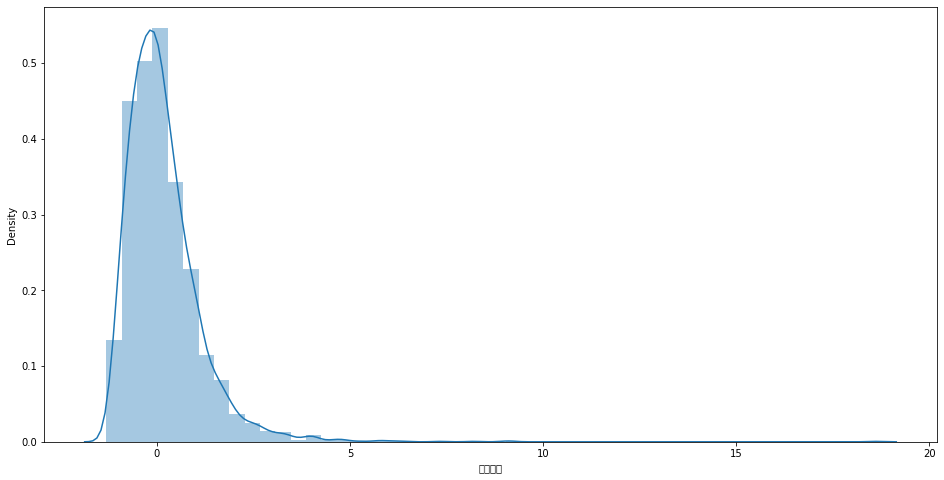

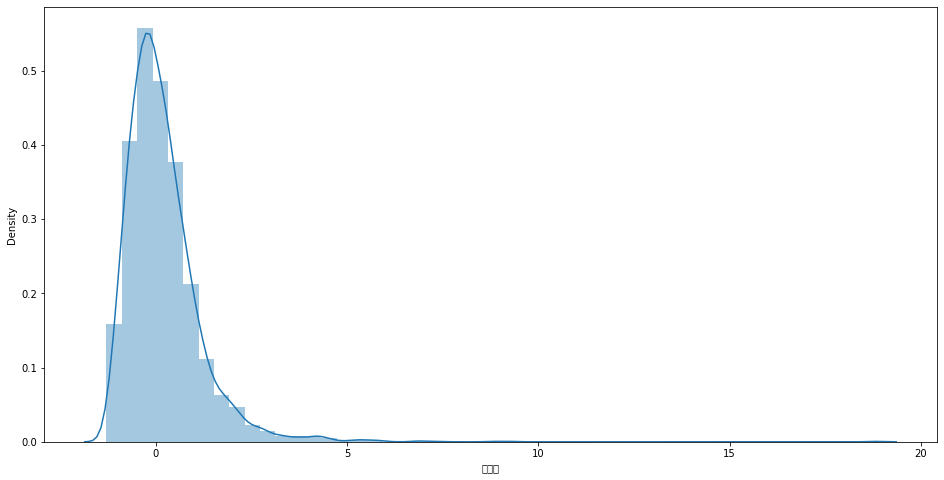

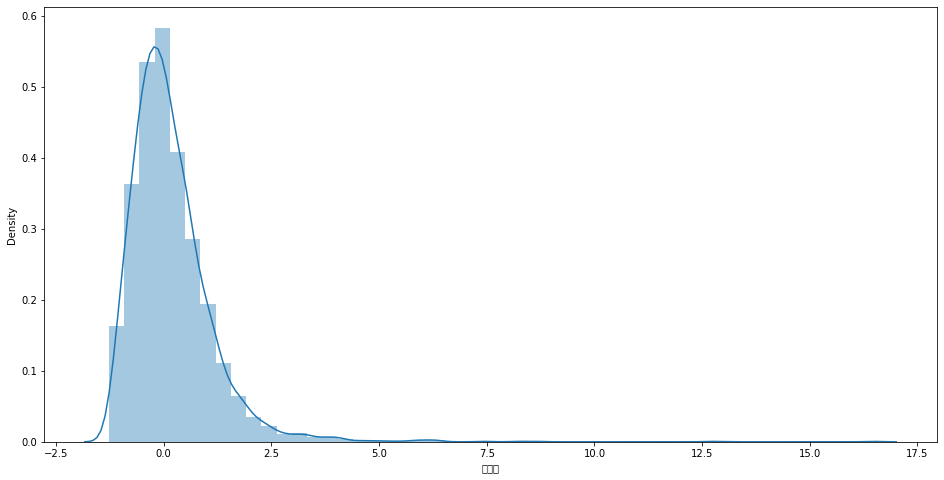

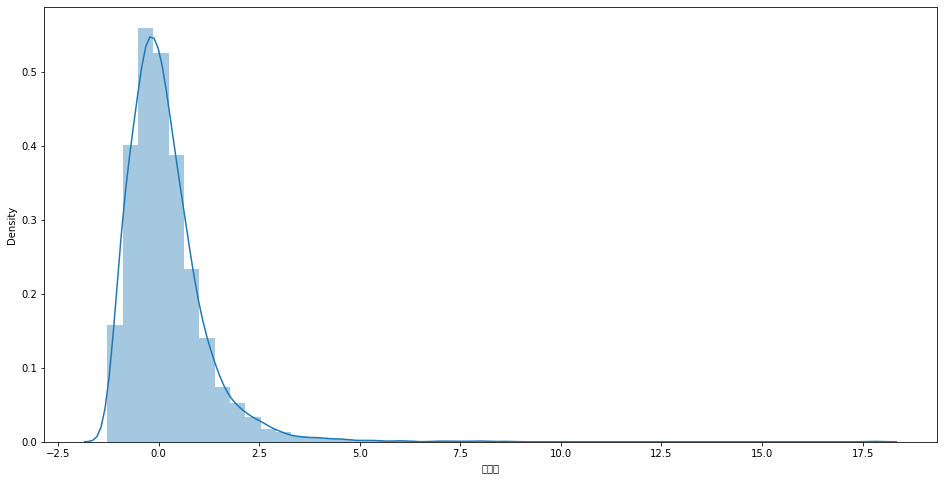

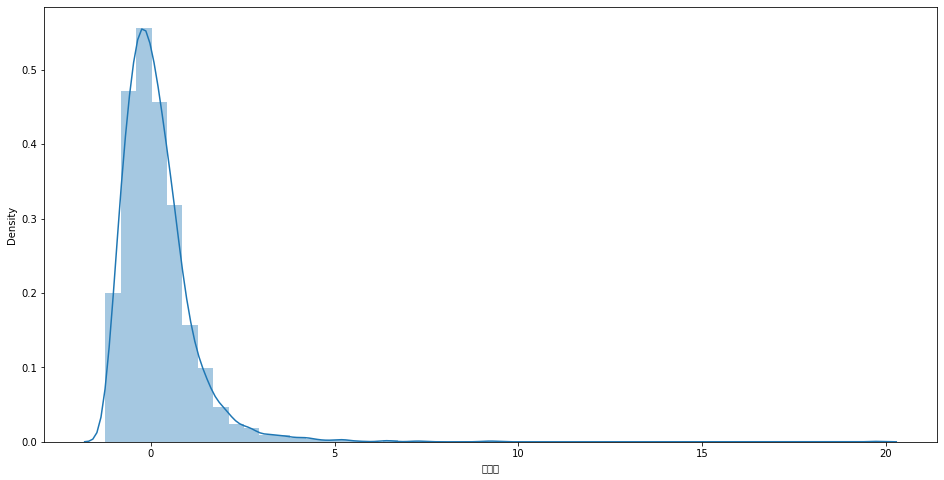

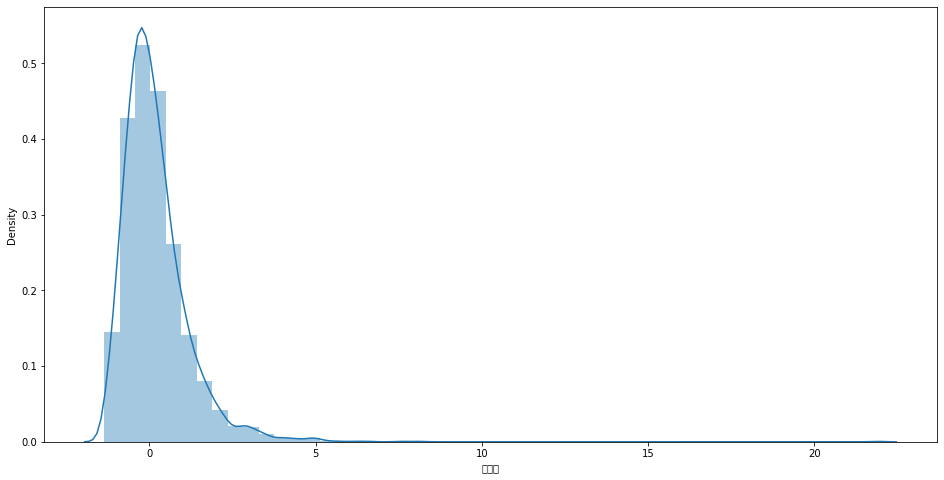

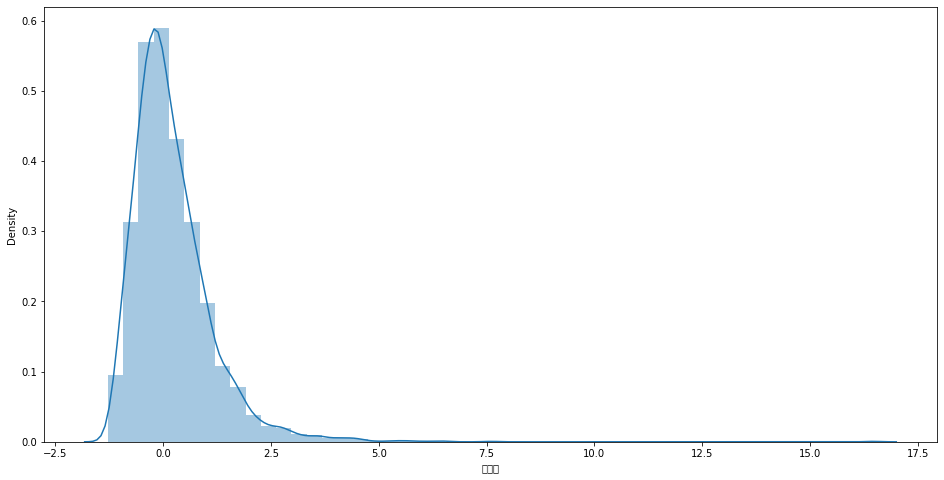

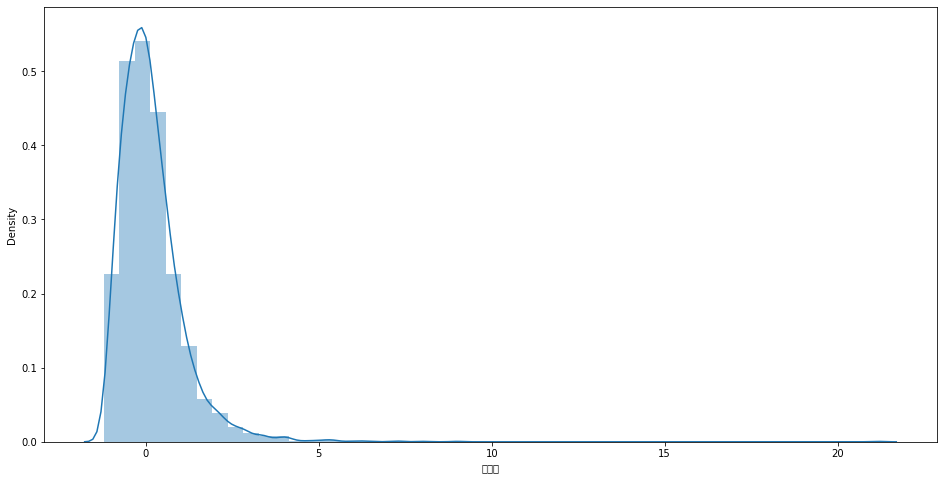

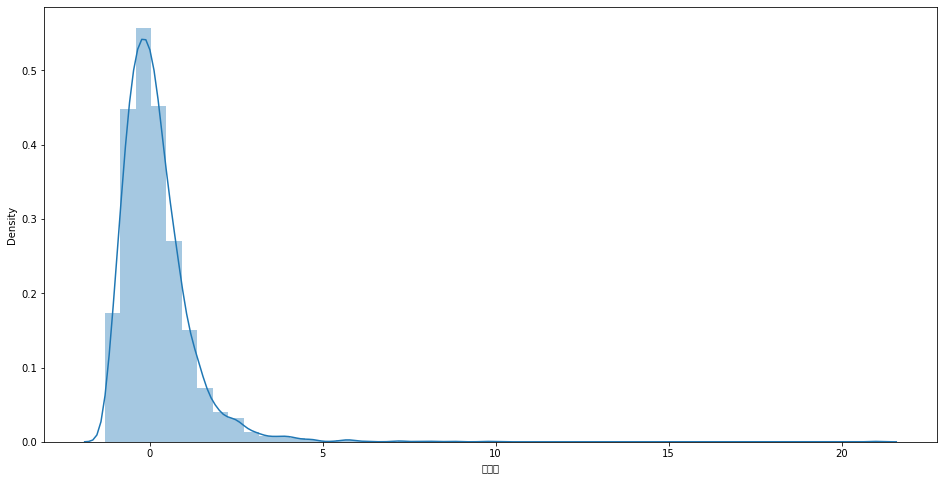

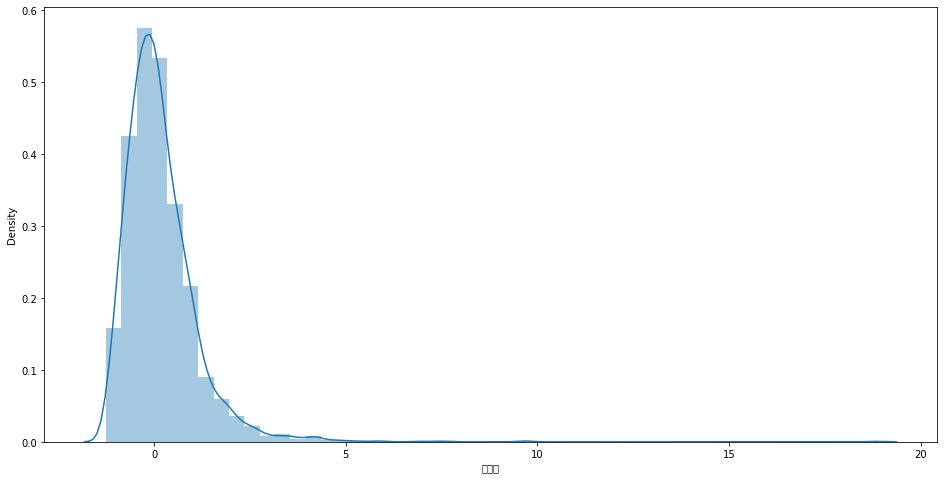

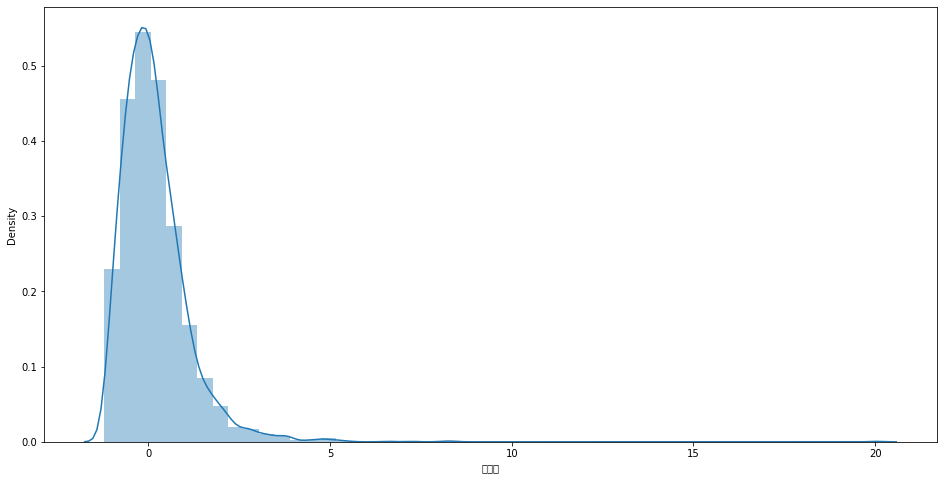

In [12]:
# robust scaler를 쓴 이후 데이터
for i in df_scaler.columns:
  plt.figure(figsize = (16,8))
  sns.distplot(df_scaler[i])
  plt.show()

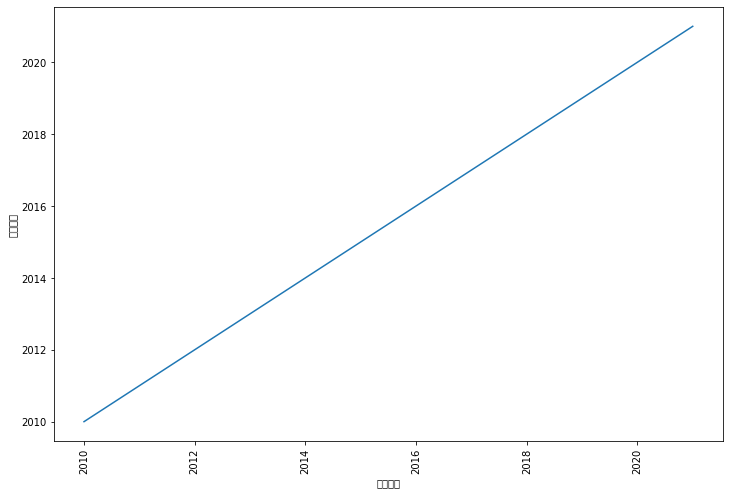

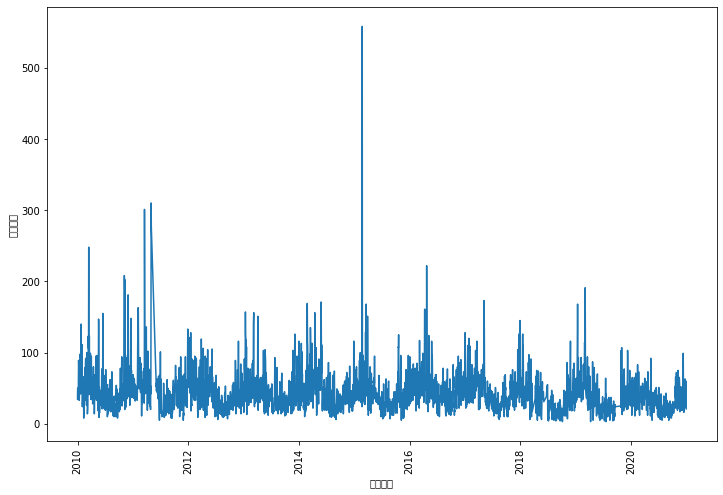

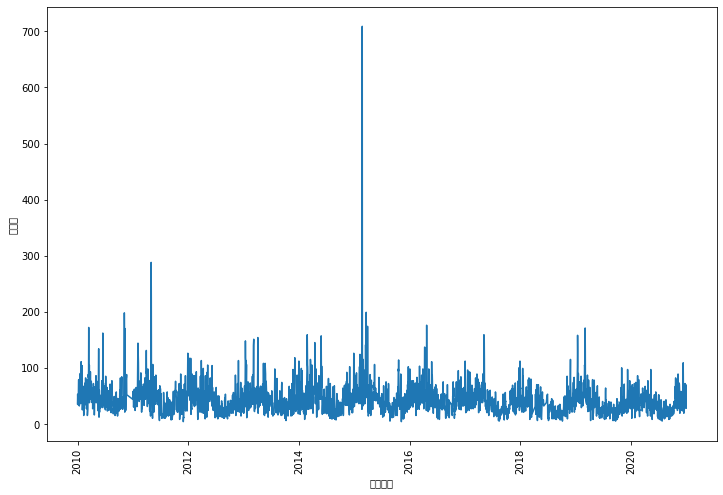

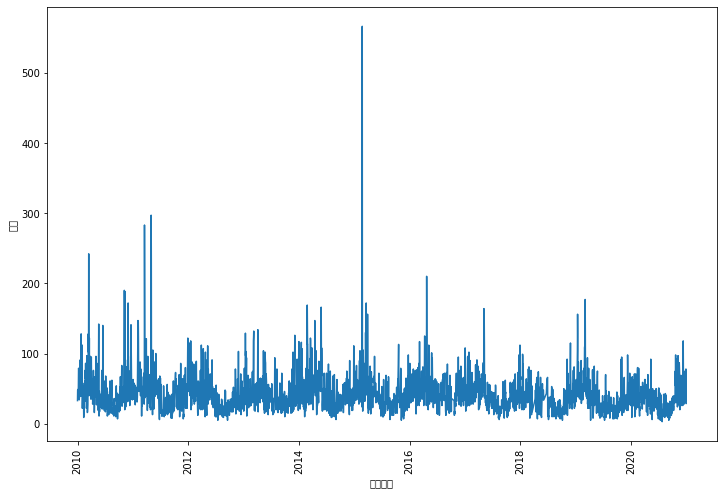

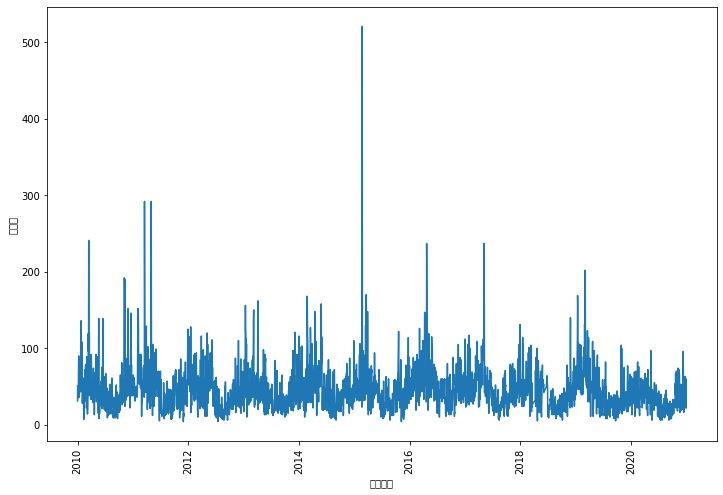

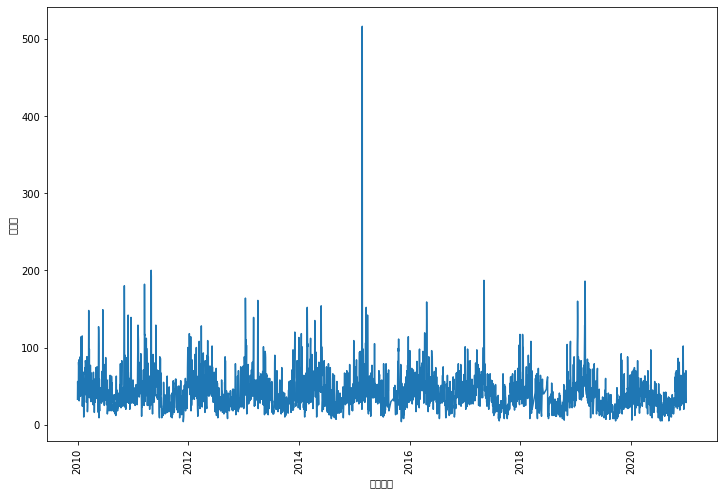

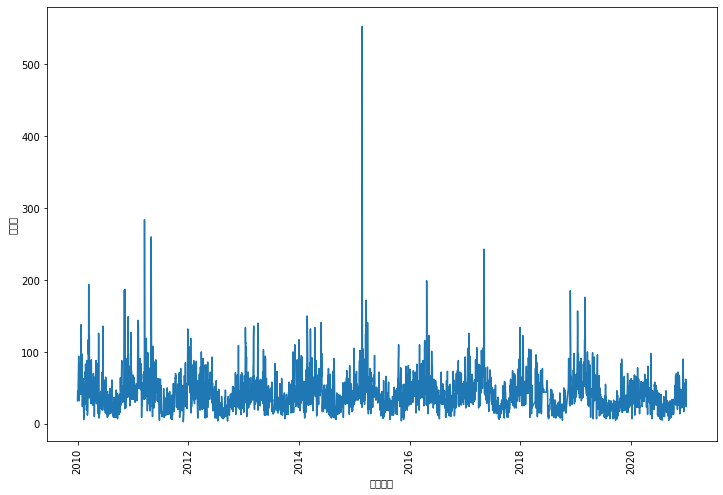

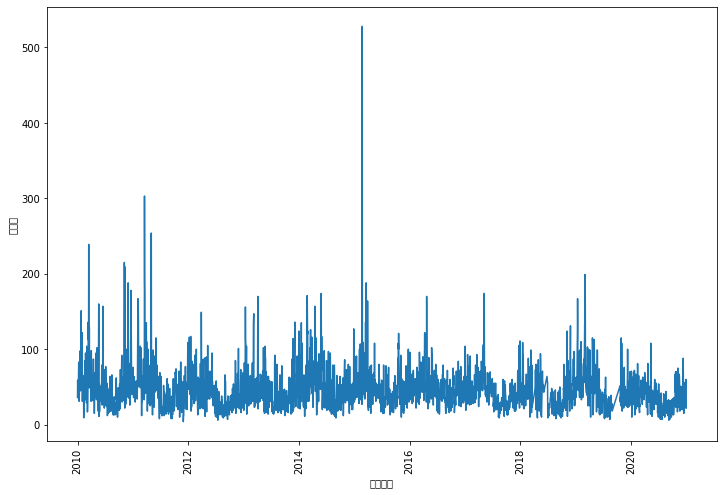

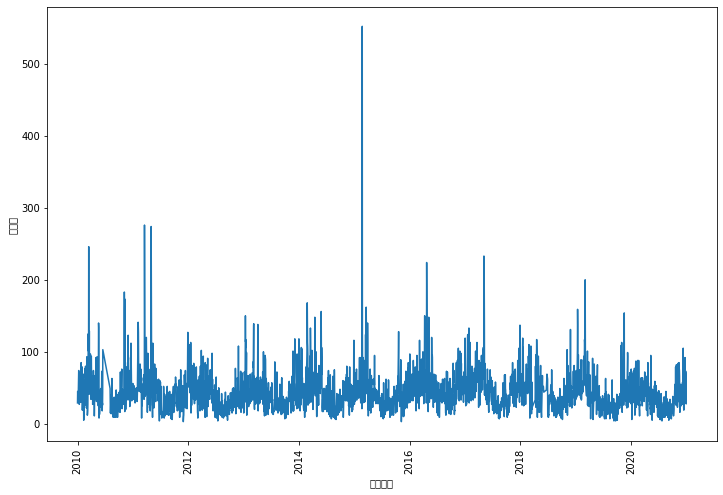

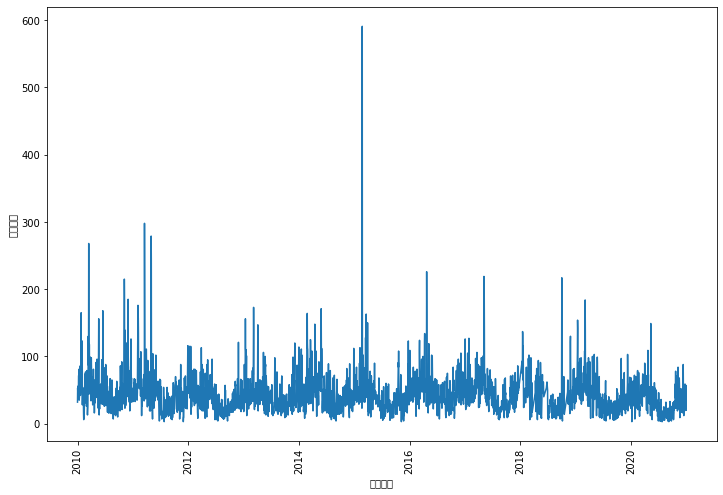

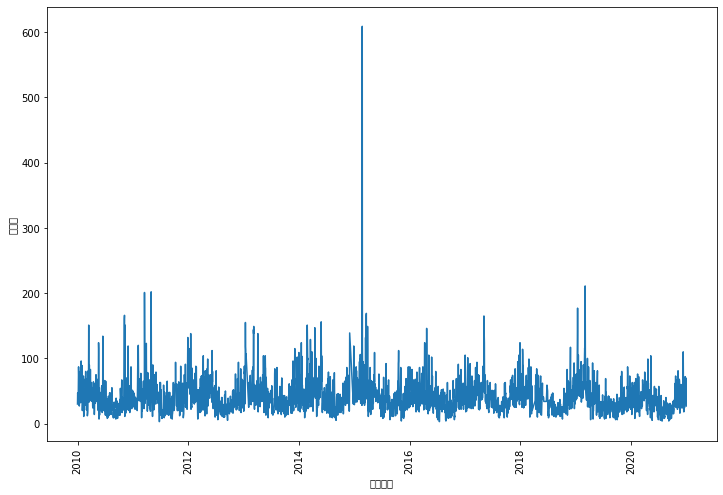

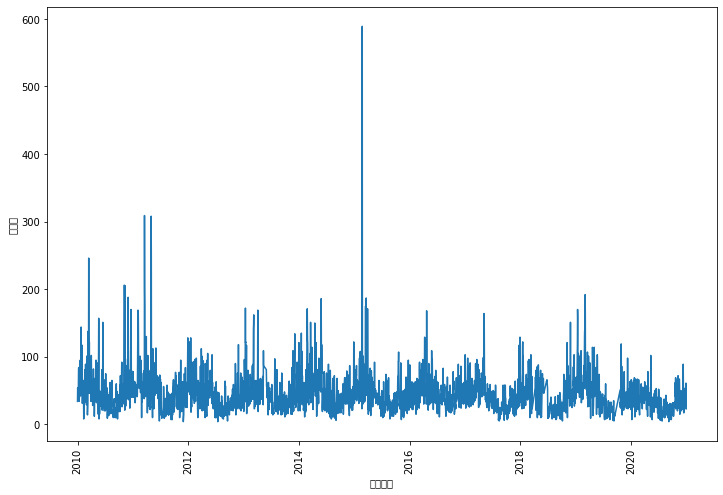

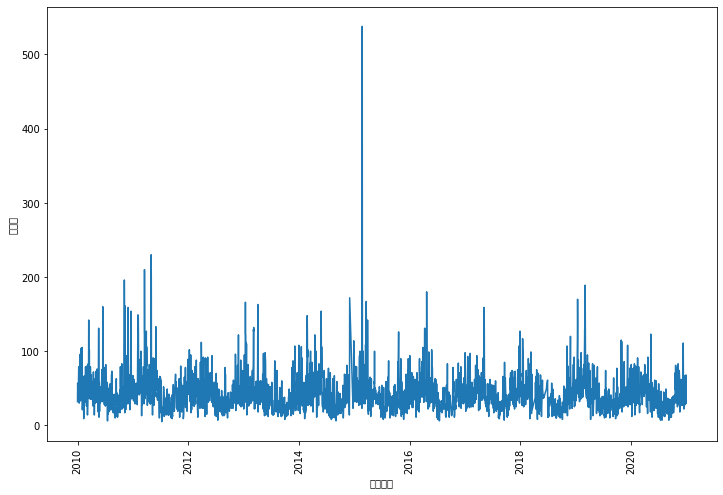

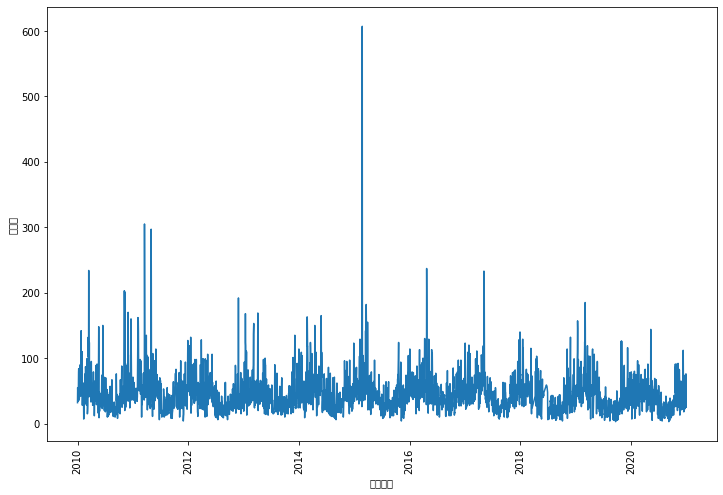

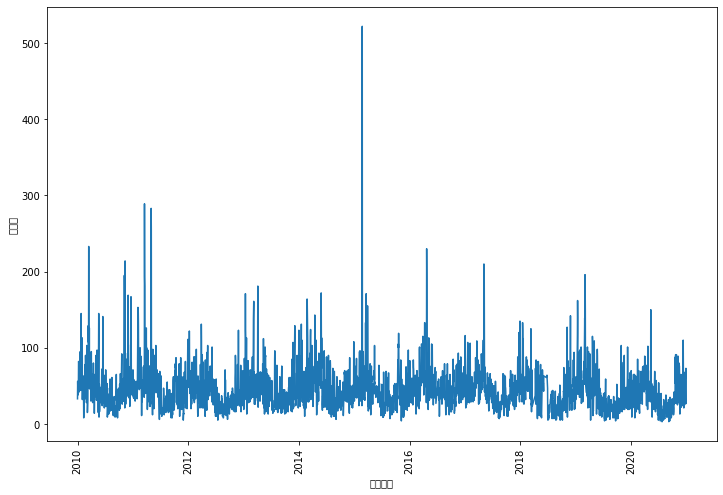

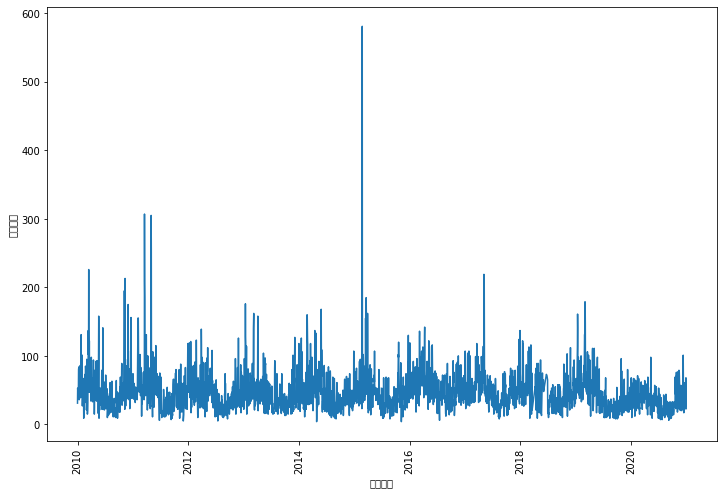

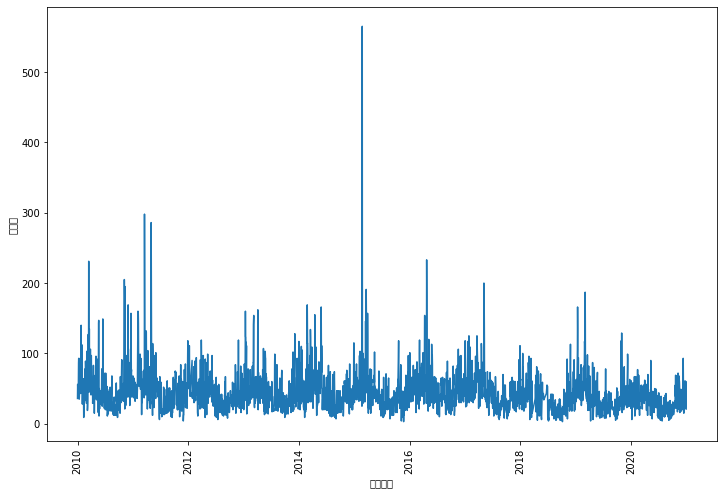

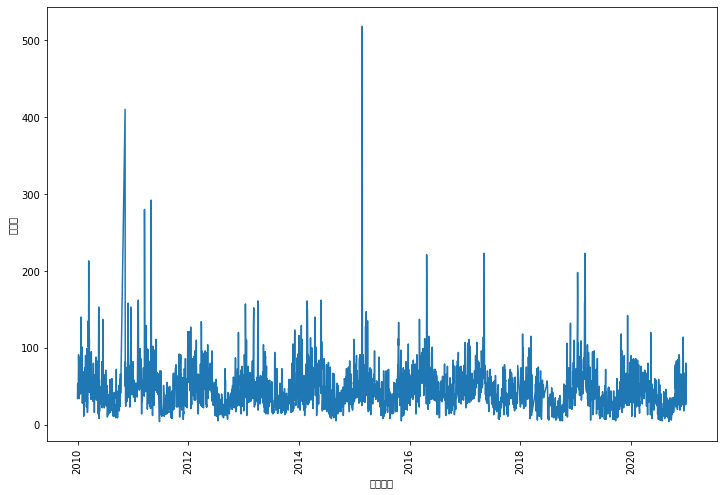

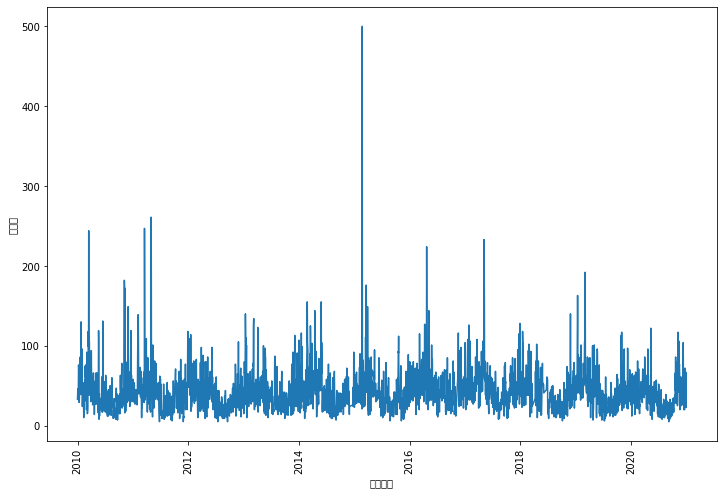

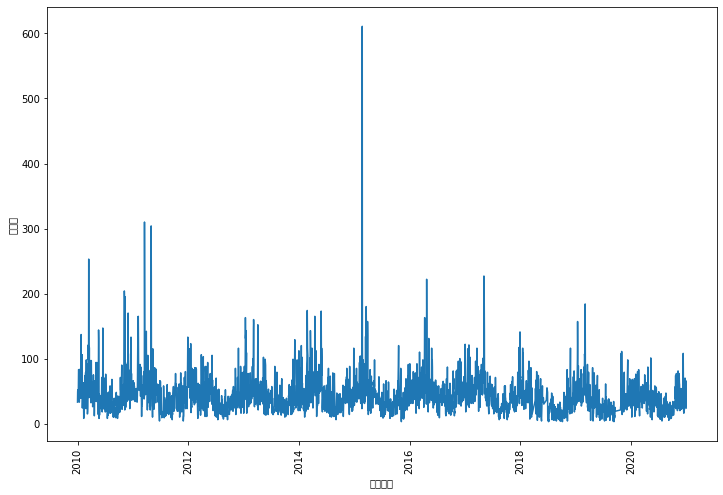

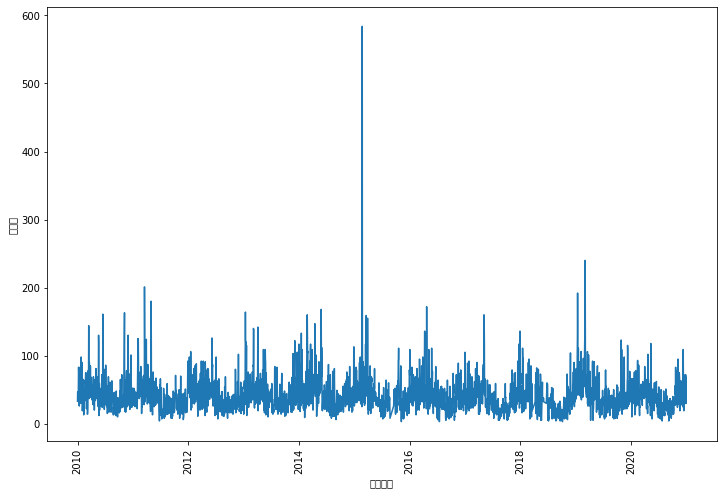

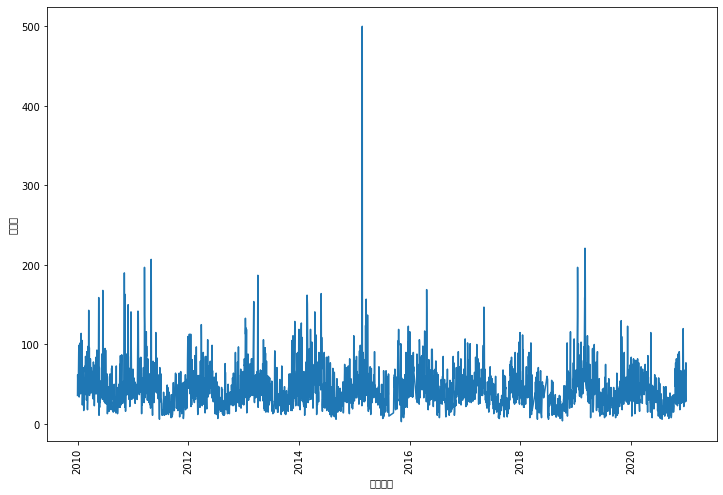

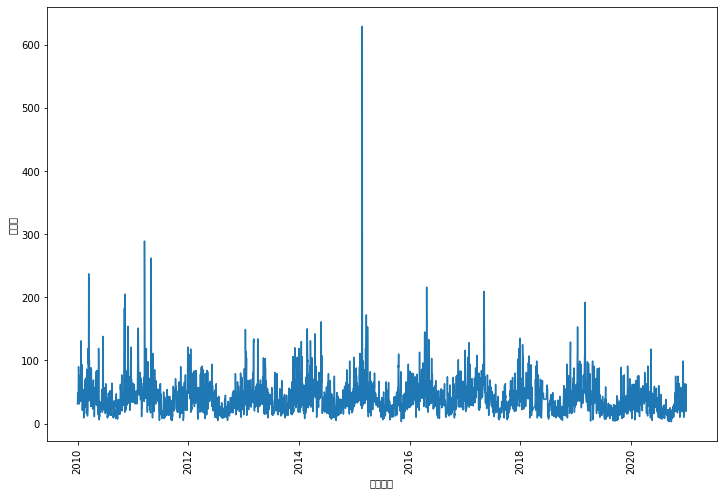

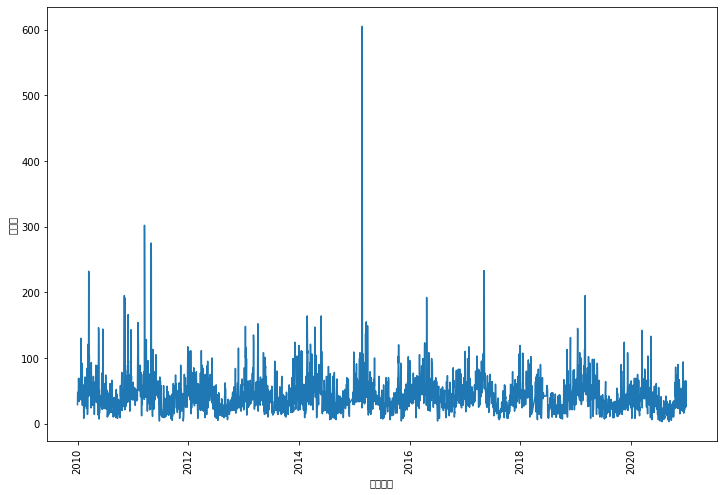

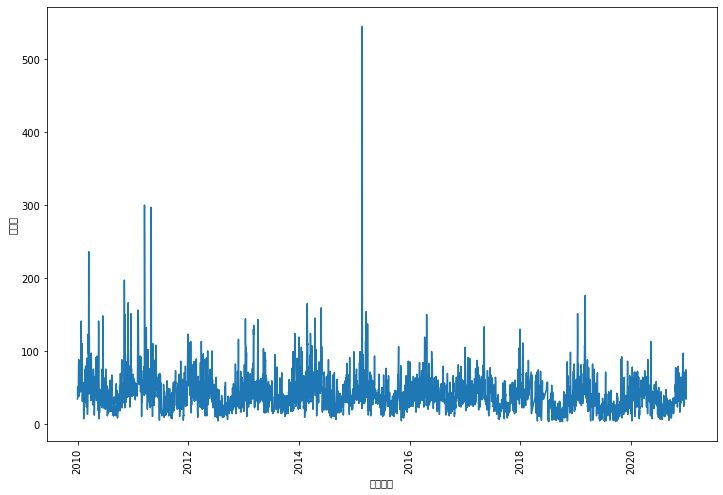

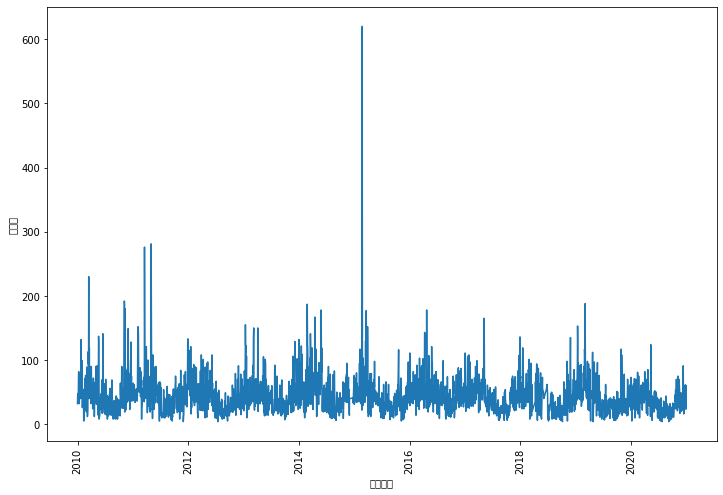

In [13]:
# 데이터 lineplot으로 확인해보기
for i in df.columns:
  plt.figure(figsize = (12,8))
  sns.lineplot(data = df, x = '측정일자', y = i)
  plt.xticks(rotation = 90)
  plt.show()

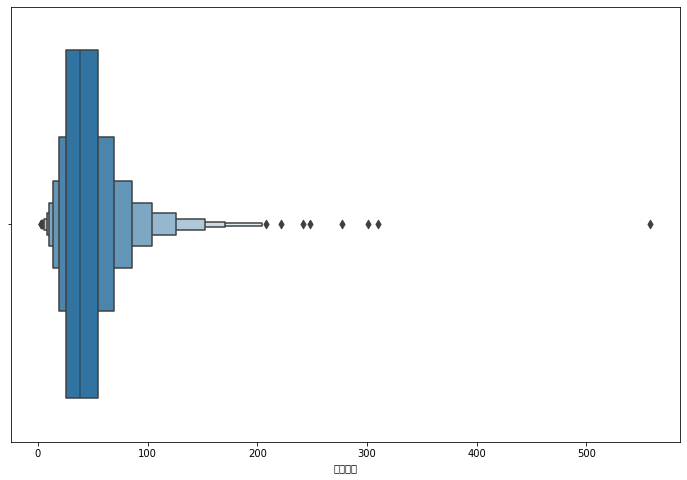

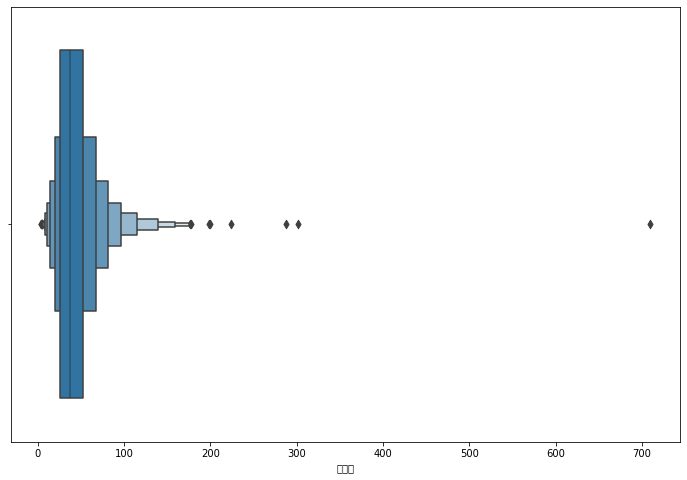

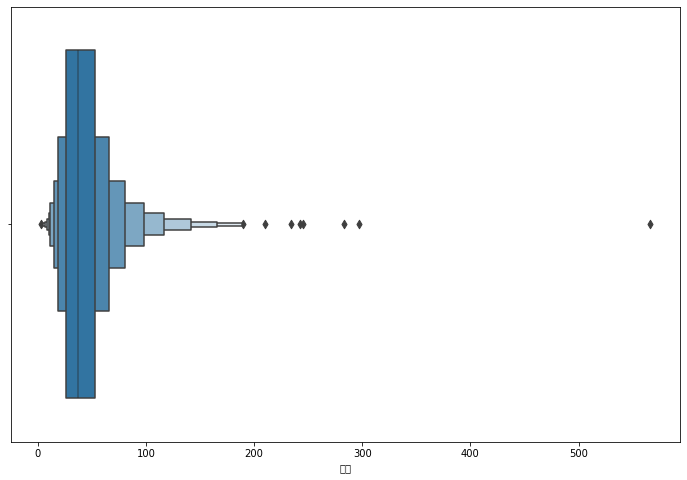

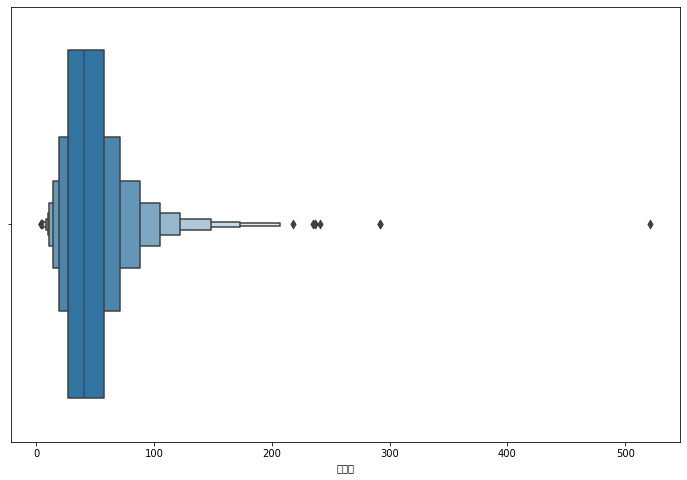

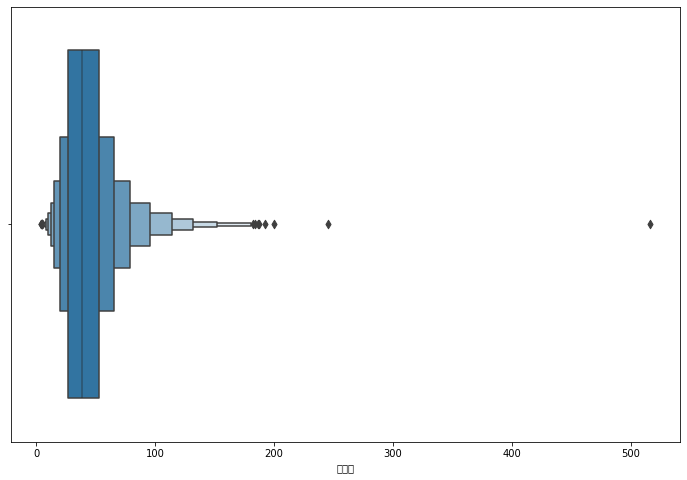

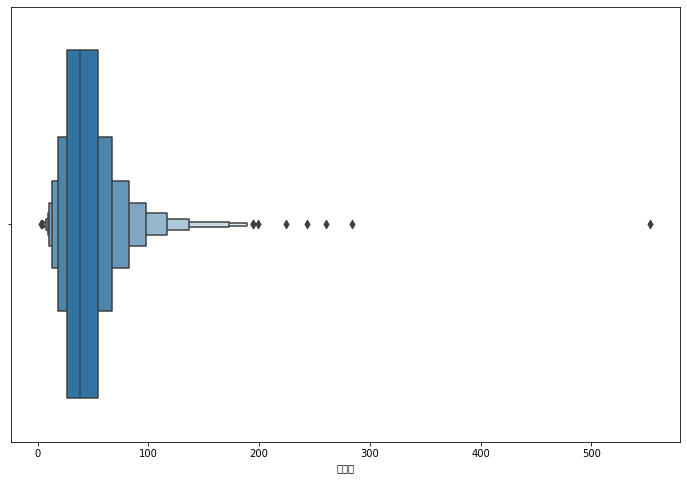

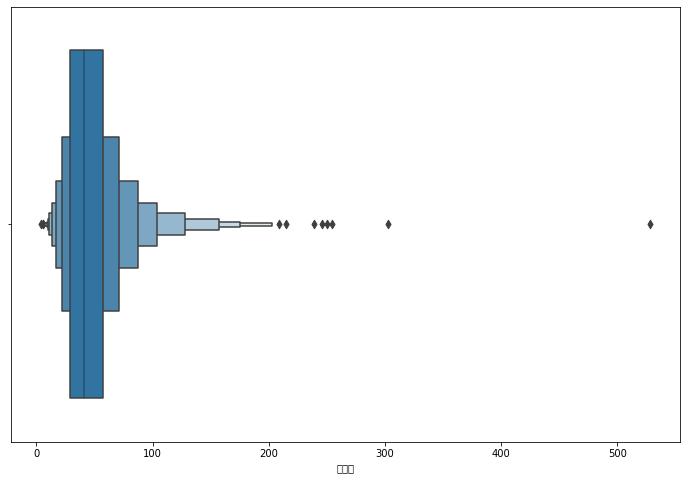

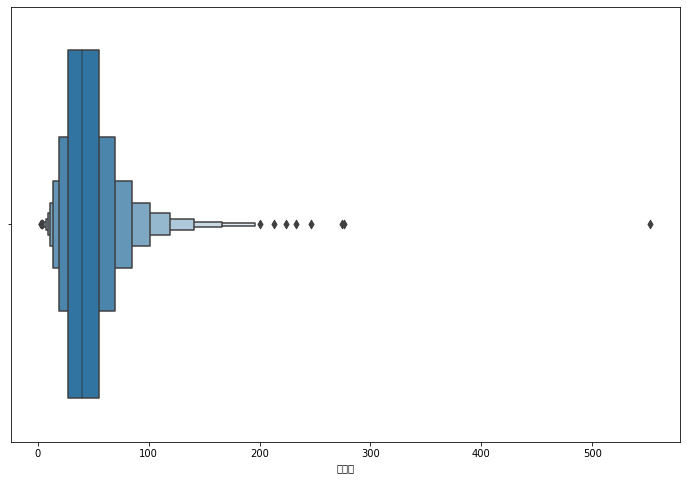

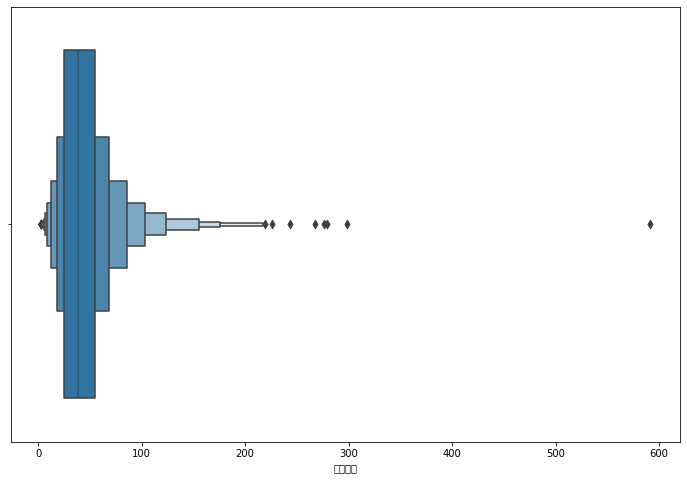

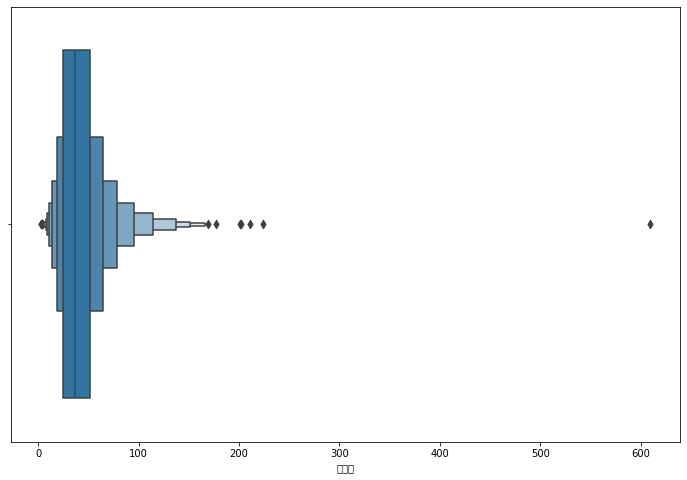

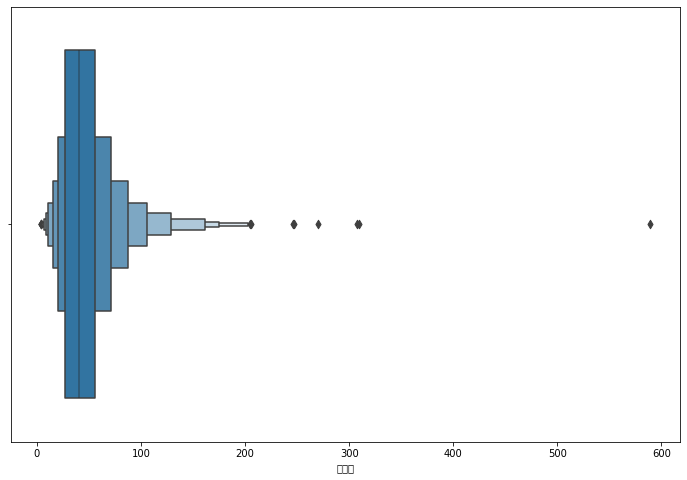

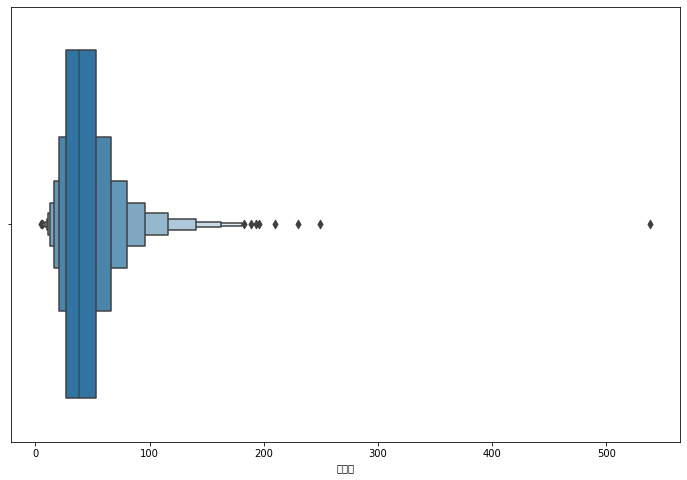

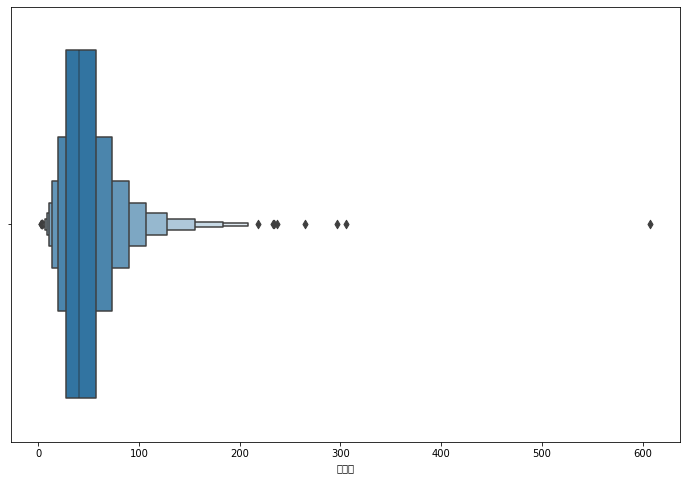

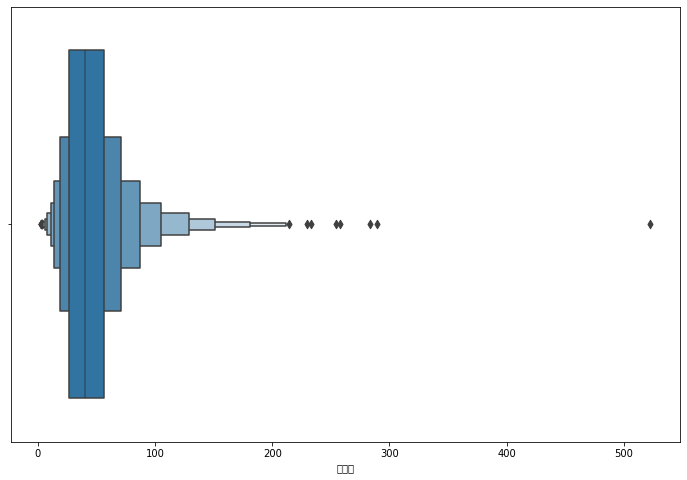

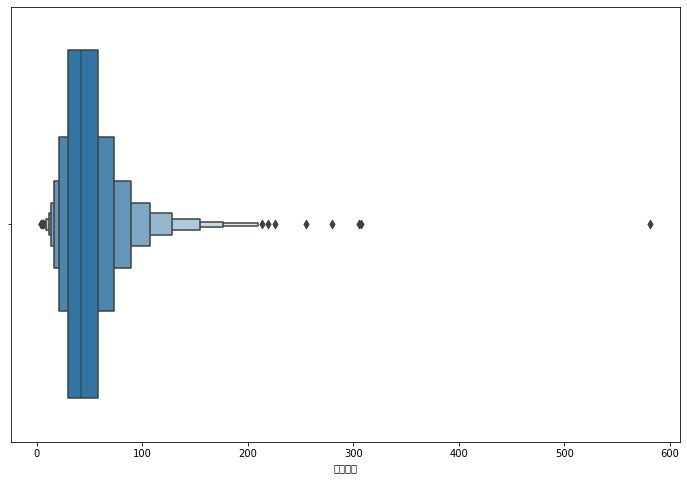

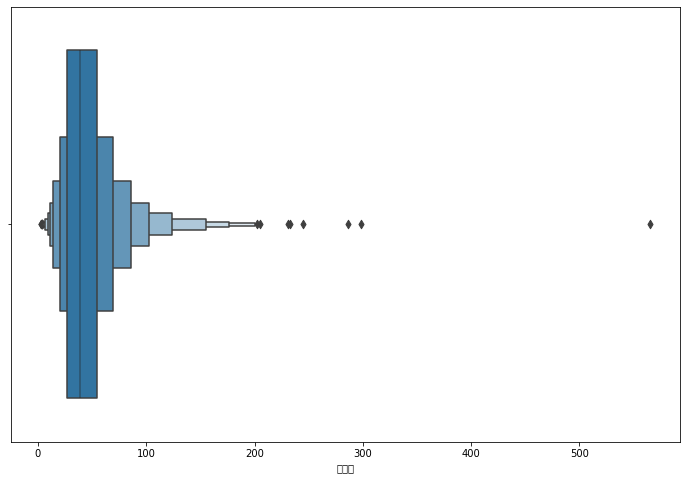

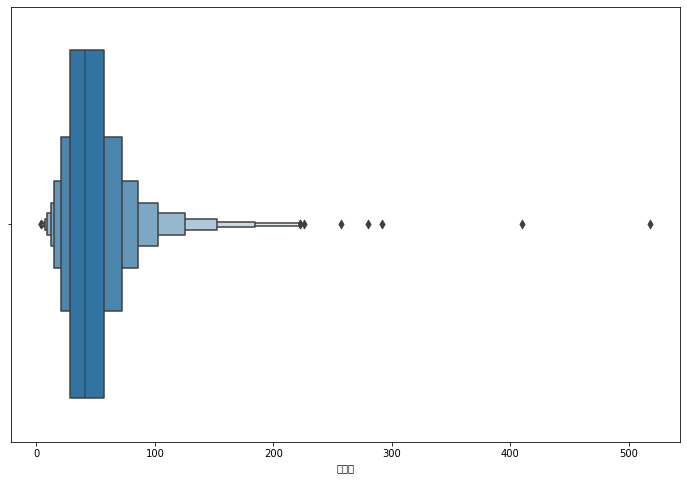

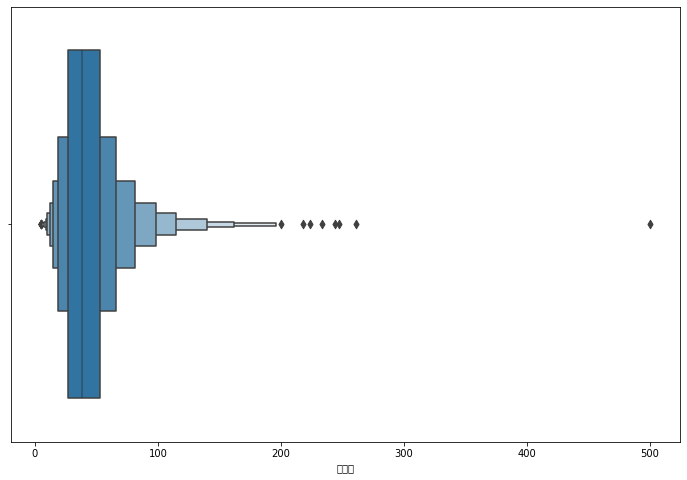

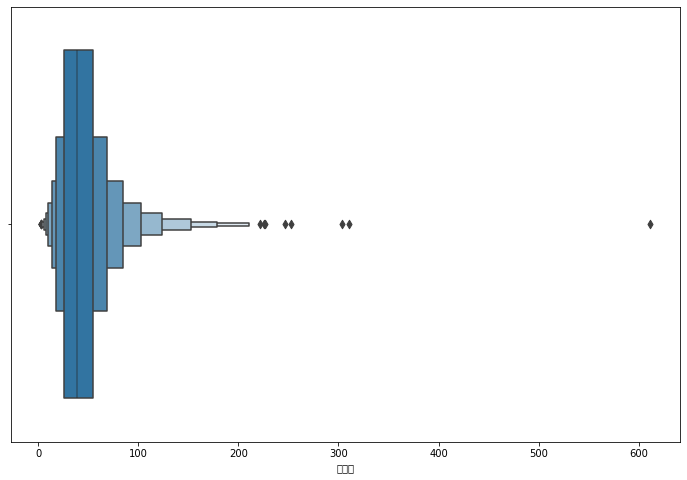

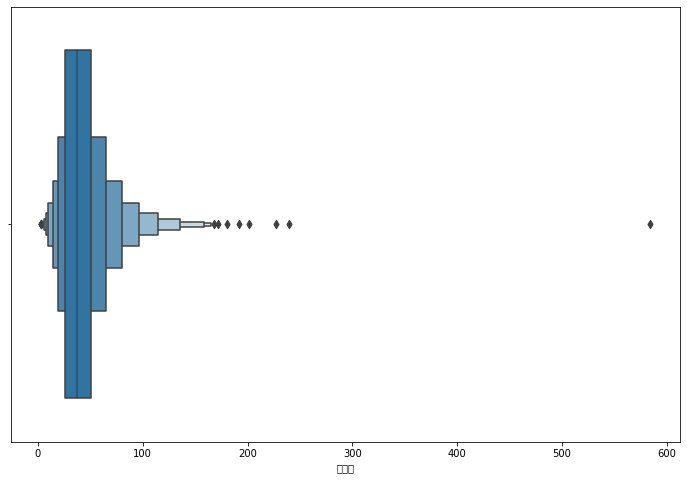

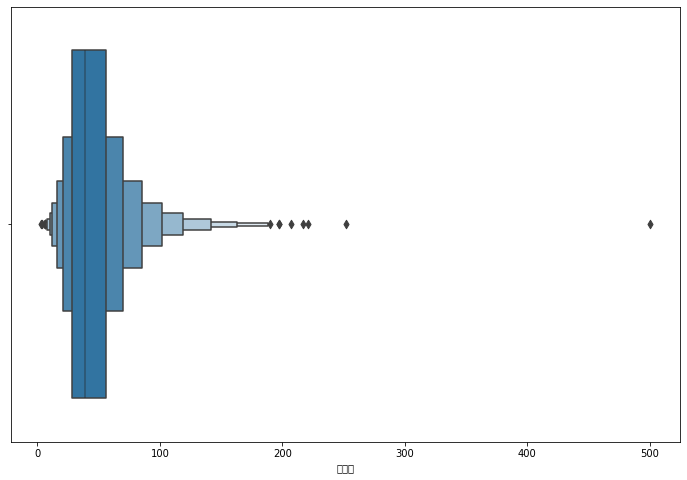

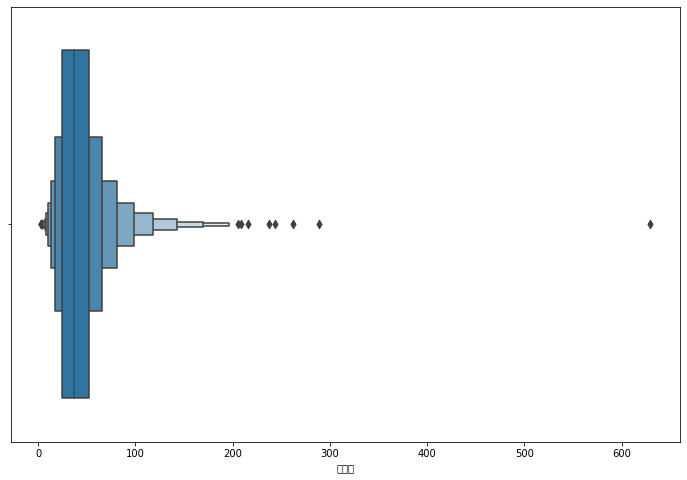

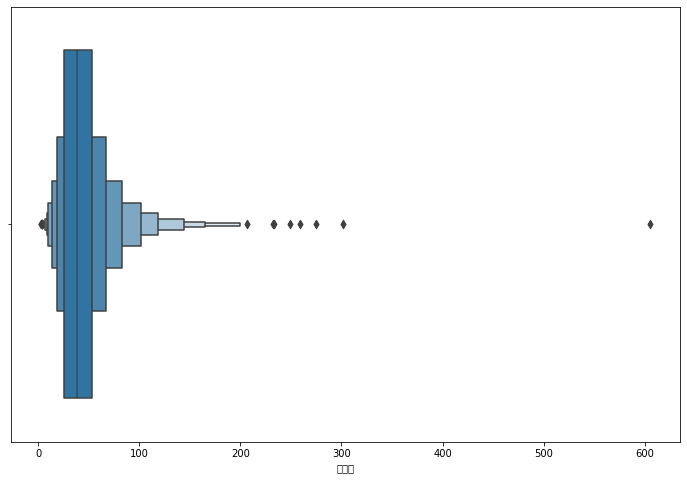

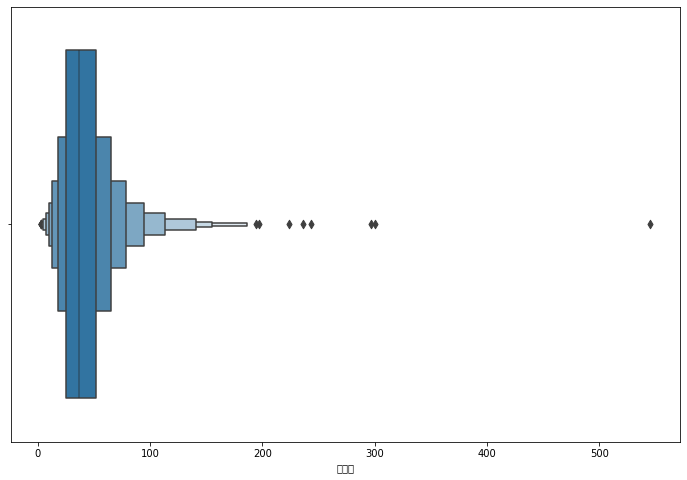

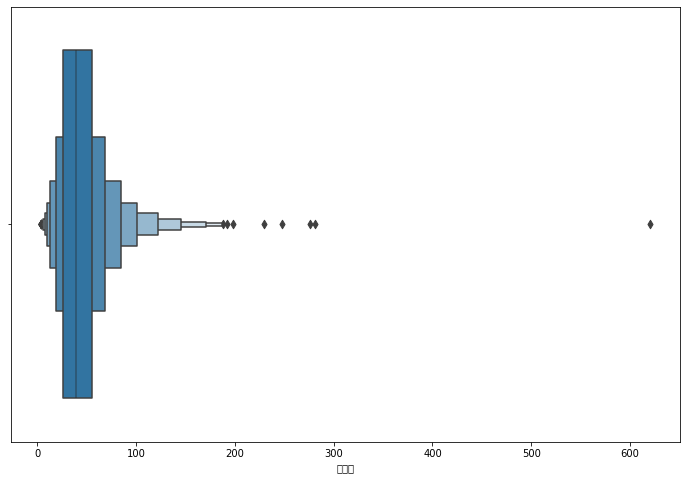

In [14]:
# 이상치 데이터 확인해보기
for i in df.columns[1:]:
  plt.figure(figsize = (12,8))
  sns.boxenplot(df[i])
  plt.show()

# 데이터의 이상치와 결측치를 어떻게 처리해줘야 할까?


In [15]:
# 방법1 : interpolation
# interpolate linear
for i in df.columns:
  df[i] = df[i].interpolate(method = 'linear')

df.to_csv('/content/drive/MyDrive/Proj_WT/DataSets/airpolution/interpolate_linear.csv', encoding = 'utf-8', index = False)
print('========================= linear ==============================')
print(df.isnull().sum())

# # interpolate quadratic
# df = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/airpolution/WholeData.csv', parse_dates = ['측정일자'])
# for i in df.columns:
#   df[i] = df[i].interpolate(method = 'quadratic')
#   df[i] = df[i].interpolate(method = 'linear')
# df.to_csv('/content/drive/MyDrive/Proj_WT/DataSets/airpolution/interpolate_quadratic.csv', encoding = 'utf-8', index = False)
# print('========================= quadratic ==============================')
# print(df.isnull().sum())
# # interpolate cubic
# df = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/airpolution/WholeData.csv', parse_dates = ['측정일자'])
# for i in df.columns:
#   df[i] = df[i].interpolate(method = 'cubic')
#   df[i] = df[i].interpolate(method = 'linear')
# print('========================= cubic ==============================')
# print(df.isnull().sum())
# df.to_csv('/content/drive/MyDrive/Proj_WT/DataSets/airpolution/interpolate_cubic.csv', encoding = 'utf-8', index = False)

========================= linear ==============================
측정일자    0
동대문구    0
종로구     0
중구      0
성동구     0
금천구     0
송파구     0
관악구     0
강동구     0
서대문구    0
노원구     0
마포구     0
동작구     0
서초구     0
구로구     0
영등포구    0
강남구     0
강서구     0
성북구     0
중랑구     0
강북구     0
양천구     0
도봉구     0
은평구     0
용산구     0
광진구     0
dtype: int64


# 각 값들의 정규성 검정하기

In [27]:
df_scaler.min()

동대문구   -1.206897
종로구    -1.259259
중구     -1.259259
성동구    -1.200000
금천구    -1.307692
송파구    -1.250000
관악구    -1.321429
강동구    -1.321429
서대문구   -1.200000
노원구    -1.259259
마포구    -1.241379
동작구    -1.269231
서초구    -1.310345
구로구    -1.233333
영등포구   -1.310345
강남구    -1.285714
강서구    -1.275862
성북구    -1.269231
중랑구    -1.241379
강북구    -1.360000
양천구    -1.285714
도봉구    -1.214286
은평구    -1.296296
용산구    -1.259259
광진구    -1.206897
dtype: float64

In [16]:
from scipy.stats import shapiro
# robust scaler 정규성 검정
alpha = 0.05
Gaussian_distribution = []
for i in df.columns[1:]:
  stat, p = shapiro(df_scaler[i])
  print(f'{i} and {p}')
  if p > alpha:
    Gaussian_distribution.append(i)

print(Gaussian_distribution)

동대문구 and 1.0
종로구 and 1.0
중구 and 1.0
성동구 and 1.0
금천구 and 1.0
송파구 and 1.0
관악구 and 1.0
강동구 and 1.0
서대문구 and 1.0
노원구 and 1.0
마포구 and 1.0
동작구 and 1.0
서초구 and 1.0
구로구 and 1.0
영등포구 and 1.0
강남구 and 1.0
강서구 and 1.0
성북구 and 1.0
중랑구 and 1.0
강북구 and 1.0
양천구 and 1.0
도봉구 and 1.0
은평구 and 1.0
용산구 and 1.0
광진구 and 1.0
['동대문구', '종로구', '중구', '성동구', '금천구', '송파구', '관악구', '강동구', '서대문구', '노원구', '마포구', '동작구', '서초구', '구로구', '영등포구', '강남구', '강서구', '성북구', '중랑구', '강북구', '양천구', '도봉구', '은평구', '용산구', '광진구']


In [17]:
# ztest를 이용한 정규성 검정
# robust scaler 정규성 검정
from statsmodels.stats.weightstats import ztest

alpha = 0.05
Gaussian_distribution = []
for i in df.columns[1:]:
  stat, p = ztest(df_scaler[i])
  print(f'{i} and {p}')
  if p > alpha:
    Gaussian_distribution.append(i)
print(Gaussian_distribution)

동대문구 and nan
종로구 and nan
중구 and nan
성동구 and nan
금천구 and nan
송파구 and nan
관악구 and nan
강동구 and nan
서대문구 and nan
노원구 and nan
마포구 and nan
동작구 and nan
서초구 and nan
구로구 and nan
영등포구 and nan
강남구 and nan
강서구 and nan
성북구 and nan
중랑구 and nan
강북구 and nan
양천구 and nan
도봉구 and nan
은평구 and nan
용산구 and nan
광진구 and nan
[]


In [18]:
# minmax scaler 정규성 검정
alpha = 0.05
Gaussian_distribution = []
for i in df_minmax_scaler.columns[1:]:
  stat, p = shapiro(df_minmax_scaler[i])
  print(f'{i} and {p}')
  if p > alpha:
    Gaussian_distribution.append(i)

print(Gaussian_distribution)

종로구 and 1.0
중구 and 1.0
성동구 and 1.0
금천구 and 1.0
송파구 and 1.0
관악구 and 1.0
강동구 and 1.0
서대문구 and 1.0
노원구 and 1.0
마포구 and 1.0
동작구 and 1.0
서초구 and 1.0
구로구 and 1.0
영등포구 and 1.0
강남구 and 1.0
강서구 and 1.0
성북구 and 1.0
중랑구 and 1.0
강북구 and 1.0
양천구 and 1.0
도봉구 and 1.0
은평구 and 1.0
용산구 and 1.0
광진구 and 1.0
['종로구', '중구', '성동구', '금천구', '송파구', '관악구', '강동구', '서대문구', '노원구', '마포구', '동작구', '서초구', '구로구', '영등포구', '강남구', '강서구', '성북구', '중랑구', '강북구', '양천구', '도봉구', '은평구', '용산구', '광진구']


In [28]:
df_minmax_scaler

,동대문구,종로구,중구,성동구,금천구,송파구,관악구,강동구,서대문구,노원구,마포구,동작구,서초구,구로구,영등포구,강남구,강서구,성북구,중랑구,강북구,양천구,도봉구,은평구,용산구,광진구
0,0.057658,0.045390,0.053286,0.052224,0.056641,0.052727,0.061069,0.047359,0.049320,0.044554,0.051282,0.050657,0.048013,0.057803,0.046794,0.058719,0.058366,0.056566,0.049342,0.051635,0.066398,0.044728,0.043189,0.057196,0.045455
1,0.084685,0.069504,0.079929,0.090909,0.101562,0.078182,0.104962,0.076503,0.085034,0.072607,0.085470,0.097561,0.086093,0.102119,0.084922,0.094306,0.095331,0.074747,0.075658,0.075731,0.118712,0.065495,0.073090,0.088561,0.066558
2,0.084685,0.056738,0.079929,0.081238,0.080078,0.078182,0.087786,0.071038,0.071429,0.069307,0.080342,0.073171,0.076159,0.086705,0.076256,0.083630,0.087549,0.082828,0.080592,0.070568,0.094567,0.073482,0.073090,0.084871,0.068182
3,0.063063,0.055319,0.060391,0.065764,0.066406,0.056364,0.066794,0.052823,0.057823,0.056106,0.064957,0.063790,0.056291,0.067437,0.057192,0.062278,0.064202,0.058586,0.060855,0.058520,0.080483,0.047923,0.053156,0.064576,0.048701
4,0.082883,0.062411,0.081705,0.088975,0.080078,0.080000,0.091603,0.063752,0.090136,0.062706,0.085470,0.080675,0.079470,0.098266,0.083189,0.083630,0.097276,0.078788,0.077303,0.063683,0.100604,0.068690,0.074751,0.088561,0.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,0.100901,0.093617,0.127886,0.106383,0.115234,0.107273,0.095420,0.127505,0.090136,0.102310,0.087179,0.110694,0.109272,0.119461,0.097054,0.096085,0.116732,0.117172,0.098684,0.118761,0.128773,0.092652,0.098007,0.116236,0.092532
4014,0.100901,0.087943,0.124334,0.102515,0.107422,0.094545,0.087786,0.127505,0.088435,0.099010,0.073504,0.108818,0.107616,0.111753,0.086655,0.092527,0.114786,0.125253,0.103618,0.103270,0.124748,0.089457,0.089701,0.090406,0.089286
4015,0.102703,0.092199,0.133215,0.108317,0.128906,0.105455,0.106870,0.118397,0.091837,0.110561,0.097436,0.118199,0.120861,0.134875,0.110919,0.101423,0.147860,0.121212,0.100329,0.111876,0.148893,0.094249,0.102990,0.130996,0.090909
4016,0.048649,0.049645,0.062167,0.050290,0.058594,0.050909,0.041985,0.063752,0.044218,0.057756,0.041026,0.058161,0.057947,0.057803,0.039861,0.046263,0.052529,0.058586,0.047697,0.068847,0.060362,0.043131,0.056478,0.075646,0.045455


In [19]:
alpha = 0.05
Gaussian_distribution = []
for i in df_minmax_scaler.columns[1:]:
  stat, p = ztest(df_minmax_scaler[i])
  print(f'{i} and {p}')
  if p > alpha:
    Gaussian_distribution.append(i)
print(Gaussian_distribution)

종로구 and nan
중구 and nan
성동구 and nan
금천구 and nan
송파구 and nan
관악구 and nan
강동구 and nan
서대문구 and nan
노원구 and nan
마포구 and nan
동작구 and nan
서초구 and nan
구로구 and nan
영등포구 and nan
강남구 and nan
강서구 and nan
성북구 and nan
중랑구 and nan
강북구 and nan
양천구 and nan
도봉구 and nan
은평구 and nan
용산구 and nan
광진구 and nan
[]


In [33]:
from scipy.stats import normaltest
Gaussian_distribution = []
for i in df.columns[1:]:
  stats, p = normaltest(df[i].apply(lambda x:np.log1p(x)))
  print(f'{i} and {p}')
  if p > alpha:
    Gaussian_distribution.append(i)

  print(Gaussian_distribution)

동대문구 and 2.302991795854229e-20
[]
종로구 and 3.1389743980325244e-20
[]
중구 and 6.422810735207942e-13
[]
성동구 and 1.6603827942381231e-15
[]
금천구 and 6.035287048195885e-14
[]
송파구 and 2.4487229563819484e-20
[]
관악구 and 1.651787485785784e-08
[]
강동구 and 3.323345662830169e-29
[]
서대문구 and 7.1429313500410654e-40
[]
노원구 and 8.13201089891757e-19
[]
마포구 and 2.4660797542562056e-15
[]
동작구 and 7.480122658888517e-07
[]
서초구 and 2.7211564182763042e-28
[]
구로구 and 4.669501079685176e-34
[]
영등포구 and 2.5106884454775572e-12
[]
강남구 and 3.0856193614050425e-25
[]
강서구 and 2.2985244017665564e-21
[]
성북구 and 1.256589839302639e-10
[]
중랑구 and 2.924232251196032e-33
[]
강북구 and 3.11024655799113e-32
[]
양천구 and 9.667438479290617e-16
[]
도봉구 and 5.305198844678992e-19
[]
은평구 and 1.9630563263874735e-25
[]
용산구 and 2.6540412859286625e-45
[]
광진구 and 2.86242969261381e-29
[]


In [41]:
from scipy.stats import kstest
for i in df_scaler.columns[1:]:
  stats, p = kstest(df_minmax_scaler[i], 'norm')
  print(f'{i} and {p}')
  if p > alpha:
    Gaussian_distribution.append(i)
print(Gaussian_distribution)

종로구 and nan
중구 and nan
성동구 and nan
금천구 and nan
송파구 and nan
관악구 and nan
강동구 and nan
서대문구 and nan
노원구 and nan
마포구 and nan
동작구 and nan
서초구 and nan
구로구 and nan
영등포구 and nan
강남구 and nan
강서구 and nan
성북구 and nan
중랑구 and nan
강북구 and nan
양천구 and nan
도봉구 and nan
은평구 and nan
용산구 and nan
광진구 and nan
[]


# 등분산성 검정

In [20]:
# 이 값은 예측값이 나와야 확인이 가능하므로 일단은 배제 하도록 한다.
from scipy.stats import bartlett
for i in 

SyntaxError: ignored

# 이상치 탐지에 대한 블로그
https://velog.io/@nameunzz/Anomaly-Detection

# 정상성 만들어주기

,측정일자,동대문구,종로구,중구,성동구,금천구,송파구,관악구,강동구,서대문구,노원구,마포구,동작구,서초구,구로구,영등포구,강남구,강서구,성북구,중랑구,강북구,양천구,도봉구,은평구,용산구,광진구
0,2010-01-01,35.0,36.0,33.0,31.0,33.0,32.0,36.0,29.0,32.0,30.0,34.0,32.0,32.0,33.0,31.0,36.0,34.0,33.0,33.0,33.0,36.0,31.0,29.0,34.0,32.0
1,2010-01-02,50.0,53.0,48.0,51.0,56.0,46.0,59.0,45.0,53.0,47.0,54.0,57.0,55.0,56.0,53.0,56.0,53.0,42.0,49.0,47.0,62.0,44.0,47.0,51.0,45.0
2,2010-01-03,50.0,44.0,48.0,46.0,45.0,46.0,50.0,42.0,45.0,45.0,51.0,44.0,49.0,48.0,48.0,50.0,49.0,46.0,52.0,44.0,50.0,49.0,47.0,49.0,46.0
3,2010-01-04,38.0,43.0,37.0,38.0,38.0,34.0,39.0,32.0,37.0,37.0,42.0,39.0,37.0,38.0,37.0,38.0,37.0,34.0,40.0,37.0,43.0,33.0,35.0,38.0,34.0
4,2010-01-05,49.0,48.0,49.0,50.0,45.0,47.0,52.0,38.0,56.0,41.0,54.0,48.0,51.0,54.0,52.0,50.0,54.0,44.0,50.0,40.0,53.0,46.0,48.0,51.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,2020-12-27,59.0,70.0,75.0,59.0,63.0,62.0,54.0,73.0,56.0,65.0,55.0,64.0,69.0,65.0,60.0,57.0,64.0,63.0,63.0,72.0,67.0,61.0,62.0,66.0,61.0
4014,2020-12-28,59.0,66.0,73.0,57.0,59.0,55.0,50.0,73.0,55.0,63.0,47.0,63.0,68.0,61.0,54.0,55.0,63.0,67.0,66.0,63.0,65.0,59.0,57.0,52.0,59.0
4015,2020-12-29,60.0,69.0,78.0,60.0,70.0,61.0,60.0,68.0,57.0,70.0,61.0,68.0,76.0,73.0,68.0,60.0,80.0,65.0,64.0,68.0,77.0,62.0,65.0,74.0,60.0
4016,2020-12-30,30.0,39.0,38.0,30.0,34.0,31.0,26.0,38.0,29.0,38.0,28.0,36.0,38.0,33.0,27.0,29.0,31.0,34.0,32.0,43.0,33.0,30.0,37.0,44.0,32.0
